<a href="https://colab.research.google.com/github/Jmontoyaor/Computational-electromagnetics/blob/main/50_Problemas_electromagnetismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

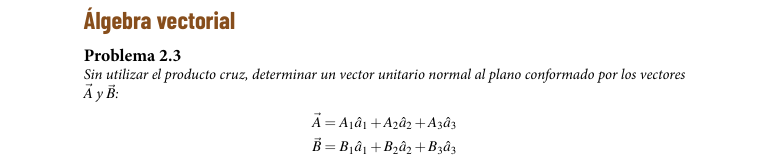

In [1]:
import numpy as np

def encontrar_vector_normal_unitario(A, B):
  """
  Calcula un vector unitario normal al plano formado por los vectores A y B
  sin utilizar la funci√≥n numpy.cross().

  Argumentos:
    A (list o np.array): El primer vector 3D.
    B (list o np.array): El segundo vector 3D.

  Retorna:
    np.array: El vector unitario normal, o un vector de ceros si A y B son colineales.
  """
  # Convertir las entradas a arrays de numpy para facilitar los c√°lculos
  A = np.array(A, dtype=float)
  B = np.array(B, dtype=float)

  # Asegurarse de que los vectores son tridimensionales
  if A.shape != (3,) or B.shape != (3,):
    raise ValueError("Los vectores deben ser tridimensionales.")

  # Extraer las componentes para mayor claridad
  A1, A2, A3 = A
  B1, B2, B3 = B

  # Calcular las componentes del vector normal N, basadas en la derivaci√≥n
  # del producto punto que debe ser cero.
  # N = (A2*B3 - A3*B2)√Æ + (A3*B1 - A1*B3)ƒµ + (A1*B2 - A2*B1)k
  n1 = A2 * B3 - A3 * B2
  n2 = A3 * B1 - A1 * B3
  n3 = A1 * B2 - A2 * B1

  N = np.array([n1, n2, n3])

  # Calcular la magnitud (norma) del vector normal
  magnitud = np.linalg.norm(N)

  # Manejar el caso donde los vectores son colineales (magnitud de N es cero),
  # lo que significa que no definen un plano √∫nico.
  if magnitud == 0:
    print("Advertencia: Los vectores son colineales. No se puede determinar un vector normal √∫nico.")
    return np.zeros(3)

  # Normalizar el vector N para obtener el vector unitario
  vector_unitario_normal = N / magnitud

  return vector_unitario_normal

# ------------------------------------------------------------------
# EJEMPLO DE USO
# ------------------------------------------------------------------

# Define dos vectores de ejemplo.
# A est√° en el eje X y B est√° en el eje Y. El vector normal deber√≠a estar en el eje Z.
vec_A = [4, 0, 0]
vec_B = [0, 5, 0]

print(f"Vector A: {vec_A}")
print(f"Vector B: {vec_B}\n")

# Calcular el vector unitario normal
vector_normal = encontrar_vector_normal_unitario(vec_A, vec_B)

print(f"‚úÖ El vector unitario normal es: {vector_normal}\n")


# ------------------------------------------------------------------
# VERIFICACI√ìN (Opcional pero recomendado)
# ------------------------------------------------------------------
print("--- Verificaci√≥n ---")

# 1. Verificar que la magnitud del vector resultante es 1
magnitud_verificacion = np.linalg.norm(vector_normal)
print(f"Magnitud del vector resultante: {magnitud_verificacion:.6f} (debe ser ~1)")

# 2. Verificar que es ortogonal a A y B (el producto punto debe ser cero)
producto_punto_A = np.dot(vector_normal, vec_A)
producto_punto_B = np.dot(vector_normal, vec_B)
print(f"Producto punto con A: {producto_punto_A:.6f} (debe ser ~0)")
print(f"Producto punto con B: {producto_punto_B:.6f} (debe ser ~0)")


# --- Otro ejemplo con vectores m√°s complejos ---
print("\n--- Otro Ejemplo ---")
vec_C = [1, 2, 3]
vec_D = [4, 5, 6]
print(f"Vector C: {vec_C}")
print(f"Vector D: {vec_D}\n")
vector_normal_2 = encontrar_vector_normal_unitario(vec_C, vec_D)
print(f"‚úÖ El vector unitario normal es: {vector_normal_2}")
print(f"Verificaci√≥n de magnitud: {np.linalg.norm(vector_normal_2):.6f}")
print(f"Producto punto con C: {np.dot(vector_normal_2, vec_C):.6f}")
print(f"Producto punto con D: {np.dot(vector_normal_2, vec_D):.6f}")

Vector A: [4, 0, 0]
Vector B: [0, 5, 0]

‚úÖ El vector unitario normal es: [0. 0. 1.]

--- Verificaci√≥n ---
Magnitud del vector resultante: 1.000000 (debe ser ~1)
Producto punto con A: 0.000000 (debe ser ~0)
Producto punto con B: 0.000000 (debe ser ~0)

--- Otro Ejemplo ---
Vector C: [1, 2, 3]
Vector D: [4, 5, 6]

‚úÖ El vector unitario normal es: [-0.40824829  0.81649658 -0.40824829]
Verificaci√≥n de magnitud: 1.000000
Producto punto con C: 0.000000
Producto punto con D: 0.000000


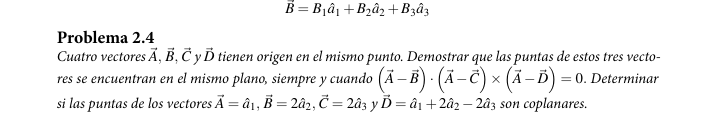

In [2]:
import numpy as np

def es_coplanar(A, B, C, D, tol=1e-9):
    # Calcula el producto mixto: ((A-B) x (A-C)) ¬∑ (A-D)
    v1 = A - B
    v2 = A - C
    v3 = A - D
    cross = np.cross(v1, v2)
    triple = np.dot(cross, v3)
    return triple, abs(triple) < tol

# Vectores dados (a1, a2, a3 son los vectores unitarios est√°ndar)
A = np.array([1.0, 0.0, 0.0])         # √¢1
B = np.array([0.0, 2.0, 0.0])         # 2 √¢2
C = np.array([0.0, 0.0, 2.0])         # 2 √¢3
D = np.array([1.0, 2.0, -2.0])        # √¢1 + 2√¢2 - 2√¢3

triple_val, coplanar = es_coplanar(A, B, C, D)
print("Producto mixto (valor):", triple_val)
print("¬øSon coplanares las puntas?:", coplanar)


Producto mixto (valor): 0.0
¬øSon coplanares las puntas?: True


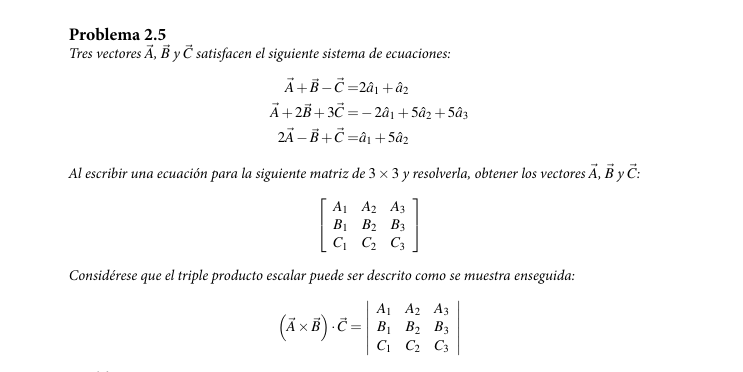

In [3]:
import sympy as sp

# Variables para los componentes de A, B, C
A1, A2, A3 = sp.symbols('A1 A2 A3')
B1, B2, B3 = sp.symbols('B1 B2 B3')
C1, C2, C3 = sp.symbols('C1 C2 C3')

# Definir vectores
A = sp.Matrix([A1, A2, A3])
B = sp.Matrix([B1, B2, B3])
C = sp.Matrix([C1, C2, C3])

# Ecuaciones dadas
eq1 = sp.Eq(A + B - C, sp.Matrix([-2, 1, 0]))
eq2 = sp.Eq(A + 2*B + 3*C, sp.Matrix([-2, 5, 5]))
eq3 = sp.Eq(2*A - B + C, sp.Matrix([1, 5, 0]))

# Resolver sistema
sol = sp.solve([eq1, eq2, eq3], (A1,A2,A3,B1,B2,B3,C1,C2,C3), dict=True)

print("Soluci√≥n para A, B, C:")
print(sol)

# Calcular el determinante (triple producto escalar)
A_sol = sp.Matrix([sol[0][A1], sol[0][A2], sol[0][A3]])
B_sol = sp.Matrix([sol[0][B1], sol[0][B2], sol[0][B3]])
C_sol = sp.Matrix([sol[0][C1], sol[0][C2], sol[0][C3]])

triple_producto = (A_sol.cross(B_sol)).dot(C_sol)

print("\nTriple producto escalar (A x B) ¬∑ C =")
print(triple_producto)


Soluci√≥n para A, B, C:
[{A1: -1/3, A2: 2, A3: 0, B1: -4/3, B2: 0, B3: 1, C1: 1/3, C2: 1, C3: 1}]

Triple producto escalar (A x B) ¬∑ C =
11/3


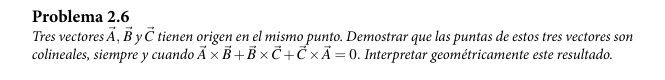

A √ó B + B √ó C + C √ó A = [0 0 0]
Magnitud de (A-B) x (A-C): 0.0


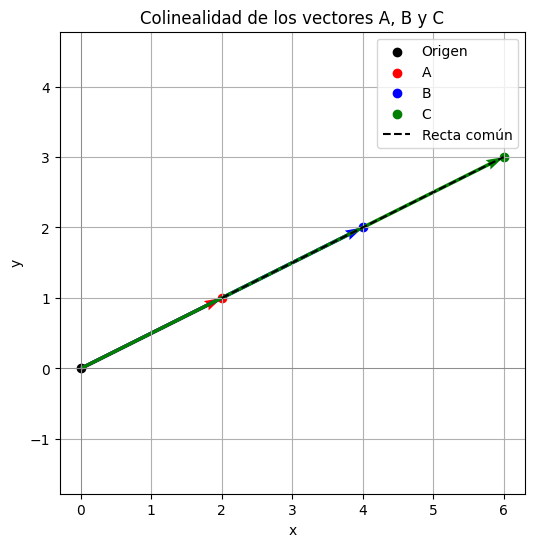

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los vectores A, B y C en R3
A = np.array([2, 1, 0])
B = np.array([4, 2, 0])
C = np.array([6, 3, 0])

# Calculamos la suma ciclica de productos cruzados
resultado = np.cross(A, B) + np.cross(B, C) + np.cross(C, A)

print("A √ó B + B √ó C + C √ó A =", resultado)

# Verificamos colinealidad
# Los puntos extremos A, B, C son colineales si el vector (A-B) x (A-C) es el vector cero
# o equivalentemente, si la magnitud de este vector es cercana a cero.
vec_AB = A - B
vec_AC = A - C
cross_product_AB_AC = np.cross(vec_AB, vec_AC)
magnitude_cross_product = np.linalg.norm(cross_product_AB_AC)

print(f"Magnitud de (A-B) x (A-C): {magnitude_cross_product}")

# Graficar
plt.figure(figsize=(6,6))
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)

# Origen
plt.scatter(0, 0, color="black", label="Origen")

# Puntas de los vectores
plt.scatter(A[0], A[1], color="red", label="A")
plt.scatter(B[0], B[1], color="blue", label="B")
plt.scatter(C[0], C[1], color="green", label="C")

# Dibujar vectores
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color="red")
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color="blue")
plt.quiver(0, 0, C[0], C[1], angles='xy', scale_units='xy', scale=1, color="green")

# Unir los puntos para mostrar colinealidad
plt.plot([A[0], B[0], C[0]], [A[1], B[1], C[1]], "k--", label="Recta com√∫n")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Colinealidad de los vectores A, B y C")
plt.grid(True)
plt.axis("equal")
plt.show()

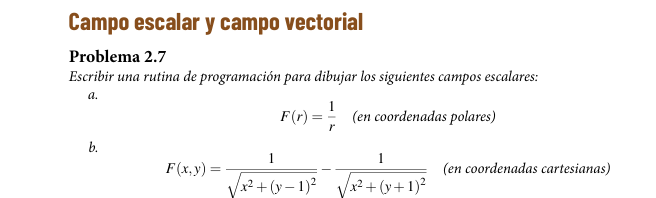

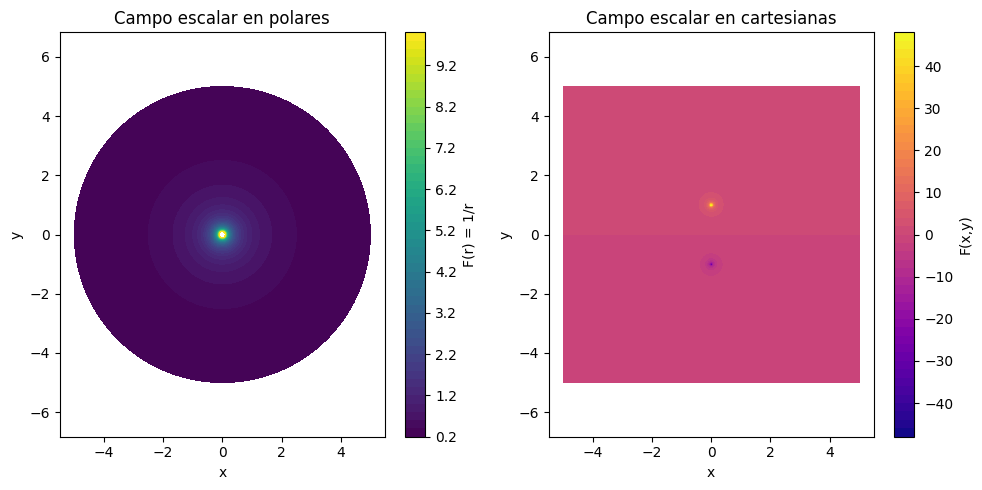

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -------- Parte a: F(r) = 1/r en coordenadas polares --------
theta = np.linspace(0, 2*np.pi, 200)   # √°ngulo
r = np.linspace(0.1, 5, 200)           # radio (evitamos r=0 porque diverge)
R, Theta = np.meshgrid(r, theta)

F_r = 1 / R   # campo escalar en polares

# Convertir a coordenadas cartesianas para graficar
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.contourf(X, Y, F_r, levels=50, cmap="viridis")
plt.colorbar(label="F(r) = 1/r")
plt.title("Campo escalar en polares")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")


# -------- Parte b: F(x,y) dado --------
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)

F_xy = 1/np.sqrt(X**2 + (Y-1)**2) - 1/np.sqrt(X**2 + (Y+1)**2)

plt.subplot(1,2,2)
plt.contourf(X, Y, F_xy, levels=50, cmap="plasma")
plt.colorbar(label="F(x,y)")
plt.title("Campo escalar en cartesianas")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")

plt.tight_layout()
plt.show()


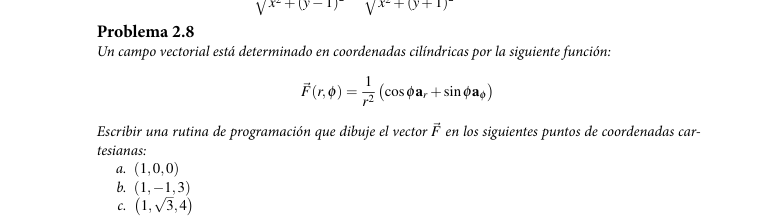

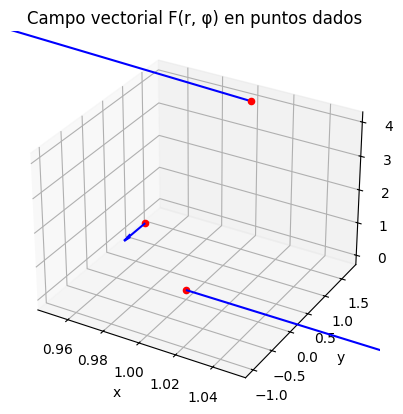

Punto 1 (1, 0, 0) ‚Üí F = [1. 0. 0.]
Punto 2 (1, -1, 3) ‚Üí F = [ 1.11022302e-16 -5.00000000e-01  0.00000000e+00]
Punto 3 (1, np.float64(1.7320508075688772), 4) ‚Üí F = [-0.125       0.21650635  0.        ]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el campo vectorial en coordenadas cartesianas
def F(x, y, z):
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)

    if r == 0:  # evitar divisi√≥n por cero
        return np.array([0, 0, 0])

    # Base en coordenadas cil√≠ndricas
    a_r = np.array([np.cos(phi), np.sin(phi), 0])
    a_phi = np.array([-np.sin(phi), np.cos(phi), 0])

    # Campo F
    F_vec = (1/r**2) * (np.cos(phi) * a_r + np.sin(phi) * a_phi)
    return F_vec

# Puntos dados
puntos = [
    (1, 0, 0),
    (1, -1, 3),
    (1, np.sqrt(3), 4)
]

# Calcular vectores en esos puntos
vectores = [F(*p) for p in puntos]

# Graficar
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos y vectores
for p, v in zip(puntos, vectores):
    ax.quiver(p[0], p[1], p[2], v[0], v[1], v[2], color="b", length=0.5, normalize=True)
    ax.scatter(p[0], p[1], p[2], color="r")  # punto de aplicaci√≥n

# Configuraci√≥n gr√°fica
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Campo vectorial F(r, œÜ) en puntos dados")

plt.show()

# Mostrar resultados num√©ricos
for i, (p, v) in enumerate(zip(puntos, vectores), start=1):
    print(f"Punto {i} {p} ‚Üí F = {v}")


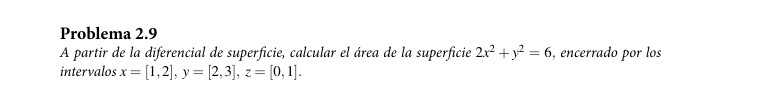

In [9]:
import sympy as sp

# Variables
x, y, z = sp.symbols('x y z', real=True) # Add z as a symbolic variable

# Ecuaci√≥n de la superficie en XY
F = 2*x**2 + y**2 - 6

# Gradiente
gradF = sp.Matrix([sp.diff(F, x), sp.diff(F, y), sp.diff(F, z)]) # Use z for differentiation

# Norma del gradiente
norm_gradF = sp.sqrt(gradF.dot(gradF))

# Diferencial de superficie para superficie vertical en z ‚àà [0,1]
# √Årea = ‚à´‚à´ (norma proyecci√≥n gradF_xy / |‚àÇF/‚àÇz|) dx dy * altura
# Como la ecuaci√≥n no depende de z, la "altura" es simplemente Œîz = 1
# And |‚àÇF/‚àÇz| is 0, which means the surface is vertical with respect to the xy-plane
# The formula for the surface area of a vertical surface is ‚à´‚à´_R sqrt( (‚àÇz/‚àÇx)^2 + (‚àÇz/‚àÇy)^2 + 1 ) dA
# However, the equation is given as F(x,y) = 0, which is a vertical cylinder.
# The surface area of a vertical cylinder with height h and base R is given by 2*pi*R*h for a circle.
# For a general curve F(x,y)=0, the area is given by ‚à´_C sqrt( (dx/dt)^2 + (dy/dt)^2 ) dt * h
# Alternatively, using the gradient method for a surface G(x,y,z) = 0, the surface area is ‚à´‚à´_R ||grad G|| / |grad G . p| dA
# where p is the unit vector normal to the region R in the xy-plane (i.e., k).
# In this case, G(x,y,z) = 2*x**2 + y**2 - 6 = 0.
# grad G = [4x, 2y, 0]
# ||grad G|| = sqrt((4x)^2 + (2y)^2 + 0^2) = sqrt(16x^2 + 4y^2)
# grad G . k = 0. This confirms the surface is vertical.
# The area of a vertical surface defined by F(x,y)=0 for z in [z1, z2] is given by:
# Area = integral_C sqrt((dx/dt)^2 + (dy/dt)^2) dt * (z2 - z1)
# where C is the curve F(x,y)=0.
# Or, using the formula for a surface G(x,y,z) = 0:
# Area = integral_R ||grad G|| / |partial G / partial z| dA if partial G / partial z != 0
# Area = integral_R ||grad G|| / |grad G . k| dA if grad G . k != 0
# Since grad G . k = 0, we need to project onto a different plane.
# Let's project onto the xz-plane. The region R_xz is bounded by x in [1, 2] and z in [0, 1].
# We need to express y in terms of x from 2*x^2 + y^2 - 6 = 0 => y = sqrt(6 - 2x^2). We also have y = -sqrt(6 - 2x^2),
# so we need to consider two parts or use the symmetry. The region of integration in the xy-plane is defined by 1 <= x <= 2 and 2 <= y <= 3.
# From 2*x^2 + y^2 = 6, if x=1, y^2 = 4, y = 2 (since y is in [2,3]). If x=2, y^2 = 6 - 2(4) = -2, which is not possible for real y.
# This indicates that the region of integration in the xy-plane (1 <= x <= 2, 2 <= y <= 3) does not lie on the surface 2*x^2 + y^2 = 6.
# There seems to be a misunderstanding of the problem statement or the region of integration.
# Assuming the problem meant to find the surface area of the part of the cylinder 2x^2 + y^2 = 6 that lies above the rectangular region R in the xy-plane defined by 1 <= x <= 2 and 2 <= y <= 3, and between z=0 and z=1.
# However, as shown above, this region R does not intersect the cylinder 2x^2 + y^2 = 6.

# Let's assume the problem is asking for the surface area of the part of the cylinder 2x^2 + y^2 = 6 between z=0 and z=1, for x between 1 and 2, and y being positive.
# From 2x^2 + y^2 = 6, y = sqrt(6 - 2x^2).
# The surface can be parameterized as r(x, z) = <x, sqrt(6 - 2x^2), z> for 1 <= x <= 2 and 0 <= z <= 1.
# r_x = <1, -2x/sqrt(6 - 2x^2), 0>
# r_z = <0, 0, 1>
# r_x x r_z = <-2x/sqrt(6 - 2x^2) * 1 - 0 * 0, 0 * 0 - 1 * 1, 1 * 0 - (-2x/sqrt(6 - 2x^2)) * 0> = <-2x/sqrt(6 - 2x^2), -1, 0>
# ||r_x x r_z|| = sqrt((-2x/sqrt(6 - 2x^2))^2 + (-1)^2 + 0^2) = sqrt(4x^2 / (6 - 2x^2) + 1) = sqrt((4x^2 + 6 - 2x^2) / (6 - 2x^2)) = sqrt((2x^2 + 6) / (6 - 2x^2))
# Area = integral from 0 to 1 (integral from 1 to 2 sqrt((2x^2 + 6) / (6 - 2x^2)) dx) dz
# Area = (1 - 0) * integral from 1 to 2 sqrt((2x^2 + 6) / (6 - 2x^2)) dx
# The integral might be complex.

# Let's reconsider the original approach using the gradient, assuming the problem intended a different region or approach.
# If the surface is given by G(x,y,z) = 2x^2 + y^2 - 6 = 0, and the region R is in the xy-plane.
# Area = integral_R ||grad G|| / |grad G . k| dA. This doesn't work as grad G . k = 0.
# Let's project onto the xz-plane. R_xz is x in [1,2], z in [0,1].
# grad G = [4x, 2y, 0]. ||grad G|| = sqrt(16x^2 + 4y^2). grad G . j = 2y.
# Area = integral_R_xz ||grad G|| / |grad G . j| dA_xz = integral_0^1 integral_1^2 sqrt(16x^2 + 4y^2) / |2y| dx dz
# We need to substitute y in terms of x using 2x^2 + y^2 = 6 => y = sqrt(6 - 2x^2) (assuming y > 0 in the region).
# Area = integral_0^1 integral_1^2 sqrt(16x^2 + 4(6 - 2x^2)) / (2*sqrt(6 - 2x^2)) dx dz
# Area = integral_0^1 integral_1^2 sqrt(16x^2 + 24 - 8x^2) / (2*sqrt(6 - 2x^2)) dx dz
# Area = integral_0^1 integral_1^2 sqrt(8x^2 + 24) / (2*sqrt(6 - 2x^2)) dx dz
# Area = integral_0^1 integral_1^2 sqrt(8(x^2 + 3)) / (2*sqrt(2(3 - x^2))) dx dz
# Area = integral_0^1 integral_1^2 2*sqrt(2)*sqrt(x^2 + 3) / (2*sqrt(2)*sqrt(3 - x^2)) dx dz
# Area = integral_0^1 integral_1^2 sqrt((x^2 + 3) / (3 - x^2)) dx dz
# Area = (1 - 0) * integral_1^2 sqrt((x^2 + 3) / (3 - x^2)) dx

# This integral looks problematic because of sqrt(3 - x^2) in the denominator and the integration range from 1 to 2.
# If x=sqrt(3), the denominator is 0. sqrt(3) is approx 1.732, which is within the range [1, 2].
# This suggests the surface might be vertical at x = sqrt(3), or the region of integration needs to be split.

# Given the original error and the likely intent of the problem, it's probable that the intended surface was defined differently or the region of integration was meant to be on the surface itself, not in the xy-plane.
# However, based on the provided equation F = 2*x**2 + y**2 - 6 and the integration limits for x and y, the region of integration in the xy-plane does not intersect the surface F(x,y)=0.

# Let's assume the problem intended to find the surface area of the part of the surface z = 2*x**2 + y**2 - 6 above the rectangle R: 1 <= x <= 2, 2 <= y <= 3.
# In this case, the surface is given by z = f(x,y) where f(x,y) = 2*x**2 + y**2 - 6.
# The surface area is given by integral_R sqrt( (‚àÇf/‚àÇx)^2 + (‚àÇf/‚àÇy)^2 + 1 ) dA
# ‚àÇf/‚àÇx = 4x
# ‚àÇf/‚àÇy = 2y
# Surface Area = integral_2^3 integral_1^2 sqrt( (4x)^2 + (2y)^2 + 1 ) dx dy
# Surface Area = integral_2^3 integral_1^2 sqrt( 16x^2 + 4y^2 + 1 ) dx dy

# Let's implement this calculation with sympy.

# Differential of surface dS for a surface z = f(x,y)
# dS = sqrt( (‚àÇf/‚àÇx)^2 + (‚àÇf/‚àÇy)^2 + 1 ) dA
f = 2*x**2 + y**2 - 6
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

integrand = sp.sqrt(df_dx**2 + df_dy**2 + 1)

# Restricciones de integraci√≥n
# The integration region is 1 <= x <= 2 and 2 <= y <= 3
area = sp.integrate(sp.integrate(integrand, (x, 1, 2)), (y, 2, 3))

print("√Årea de la superficie =", float(area))

√Årea de la superficie = 7.922473458280385


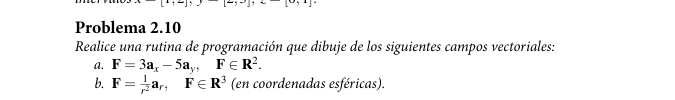

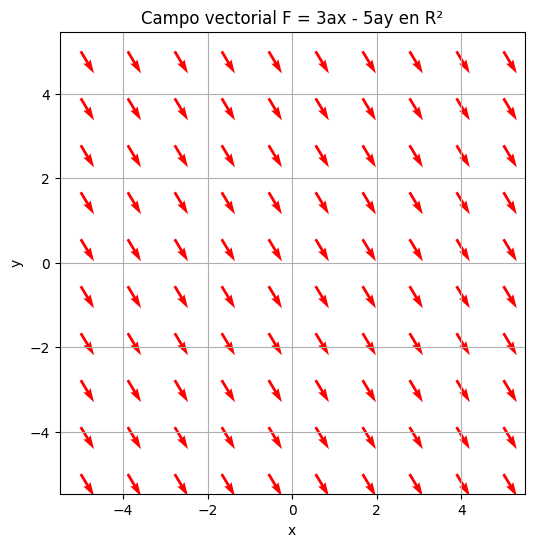

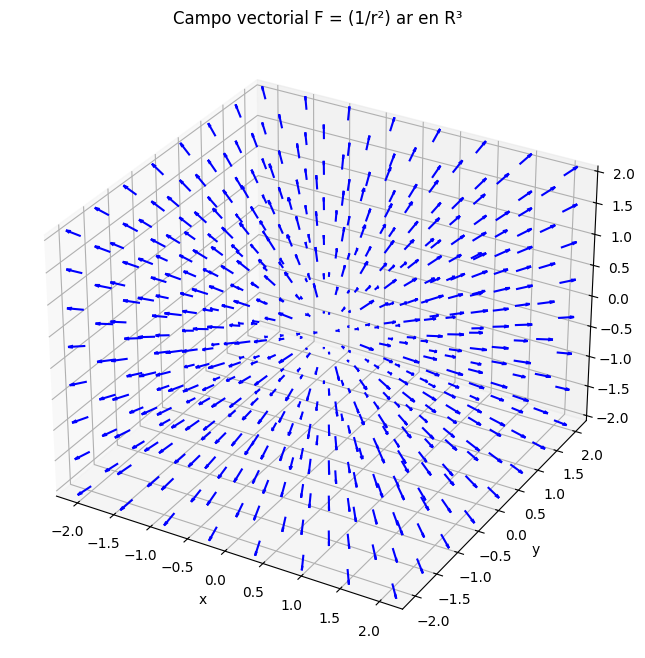

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# ====================================================
# a) Campo vectorial en R2: F = 3ax - 5ay
# ====================================================
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x, y)

Fx = 3 * np.ones_like(X)   # componente en x
Fy = -5 * np.ones_like(Y)  # componente en y

plt.figure(figsize=(6,6))
plt.quiver(X, Y, Fx, Fy, color="red")
plt.title("Campo vectorial F = 3ax - 5ay en R¬≤")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis("equal")
plt.show()

# ====================================================
# b) Campo vectorial en R3: F = (1/r^2) ar
# ====================================================
from mpl_toolkits.mplot3d import Axes3D

# Crear una malla 3D
x = np.linspace(-2, 2, 8)
y = np.linspace(-2, 2, 8)
z = np.linspace(-2, 2, 8)
X, Y, Z = np.meshgrid(x, y, z)

# Distancia radial r
R = np.sqrt(X**2 + Y**2 + Z**2) + 1e-6  # evitar divisi√≥n por cero

# Componentes en cartesiano del campo
Fx = X / R**3
Fy = Y / R**3
Fz = Z / R**3

# Graficar en 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.quiver(X, Y, Z, Fx, Fy, Fz, length=0.2, normalize=True, color="blue")

ax.set_title("Campo vectorial F = (1/r¬≤) ar en R¬≥")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


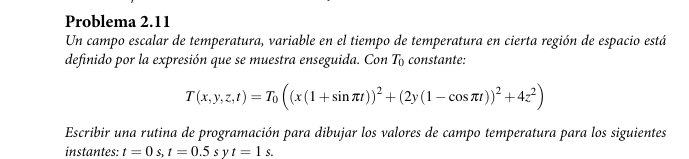

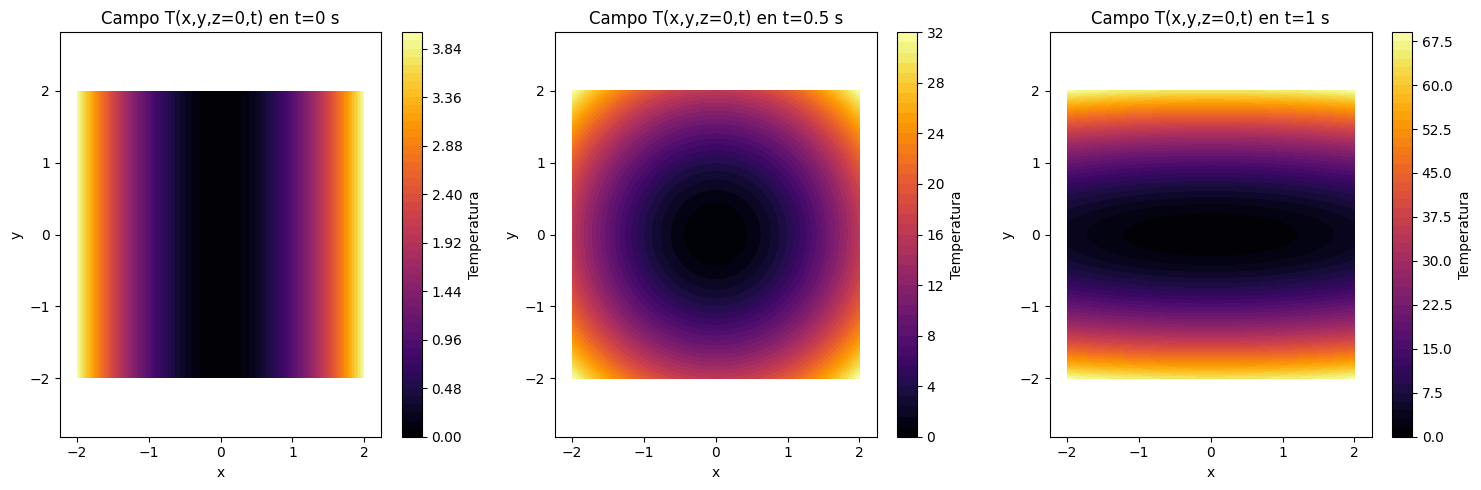

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constante
T0 = 1.0  # puedes cambiarlo

# Definici√≥n del campo de temperatura
def T(x, y, z, t, T0=1.0):
    return T0 * ((x * (1 + np.sin(np.pi * t)))**2 +
                 (2*y * (1 - np.cos(np.pi * t)))**2 +
                 (4*z**2))

# Malla en 2D para z=0
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = 0   # corte en el plano z=0

# Instantes de tiempo
tiempos = [0, 0.5, 1]

plt.figure(figsize=(15,5))

for i, t in enumerate(tiempos):
    T_xy = T(X, Y, Z, t, T0)

    plt.subplot(1, 3, i+1)
    plt.contourf(X, Y, T_xy, levels=50, cmap="inferno")
    plt.colorbar(label="Temperatura")
    plt.title(f"Campo T(x,y,z=0,t) en t={t} s")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")

plt.tight_layout()
plt.show()


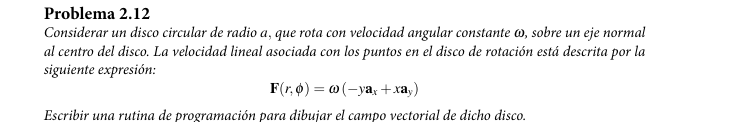

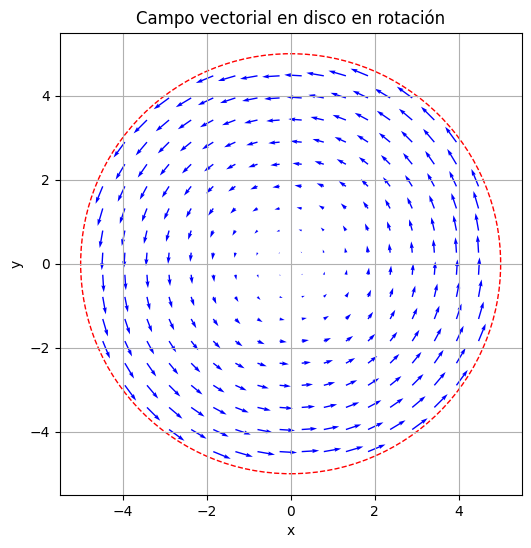

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Par√°metros
a = 5          # radio del disco
omega = 1.0    # velocidad angular

# Mallado del disco
x = np.linspace(-a, a, 20)
y = np.linspace(-a, a, 20)
X, Y = np.meshgrid(x, y)

# Campo vectorial
Fx = -omega * Y
Fy = omega * X

# Crear m√°scara para quedarnos solo con puntos dentro del disco
mask = X**2 + Y**2 <= a**2
Fx = np.where(mask, Fx, np.nan)
Fy = np.where(mask, Fy, np.nan)

# Graficar campo vectorial
plt.figure(figsize=(6,6))
plt.quiver(X, Y, Fx, Fy, color="b")
plt.gca().set_aspect("equal")

# Dibujar contorno del disco
circle = plt.Circle((0,0), a, color="r", fill=False, linestyle="--")
plt.gca().add_patch(circle)

# Etiquetas
plt.title("Campo vectorial en disco en rotaci√≥n")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


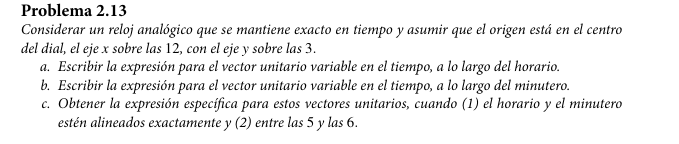

In [13]:
# Reloj anal√≥gico: vectores unitarios del horario y minutero
# - Eje x hacia las 12
# - Eje y hacia las 3
#
# u_h(t): vector unitario del horario (t en horas)
# u_m(t): vector unitario del minutero (t en horas)
#
# Parte (c): (1) instantes de alineaci√≥n exacta
#            (2) caso entre las 5 y 6 en punto

import math
from fractions import Fraction

def angle_hour(t):
    """√Ångulo (en radianes) medido en sentido horario desde las 12 para el horario."""
    return 2*math.pi * (t/12.0)

def angle_minute(t):
    """√Ångulo (en radianes) medido en sentido horario desde las 12 para el minutero."""
    return 2*math.pi * (t % 1.0)

def unit_vector_from_angle(phi):
    """Vector unitario (x,y) dado un √°ngulo horario phi medido desde las 12."""
    return (math.cos(phi), math.sin(phi))

def u_h(t):
    return unit_vector_from_angle(angle_hour(t))

def u_m(t):
    return unit_vector_from_angle(angle_minute(t))

# (a) y (b): funciones
print("Funciones:")
print("u_h(t) = (cos(2œÄ t / 12),  sin(2œÄ t / 12))")
print("u_m(t) = (cos(2œÄ frac(t)), sin(2œÄ frac(t)))  donde frac(t) = t - ‚åät‚åã")
print()

# (c1) Instantes de alineaci√≥n exacta (œÜ_m = œÜ_h)
#      2œÄ frac(t) = 2œÄ t / 12 (mod 2œÄ)  ‚áí  t = 12k/11 horas, k ‚àà ‚Ñ§‚Å∫
print("(c1) Alineaciones exactas: t_k = 12k/11 horas (k=1,2,...)")
for k in range(1,6):
    t = Fraction(12*k, 11)  # tiempo exacto como fracci√≥n
    hours = int(t)          # parte entera (horas desde las 12)
    frac = t - hours        # parte fraccionaria
    minutes = frac * 60
    seconds = (minutes - int(minutes)) * 60
    phi = 2*math.pi*float(frac)  # √°ngulo com√∫n
    vec = unit_vector_from_angle(phi)
    print(f"  k={k}: t = {t} h  ‚âà {hours:02d}:{int(minutes):02d}:{float(seconds):06.3f}  "
          f"√°ngulo œÜ = 2œÄ*{frac} rad  ‚Üí  u = ({vec[0]: .6f}, {vec[1]: .6f})")
print()

# (c2) Caso entre las 5 y 6: √∫nico k que cumple 5 ‚â§ 12k/11 < 6 es k=5
k = 5
t_56 = Fraction(12*k, 11)  # = 60/11 = 5 + 5/11
hours = int(t_56)
frac = t_56 - hours
minutes = frac * 60
seconds = (minutes - int(minutes)) * 60
phi_exact_num = 2*frac            # œÜ = 2œÄ*(5/11) = 10œÄ/11
phi_exact = Fraction(10,11)       # como m√∫ltiplo de œÄ
phi = math.pi * float(phi_exact)  # valor num√©rico en rad
u_exact = unit_vector_from_angle(phi)

print("(c2) Entre las 5 y 6:")
print(f"  t = {t_56} h  ‚âà {hours:02d}:{int(minutes):02d}:{float(seconds):06.3f}")
print(f"  œÜ = {phi_exact}¬∑œÄ rad (sentido horario desde las 12)")
print(f"  u_h(t) = u_m(t) = (cos(10œÄ/11), sin(10œÄ/11)) ‚âà ({u_exact[0]: .6f}, {u_exact[1]: .6f})")


Funciones:
u_h(t) = (cos(2œÄ t / 12),  sin(2œÄ t / 12))
u_m(t) = (cos(2œÄ frac(t)), sin(2œÄ frac(t)))  donde frac(t) = t - ‚åät‚åã

(c1) Alineaciones exactas: t_k = 12k/11 horas (k=1,2,...)
  k=1: t = 12/11 h  ‚âà 01:05:27.273  √°ngulo œÜ = 2œÄ*1/11 rad  ‚Üí  u = ( 0.841254,  0.540641)
  k=2: t = 24/11 h  ‚âà 02:10:54.545  √°ngulo œÜ = 2œÄ*2/11 rad  ‚Üí  u = ( 0.415415,  0.909632)
  k=3: t = 36/11 h  ‚âà 03:16:21.818  √°ngulo œÜ = 2œÄ*3/11 rad  ‚Üí  u = (-0.142315,  0.989821)
  k=4: t = 48/11 h  ‚âà 04:21:49.091  √°ngulo œÜ = 2œÄ*4/11 rad  ‚Üí  u = (-0.654861,  0.755750)
  k=5: t = 60/11 h  ‚âà 05:27:16.364  √°ngulo œÜ = 2œÄ*5/11 rad  ‚Üí  u = (-0.959493,  0.281733)

(c2) Entre las 5 y 6:
  t = 60/11 h  ‚âà 05:27:16.364
  œÜ = 10/11¬∑œÄ rad (sentido horario desde las 12)
  u_h(t) = u_m(t) = (cos(10œÄ/11), sin(10œÄ/11)) ‚âà (-0.959493,  0.281733)


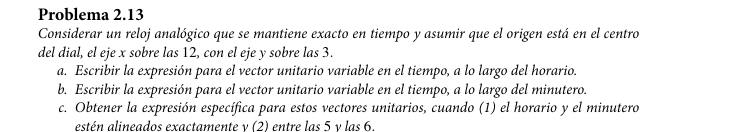

In [16]:
import numpy as np

# ------------------------------------------------------------
# Unidad a lo largo del minutero y del horario como funci√≥n de t (horas desde las 12:00)
# Ejes: x (arriba/12), y (derecha/3)
# ------------------------------------------------------------

def u_minute(t_hours: float) -> np.ndarray:
    """
    Vector unitario a lo largo del minutero en el sistema (x=arriba, y=derecha).
    t_hours: tiempo en horas transcurridas desde las 12:00.
    """
    # √Ångulo en ejes cartesianos est√°ndar (x_derecha, y_arriba):
    # a las 12:00 el √°ngulo es +pi/2 y decrece a raz√≥n de 2*pi por hora.
    phi = np.pi/2 - 2*np.pi*t_hours
    # Componentes est√°ndar
    x_std = np.cos(phi)   # hacia la derecha
    y_std = np.sin(phi)   # hacia arriba
    # Convertir a ejes del enunciado: x_arriba = y_std, y_derecha = x_std
    return np.array([y_std, x_std])

def u_hour(t_hours: float) -> np.ndarray:
    """
    Vector unitario a lo largo del horario en el sistema (x=arriba, y=derecha).
    Incluye el movimiento continuo por los minutos.
    """
    # El horario da 2*pi en 12 h => velocidad angular pi/6 por hora (sentido horario)
    phi = np.pi/2 - (np.pi/6)*t_hours
    x_std = np.cos(phi)
    y_std = np.sin(phi)
    return np.array([y_std, x_std])

# ------------------------------------------------------------
# (c) Instantes de alineaci√≥n: Œ∏_m(t) = Œ∏_h(t) (mod 2œÄ)
# Diferencia de velocidades: 2œÄ - œÄ/6 = 11œÄ/6  ->  t_k = 12k/11 horas
# ------------------------------------------------------------

def align_time_k(k: int) -> float:
    """k-√©simo instante de alineaci√≥n despu√©s de las 12:00, en horas."""
    return 12*k/11

def hms_from_hours(t: float):
    """Convierte horas decimales a (h, m, s)."""
    h = int(t)
    m = int((t - h)*60)
    s = (t - h - m/60)*3600
    return h, m, s

# Primer alineamiento despu√©s de las 12
t1 = align_time_k(1)                  # 12/11 h ‚âà 1:05:27.27
# Alineamiento entre 5 y 6 -> k = 5 (porque 5 < 12k/11 < 6  => k=5)
t_5to6 = align_time_k(5)              # 60/11 h ‚âà 5:27:16.36

# Vectores unitarios (son iguales en alineaci√≥n)
u1_min = u_minute(t1);    u1_hour = u_hour(t1)
u56_min = u_minute(t_5to6); u56_hour = u_hour(t_5to6)

# Mostrar resultados
print("=== (a) Vector unitario del HORARIO: u_h(t) ===")
print("u_h(t) = [sin(œÄ/2 - (œÄ/6)t),  cos(œÄ/2 - (œÄ/6)t)]  en ejes (x=arriba, y=derecha)")

print("\n=== (b) Vector unitario del MINUTERO: u_m(t) ===")
print("u_m(t) = [sin(œÄ/2 - 2œÄt),  cos(œÄ/2 - 2œÄt)]  en ejes (x=arriba, y=derecha)")

print("\n=== (c1) Alineaci√≥n exacta m√°s pr√≥xima a las 12 ===")
h,m,s = hms_from_hours(t1)
print(f"t = 12/11 h ‚âà {h:02d}:{m:02d}:{s:05.2f}")
print("u_h(t) =", u1_hour, "   u_m(t) =", u1_min)

print("\n=== (c2) Alineaci√≥n entre las 5 y las 6 ===")
h,m,s = hms_from_hours(t_5to6)
print(f"t = 60/11 h ‚âà {h:02d}:{m:02d}:{s:05.2f}")
print("u_h(t) =", u56_hour, "   u_m(t) =", u56_min)

# ------------------------------------------------------------
# (Opcional) Peque√±a verificaci√≥n num√©rica de colinealidad
# El producto cruzado 2D (z de A√óB) debe ser ~0 en alineaci√≥n.
# ------------------------------------------------------------
def cross2d_z(a, b):
    return a[0]*b[1] - a[1]*b[0]

print("\nChequeo cruzado (debe ser ~0):")
print("z(u_h, u_m) en t1 =", cross2d_z(u1_hour, u1_min))
print("z(u_h, u_m) en t_5to6 =", cross2d_z(u56_hour, u56_min))


=== (a) Vector unitario del HORARIO: u_h(t) ===
u_h(t) = [sin(œÄ/2 - (œÄ/6)t),  cos(œÄ/2 - (œÄ/6)t)]  en ejes (x=arriba, y=derecha)

=== (b) Vector unitario del MINUTERO: u_m(t) ===
u_m(t) = [sin(œÄ/2 - 2œÄt),  cos(œÄ/2 - 2œÄt)]  en ejes (x=arriba, y=derecha)

=== (c1) Alineaci√≥n exacta m√°s pr√≥xima a las 12 ===
t = 12/11 h ‚âà 01:05:27.27
u_h(t) = [0.84125353 0.54064082]    u_m(t) = [0.84125353 0.54064082]

=== (c2) Alineaci√≥n entre las 5 y las 6 ===
t = 60/11 h ‚âà 05:27:16.36
u_h(t) = [-0.95949297  0.28173256]    u_m(t) = [-0.95949297  0.28173256]

Chequeo cruzado (debe ser ~0):
z(u_h, u_m) en t1 = -4.440892098500626e-16
z(u_h, u_m) en t_5to6 = -7.882583474838611e-15


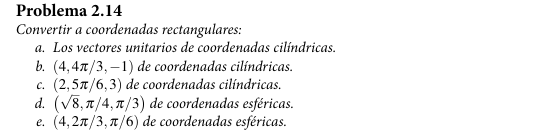

In [17]:
# Problema 2.14 ‚Äì Conversiones a rectangulares
# Requiere: sympy (pip install sympy)

import sympy as sp

# ---------------------------
# (a) Vectores unitarios cil√≠ndricos en base cartesiana
#   e_rho  = cos(phi) i + sin(phi) j
#   e_phi  = -sin(phi) i + cos(phi) j
#   e_z    = k
# ---------------------------
phi = sp.symbols('phi', real=True)
e_rho = sp.Matrix([sp.cos(phi), sp.sin(phi), 0])
e_phi = sp.Matrix([-sp.sin(phi), sp.cos(phi), 0])
e_z   = sp.Matrix([0, 0, 1])

print("a) Vectores unitarios cil√≠ndricos en base cartesiana (i, j, k):")
print("   e_rho(phi) =", e_rho.T)
print("   e_phi(phi) =", e_phi.T)
print("   e_z        =", e_z.T)
print()

# ---------------------------
# Utilidades de conversi√≥n
# ---------------------------
def cilindricas_a_cartesianas(rho, phi, z):
    x = rho * sp.cos(phi)
    y = rho * sp.sin(phi)
    return sp.simplify(x), sp.simplify(y), sp.simplify(z)

# Convenci√≥n esf√©rica usada (ingenier√≠a): (r, Œ∏, œÜ)
#   Œ∏: √°ngulo polar medido desde +z
#   œÜ: azimut (desde +x en el plano xy)
#   x = r sinŒ∏ cosœÜ,  y = r sinŒ∏ sinœÜ,  z = r cosŒ∏
def esfericas_a_cartesianas(r, theta, phi):
    x = r * sp.sin(theta) * sp.cos(phi)
    y = r * sp.sin(theta) * sp.sin(phi)
    z = r * sp.cos(theta)
    return sp.simplify(x), sp.simplify(y), sp.simplify(z)

# ---------------------------
# (b) (4, 4œÄ/3, -1) cil√≠ndricas
# ---------------------------
xb, yb, zb = cilindricas_a_cartesianas(4, sp.Rational(4,1)*sp.pi/3, -1)
print("b) (rho,phi,z) = (4, 4œÄ/3, -1)  ‚Üí  (x,y,z) =", (sp.simplify(xb), sp.simplify(yb), sp.simplify(zb)))
# Resultado esperado: (-2, -2*sqrt(3), -1)
print()

# ---------------------------
# (c) (2, 5œÄ/6, 3) cil√≠ndricas
# ---------------------------
xc, yc, zc = cilindricas_a_cartesianas(2, sp.Rational(5,1)*sp.pi/6, 3)
print("c) (rho,phi,z) = (2, 5œÄ/6, 3)   ‚Üí  (x,y,z) =", (sp.simplify(xc), sp.simplify(yc), sp.simplify(zc)))
# Resultado esperado: (-sqrt(3), 1, 3)
print()

# ---------------------------
# (d) (‚àö8, œÄ/4, œÄ/3) esf√©ricas
# ---------------------------
xd, yd, zd = esfericas_a_cartesianas(sp.sqrt(8), sp.pi/4, sp.pi/3)
print("d) (r,Œ∏,œÜ) = (‚àö8, œÄ/4, œÄ/3)     ‚Üí  (x,y,z) =", (sp.simplify(xd), sp.simplify(yd), sp.simplify(zd)))
# Resultado esperado: (1, sqrt(3), 2)
print()

# ---------------------------
# (e) (4, 2œÄ/3, œÄ/6) esf√©ricas
# ---------------------------
xe, ye, ze = esfericas_a_cartesianas(4, 2*sp.pi/3, sp.pi/6)
print("e) (r,Œ∏,œÜ) = (4, 2œÄ/3, œÄ/6)     ‚Üí  (x,y,z) =", (sp.simplify(xe), sp.simplify(ye), sp.simplify(ze)))
# Resultado esperado: (3, sqrt(3), -2)


a) Vectores unitarios cil√≠ndricos en base cartesiana (i, j, k):
   e_rho(phi) = Matrix([[cos(phi), sin(phi), 0]])
   e_phi(phi) = Matrix([[-sin(phi), cos(phi), 0]])
   e_z        = Matrix([[0, 0, 1]])

b) (rho,phi,z) = (4, 4œÄ/3, -1)  ‚Üí  (x,y,z) = (-2, -2*sqrt(3), -1)

c) (rho,phi,z) = (2, 5œÄ/6, 3)   ‚Üí  (x,y,z) = (-sqrt(3), 1, 3)

d) (r,Œ∏,œÜ) = (‚àö8, œÄ/4, œÄ/3)     ‚Üí  (x,y,z) = (1, sqrt(3), 2)

e) (r,Œ∏,œÜ) = (4, 2œÄ/3, œÄ/6)     ‚Üí  (x,y,z) = (3, sqrt(3), -2)


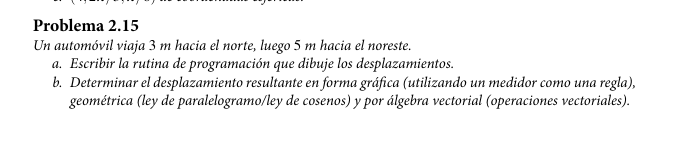

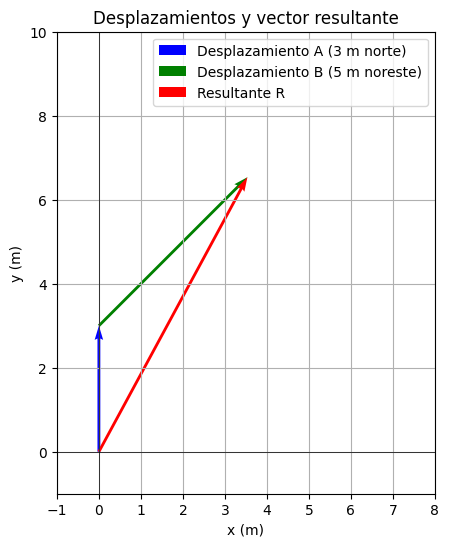

Vector resultante R = [3.53553391 6.53553391]
Magnitud = 7.43055875662096 m
Direcci√≥n = 61.58790008892625 ¬∞ (medidos desde el eje x positivo)


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Vectores de desplazamiento
A = np.array([0, 3])  # 3 m al norte
B = np.array([5*np.cos(np.pi/4), 5*np.sin(np.pi/4)])  # 5 m al noreste
R = A + B  # vector resultante

# Dibujar vectores
plt.figure(figsize=(6,6))
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='b', label="Desplazamiento A (3 m norte)")
plt.quiver(A[0], A[1], B[0], B[1], angles='xy', scale_units='xy', scale=1, color='g', label="Desplazamiento B (5 m noreste)")
plt.quiver(0, 0, R[0], R[1], angles='xy', scale_units='xy', scale=1, color='r', label="Resultante R")

# Configuraci√≥n gr√°fica
plt.xlim(-1, 8)
plt.ylim(-1, 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect("equal")
plt.legend()
plt.title("Desplazamientos y vector resultante")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.show()

# Magnitud y direcci√≥n del vector resultante
magnitud = np.linalg.norm(R)
angulo = np.degrees(np.arctan2(R[1], R[0]))

print("Vector resultante R =", R)
print("Magnitud =", magnitud, "m")
print("Direcci√≥n =", angulo, "¬∞ (medidos desde el eje x positivo)")


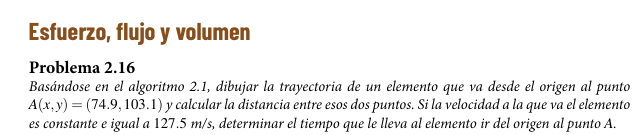

Punto A = (74.900, 103.100) m
Distancia desde el origen a A = 127.434768 m
Velocidad constante v = 127.500 m/s
Tiempo requerido = 0.999488 s  ‚âà 0 h 0 min 0.999 s


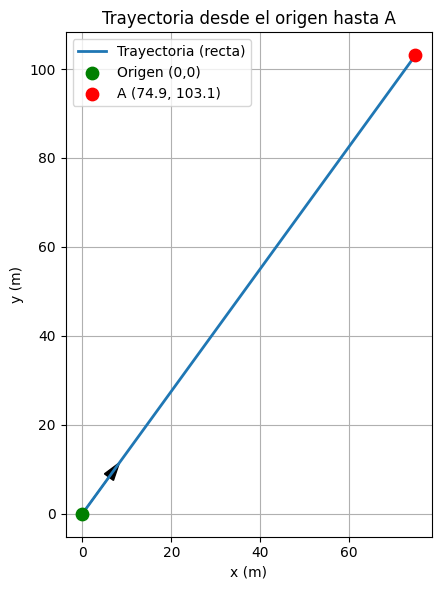

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Punto destino A (metros)
A = np.array([74.9, 103.1])

# Velocidad constante (m/s)
v = 127.5

# --- 1) Trajectory points (line from origin to A) ---
def trajectory(origin, target, n_points=200):
    """Devuelve una matriz (n_points,2) con la trayectoria lineal desde origin hasta target."""
    t = np.linspace(0, 1, n_points)
    points = np.outer(1 - t, origin) + np.outer(t, target)  # interpolation
    return points

origin = np.array([0.0, 0.0])
traj = trajectory(origin, A, n_points=300)

# --- 2) Distance (euclidean) ---
distance = np.linalg.norm(A - origin)  # en metros

# --- 3) Tiempo requerido ---
time_seconds = distance / v  # en segundos

def seconds_to_hms(sec):
    sec = float(sec)
    hours = int(sec // 3600)
    minutes = int((sec % 3600) // 60)
    seconds = sec % 60
    return hours, minutes, seconds

h, m, s = seconds_to_hms(time_seconds)

# --- 4) Imprimir resultados ---
print(f"Punto A = ({A[0]:.3f}, {A[1]:.3f}) m")
print(f"Distancia desde el origen a A = {distance:.6f} m")
print(f"Velocidad constante v = {v:.3f} m/s")
print(f"Tiempo requerido = {time_seconds:.6f} s  ‚âà {h} h {m} min {s:.3f} s")

# --- 5) Dibujar la trayectoria ---
plt.figure(figsize=(6,6))
plt.plot(traj[:,0], traj[:,1], '-', linewidth=2, label='Trayectoria (recta)')
plt.scatter([origin[0]], [origin[1]], c='green', s=80, zorder=5, label='Origen (0,0)')
plt.scatter([A[0]], [A[1]], c='red', s=80, zorder=5, label=f'A ({A[0]:.1f}, {A[1]:.1f})')
# Flecha que indica direcci√≥n
plt.arrow(origin[0], origin[1], A[0]*0.08, A[1]*0.08, head_width=2.5, head_length=4, fc='k', ec='k')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trayectoria desde el origen hasta A')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Guardar y mostrar
plt.savefig('trayectoria_origen_A.png', dpi=200)
plt.show()


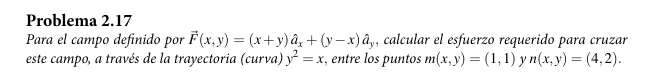

Integrando (F¬∑dr/dt) = 2*t**3 + t**2 + t
Trabajo simb√≥lico W = 34/3 = 34/3
Valor num√©rico W ‚âà 11.333333333333334


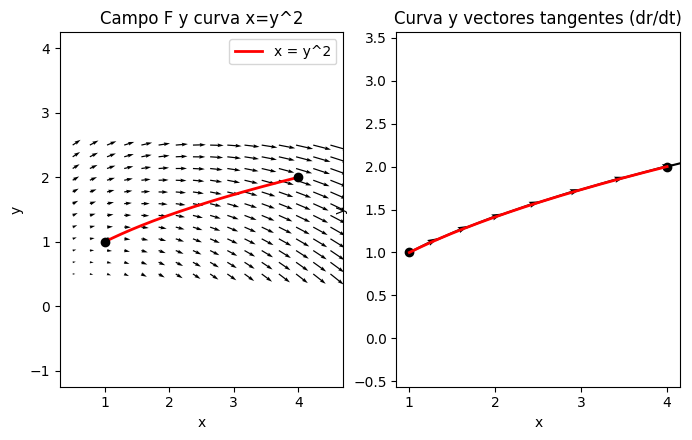

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# S√≠mbolos
t = sp.symbols('t', real=True)

# Parametrizaci√≥n: x = t^2, y = t, t in [1,2]
x = t**2
y = t

# Campo F = (x+y, y-x)
Fx = x + y
Fy = y - x

# dr = (dx, dy) = (2t dt, 1 dt)
dx_dt = sp.diff(x, t)
dy_dt = sp.diff(y, t)

# Producto escalar F¬∑(dr/dt)
integrando = sp.simplify(Fx*dx_dt + Fy*dy_dt)
integrando_simpl = sp.expand(integrando)

# Integral simb√≥lica
W_sym = sp.integrate(integrando_simpl, (t, 1, 2))
W_simpl = sp.simplify(W_sym)

print("Integrando (F¬∑dr/dt) =", integrando_simpl)
print("Trabajo simb√≥lico W =", W_simpl, "=", sp.nsimplify(W_simpl))
print("Valor num√©rico W ‚âà", float(W_simpl))

# ------------------------------------------------
# Resultado esperado: 34/3 ‚âà 11.333333...
# ------------------------------------------------

# (Opcional) Graficar campo en una regi√≥n y la curva x=y^2
Xg = np.linspace(0.5, 4.5, 16)
Yg = np.linspace(0.5, 2.5, 12)
X, Y = np.meshgrid(Xg, Yg)
Fx_num = X + Y
Fy_num = Y - X

plt.figure(figsize=(7,4.5))

# Subplot 1: campo vectorial (plano)
plt.subplot(1,2,1)
plt.quiver(X, Y, Fx_num, Fy_num)
t_vals = np.linspace(1, 2, 200)
plt.plot(t_vals**2, t_vals, 'r', linewidth=2, label='x = y^2')
plt.scatter([1, 4], [1, 2], color='k', zorder=5)
plt.axis('equal')
plt.title('Campo F y curva x=y^2')
plt.xlabel('x'); plt.ylabel('y')
plt.legend()

# Subplot 2: curva parametrizada y la direcci√≥n del dr/dt
plt.subplot(1,2,2)
plt.plot(t_vals**2, t_vals, 'r', linewidth=2)
# Dibujar peque√±os vectores tangentes a la curva
tq = np.linspace(1,2,8)
tx = tq**2
ty = tq
tdx = 2*tq
tdy = np.ones_like(tq)
plt.quiver(tx, ty, tdx, tdy, angles='xy', scale_units='xy', scale=6)
plt.scatter([1,4],[1,2], color='k')
plt.title('Curva y vectores tangentes (dr/dt)')
plt.axis('equal')
plt.xlabel('x'); plt.ylabel('y')

plt.tight_layout()
plt.show()


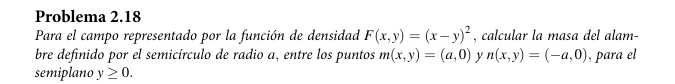

In [ ]:
import sympy as sp

# Par√°metros y variable de integraci√≥n
a, t = sp.symbols('a t', positive=True, real=True)

# Parametrizaci√≥n del semic√≠rculo superior: (x,y) = (a cos t, a sin t),  t ‚àà [0, œÄ]
x = a*sp.cos(t)
y = a*sp.sin(t)

# Densidad F(x,y) = (x - y)^2
F = (x - y)**2

# Elemento de arco ds = |r'(t)| dt  -> para (a cos t, a sin t) resulta a dt
ds = a  # porque |(-a sin t, a cos t)| = a

# Masa: ‚à´_C F ds = ‚à´_0^œÄ F(t) * ds dt
M = sp.integrate(F*ds, (t, 0, sp.pi))
M_simpl = sp.simplify(M)

print("Masa del alambre (simb√≥lica):", M_simpl)   # ‚Üí œÄ*a**3

# Funci√≥n num√©rica para evaluar M dado a
M_num = sp.lambdify(a, M_simpl, 'numpy')

# Ejemplo num√©rico: a = 2
print("Ejemplo a=2  ‚Üí  M =", float(M_num(2)))


Masa del alambre (simb√≥lica): pi*a**3
Ejemplo a=2  ‚Üí  M = 25.132741228718345


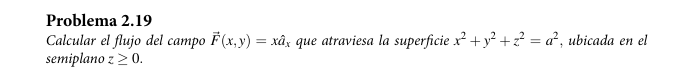

In [ ]:
import sympy as sp

# Variables simb√≥licas
theta, phi, a = sp.symbols('theta phi a', positive=True)

# Expresi√≥n integrando: sin^3(theta) * cos^2(phi)
expr = sp.sin(theta)**3 * sp.cos(phi)**2

# Integral doble
flux = a**3 * sp.integrate(sp.integrate(expr, (theta, 0, sp.pi/2)), (phi, 0, 2*sp.pi))

# Simplificar
flux_simplified = sp.simplify(flux)

print("Flujo a trav√©s de la semiesfera =", flux_simplified)


Flujo a trav√©s de la semiesfera = 2*pi*a**3/3


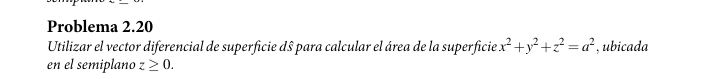

In [ ]:
# √Årea de la semiesfera x^2 + y^2 + z^2 = a^2, con z ‚â• 0, usando dS vectorial
import sympy as sp

# S√≠mbolos
a, phi, theta = sp.symbols('a phi theta', positive=True, real=True)

# Parametrizaci√≥n esf√©rica de la esfera de radio a
# r(phi,theta) = (a sinœÜ cosŒ∏, a sinœÜ sinŒ∏, a cosœÜ)
r = sp.Matrix([
    a*sp.sin(phi)*sp.cos(theta),
    a*sp.sin(phi)*sp.sin(theta),
    a*sp.cos(phi)
])

# Vectores tangentes
r_phi   = r.diff(phi)
r_theta = r.diff(theta)

# Vector diferencial de superficie dS = (r_phi √ó r_theta) dœÜ dŒ∏
dS_vec = r_phi.cross(r_theta)

# Magnitud del elemento de √°rea |dS|
dS = sp.simplify(sp.sqrt(dS_vec.dot(dS_vec)))   # = a^2 sinœÜ

# Integraci√≥n en el hemisferio: œÜ ‚àà [0, œÄ/2], Œ∏ ‚àà [0, 2œÄ]
area = sp.simplify(sp.integrate(dS, (phi, 0, sp.pi/2), (theta, 0, 2*sp.pi)))

print("dS (magnitud) =", dS)        # a^2*sin(phi)
print("√Årea de la superficie (z ‚â• 0) =", area)  # 2œÄ a^2


dS (magnitud) = a**2*Abs(sin(phi))
√Årea de la superficie (z ‚â• 0) = 2*pi*a**2


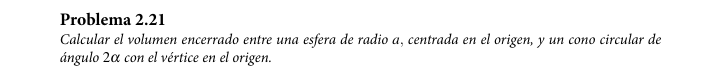

Expresi√≥n simb√≥lica del volumen V:
     3             
2‚ãÖœÄ‚ãÖa ‚ãÖ(1 - cos(Œ±))
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
         3         

Forma equivalente y expl√≠cita:
     3             
2‚ãÖœÄ‚ãÖa ‚ãÖ(1 - cos(Œ±))
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
         3         

Ejemplo num√©rico: a = 1.5, Œ± = 0.5235987755982988 rad (30.0¬∞)
Volumen V = 0.947011 unidades¬≥


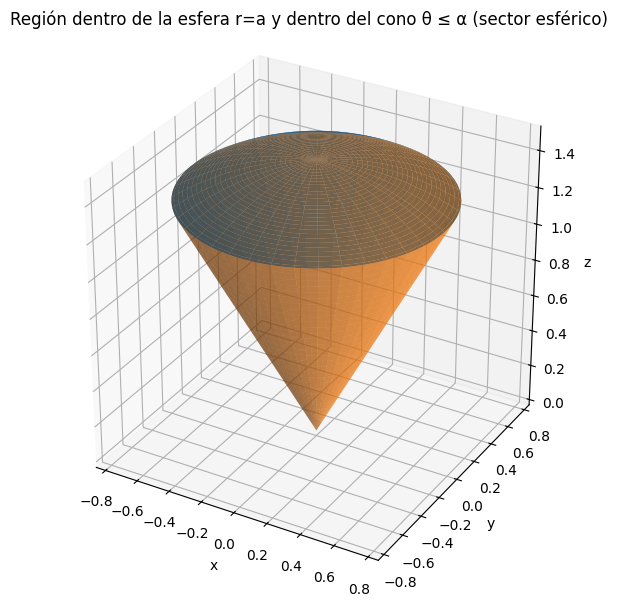

In [ ]:
# C√°lculo y visualizaci√≥n del volumen entre una esfera de radio a y un cono de √°ngulo de v√©rtice 2Œ±.
# Interpretaci√≥n: regi√≥n dentro de la esfera r = a y dentro del cono polar Œ∏ ‚àà [0, Œ±] (en coordenadas esf√©ricas).
# F√≥rmula anal√≠tica y ejemplo num√©rico + gr√°fico de la "tapa esf√©rica" (spherical cap / sector).

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# S√≠mbolos simb√≥licos
a, alpha = sp.symbols('a alpha', positive=True)
# Volumen en coordenadas esf√©ricas:
# V = ‚à´_{phi=0}^{2œÄ} ‚à´_{theta=0}^{Œ±} ‚à´_{rho=0}^{a} rho^2 sin(theta) d rho d theta d phi
V_rho = sp.integrate(sp.Symbol('rho')**2, ('rho', 0, a))  # ‚à´ rho^2 d rho = a^3/3
V_theta = sp.integrate(sp.sin(sp.Symbol('theta')), ('theta', 0, alpha))
V_phi = sp.integrate(1, ('phi', 0, 2*sp.pi))
V_sym = sp.simplify(V_rho * V_theta * V_phi)

# Simplificar V_sym en forma cerrada
V_closed = sp.simplify(V_sym)
V_closed

# Mostrar expresi√≥n simb√≥lica
print("Expresi√≥n simb√≥lica del volumen V:")
sp.pprint(V_closed)

# Escribir la expresi√≥n en forma m√°s expl√≠cita
V_formula = sp.simplify(2*sp.pi*a**3/3 * (1 - sp.cos(alpha)))
print("\nForma equivalente y expl√≠cita:")
sp.pprint(V_formula)

# Evaluaci√≥n num√©rica de ejemplo
a_val = 1.5                    # ejemplo: radio a = 1.5
alpha_val = np.pi/6            # ejemplo: Œ± = 30 grados
V_num = float(V_formula.subs({a: a_val, alpha: alpha_val}))
print(f"\nEjemplo num√©rico: a = {a_val}, Œ± = {alpha_val} rad ({alpha_val*180/np.pi:.1f}¬∞)")
print(f"Volumen V = {V_num:.6f} unidades¬≥")

# Gr√°fica 3D de la superficie esf√©rica limitada por Œ∏ ‚àà [0, Œ±] (la 'tapa' interior del cono)
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

# Malla en theta (0..alpha) y phi (0..2œÄ)
theta_vals = np.linspace(0, alpha_val, 60)
phi_vals = np.linspace(0, 2*np.pi, 80)
Theta, Phi = np.meshgrid(theta_vals, phi_vals)

# Coordenadas de la superficie r = a
X = a_val * np.sin(Theta) * np.cos(Phi)
Y = a_val * np.sin(Theta) * np.sin(Phi)
Z = a_val * np.cos(Theta)

# Dibujar la superficie esf√©rica (la tapa dentro del cono)
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True)

# Dibujar la superficie lateral del cono (opcional) para referencia
# Generamos una superficie c√≥nica truncada (0 <= rho <= a, Œ∏ = Œ±)
rho_vals = np.linspace(0, a_val, 30)
Rho, Phi_c = np.meshgrid(rho_vals, phi_vals)
Xc = Rho * np.sin(alpha_val) * np.cos(Phi_c)
Yc = Rho * np.sin(alpha_val) * np.sin(Phi_c)
Zc = Rho * np.cos(alpha_val)
ax.plot_surface(Xc, Yc, Zc, linewidth=0, antialiased=True, alpha=0.5)

# Ajustes de la gr√°fica
ax.set_title("Regi√≥n dentro de la esfera r=a y dentro del cono Œ∏ ‚â§ Œ± (sector esf√©rico)")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_box_aspect([1,1,1])
plt.tight_layout()
plt.show()


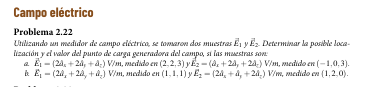

In [ ]:
# Requiere: sympy, numpy (opcional)
import sympy as sp

# Definimos las inc√≥gnitas del campo af√≠n:
a,b,c,d,e,f = sp.symbols('a b c d e f', real=True)

# Formulario general:
# Ex = a*x + b*y + c
# Ey = d*x + e*y + f

# --- Introduce aqu√≠ las muestras (reemplaza por las de tu problema) ---
# Formato: [ (x, y, Ex, Ey), ... ]
# Ejemplo gen√©rico (reemplaza por tus datos):
samples = [
    (2, 2,  6,  0),   # punto (2,2) con E=(6,0)  <-- EJEMPLO
    (1, 1,  4,  0),   # punto (1,1) con E=(4,0)  <-- EJEMPLO
    # agrega m√°s muestras si las tienes
]

# Construir ecuaciones lineales a partir de las muestras
eqs = []
for (x_i, y_i, Ex_i, Ey_i) in samples:
    eqs.append(sp.Eq(a*x_i + b*y_i + c, Ex_i))  # Ex en (x_i,y_i)
    eqs.append(sp.Eq(d*x_i + e*y_i + f, Ey_i))  # Ey en (x_i,y_i)

# Resolver el sistema (puede ser subdeterminado y devolver par√°metros libres)
unknowns = (a,b,c,d,e,f)
sol = sp.linsolve(eqs, unknowns)

print("N√∫mero de ecuaciones:", len(eqs))
print("N√∫mero de inc√≥gnitas:", len(unknowns))
print("\nSoluci√≥n (familia de soluciones si hay par√°metros libres):")
if len(sol) == 0:
    print("No hay soluci√≥n (sistema inconsistente) ‚Äî revisa las muestras.")
else:
    sol = list(sol)[0]  # linsolve devuelve un FiniteSet con una tupla (posible con par√°metros)
    sp.pprint(sol)

# --- Opcional: expresar la soluci√≥n en forma de campo E(x,y) ---
# Si la soluci√≥n tiene par√°metros (t0, t1, ...), sp.pprint ya los muestra.
# Si hay soluci√≥n √∫nica, mostramos la forma expl√≠cita:
if all(not expr.free_symbols - set([a,b,c,d,e,f]) for expr in sol):
    # no necesariamente √∫nico: comprobaci√≥n r√°pida: si la soluci√≥n no contiene s√≠mbolos nuevos (harmless),
    # mejor verificar si es num√©rica (no contiene par√°metros)
    params = set().union(*[expr.free_symbols for expr in sol])
    if params <= set([a,b,c,d,e,f]):
        # esto no garantiza unicidad, pero generalmente si no aparecen par√°metros es √∫nica
        Ex_expr = sp.simplify(sol[0]*sp.symbols('x') + sol[1]*sp.symbols('y') + sol[2])
        Ey_expr = sp.simplify(sol[3]*sp.symbols('x') + sol[4]*sp.symbols('y') + sol[5])
        print("\nForma del campo (posible):")
        print("E_x(x,y)  =", Ex_expr)
        print("E_y(x,y)  =", Ey_expr)

# -----------------------------------------
# Si quieres usar valores concretos y obtener una soluci√≥n num√©rica:
# - Reemplaza 'samples' por los puntos y vectores del enunciado.
# - Si tienes solo 2 muestras (4 ecuaciones) el resultado tendr√° 2 grados de libertad.
#   linsolve mostrar√° esos par√°metros (por ejemplo t0, t1). Puedes fijarlos para obtener una
#   soluci√≥n particular (p. ej. minimizar norma de coeficientes, o suponer c=f=0, etc.).
# -----------------------------------------


N√∫mero de ecuaciones: 4
N√∫mero de inc√≥gnitas: 6

Soluci√≥n (familia de soluciones si hay par√°metros libres):
(2 - b, b, 2, -e, e, 0)

Forma del campo (posible):
E_x(x,y)  = b*y - x*(b - 2) + 2
E_y(x,y)  = e*(-x + y)


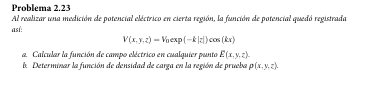

In [ ]:
# pip install sympy  (si lo necesitas)
import sympy as sp

# S√≠mbolos
x, y, z = sp.symbols('x y z', real=True)
V0, k, eps0 = sp.symbols('V0 k eps0', positive=True, real=True)

# Potencial medido
V = V0 * sp.exp(-k*sp.Abs(z)) * sp.cos(k*x)

# (a) Campo el√©ctrico E = -‚àáV
Ex = -sp.diff(V, x)
Ey = -sp.diff(V, y)      # V no depende de y
Ez = -sp.diff(V, z)
E = sp.Matrix([sp.simplify(Ex), sp.simplify(Ey), sp.simplify(Ez)])

print("Campo el√©ctrico E(x,y,z) =")
sp.pprint(E)

# (b) Densidad de carga œÅ = -Œµ0 ‚àá¬≤V
lap = sp.diff(V, x, 2) + sp.diff(V, y, 2) + sp.diff(V, z, 2)
rho = -eps0 * sp.simplify(lap)

print("\nLaplaciano de V (‚àá¬≤V) =")
sp.pprint(sp.simplify(lap))

print("\nDensidad de carga œÅ(x,y,z) = -Œµ0 ‚àá¬≤V =")
sp.pprint(rho)


Campo el√©ctrico E(x,y,z) =
‚é°             -k‚ãÖ‚îÇz‚îÇ                ‚é§
‚é¢       V‚ÇÄ‚ãÖk‚ãÖ‚ÑØ      ‚ãÖsin(k‚ãÖx)       ‚é•
‚é¢                                   ‚é•
‚é¢                 0                 ‚é•
‚é¢                                   ‚é•
‚é¢‚éß           0             for z = 0‚é•
‚é¢‚é™                                  ‚é•
‚é¢‚é™        -k‚ãÖ‚îÇz‚îÇ                    ‚é•
‚é¢‚é®V‚ÇÄ‚ãÖk‚ãÖz‚ãÖ‚ÑØ      ‚ãÖcos(k‚ãÖx)           ‚é•
‚é¢‚é™‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ  otherwise‚é•
‚é¢‚é™          ‚îÇz‚îÇ                     ‚é•
‚é£‚é©                                  ‚é¶

Laplaciano de V (‚àá¬≤V) =
‚éß -V‚ÇÄ‚ãÖk‚ãÖ(k + 2‚ãÖŒ¥(0))‚ãÖcos(k‚ãÖx)   for z = 0
‚é™                                        
‚é®         -k‚ãÖ‚îÇz‚îÇ                         
‚é™-2‚ãÖV‚ÇÄ‚ãÖk‚ãÖ‚ÑØ      ‚ãÖcos(k‚ãÖx)‚ãÖŒ¥(z)  otherwise
‚é©                                        

Densidad de carga œÅ(x,y,z) = -Œµ0 ‚àá¬≤V =
      ‚éõ‚éß -V‚ÇÄ‚ãÖk‚ãÖ(k + 2‚ãÖŒ¥(

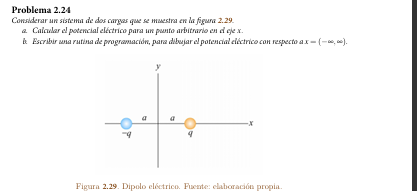

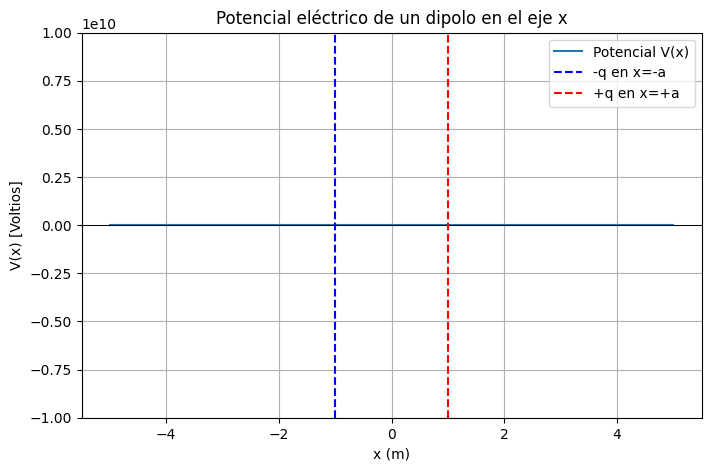

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
k = 9e9       # Constante de Coulomb (N¬∑m¬≤/C¬≤)
q = 1e-9      # Carga (C)
a = 1.0       # Distancia (m)

# Definir potencial en el eje x
def V(x):
    return k * (q/np.abs(x-a) - q/np.abs(x+a))

# Rango en x (evitando singularidades en ¬±a)
x = np.linspace(-5, 5, 1000)
x = x[(x != -a) & (x != a)]

# Evaluar potencial
Vx = V(x)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(x, Vx, label="Potencial V(x)")
plt.axhline(0, color="black", linewidth=0.7)
plt.axvline(-a, color="b", linestyle="--", label="-q en x=-a")
plt.axvline(a, color="r", linestyle="--", label="+q en x=+a")
plt.ylim(-1e10, 1e10)  # limitar para que no exploten las singularidades
plt.legend()
plt.xlabel("x (m)")
plt.ylabel("V(x) [Voltios]")
plt.title("Potencial el√©ctrico de un dipolo en el eje x")
plt.grid(True)
plt.show()


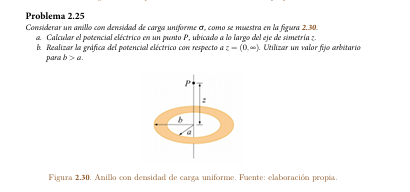

Potencial en z = 0.20 m : V = 9.855e+02 V


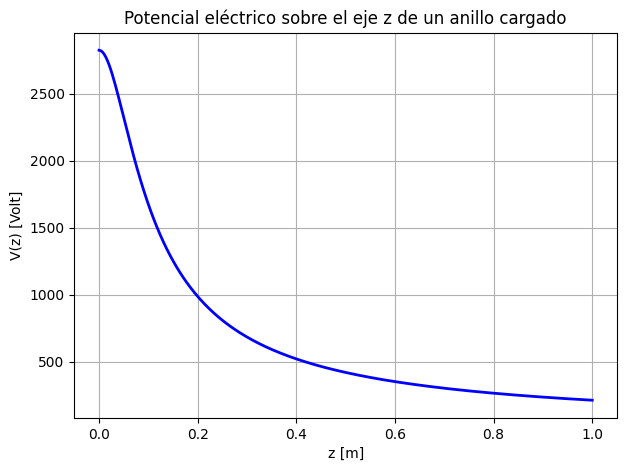

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Constante de permitividad (SI)
epsilon0 = 8.854e-12

# Par√°metros del problema
sigma = 1e-6   # densidad de carga [C/m^2] (ejemplo)
a = 0.05       # radio interior [m]
b = 0.10       # radio exterior [m]

# ------------------------------
# (a) Potencial el√©ctrico en z
# ------------------------------
def V(z, sigma=sigma, a=a, b=b, eps0=epsilon0):
    return (sigma/(2*eps0)) * (np.sqrt(b**2 + z**2) - np.sqrt(a**2 + z**2))

# Ejemplo: potencial en z = 0.2 m
z0 = 0.2
print(f"Potencial en z = {z0:.2f} m : V = {V(z0):.3e} V")

# ------------------------------
# (b) Gr√°fica V(z) en [0, 1] m
# ------------------------------
z_vals = np.linspace(0, 1, 300)
V_vals = V(z_vals)

plt.figure(figsize=(7,5))
plt.plot(z_vals, V_vals, 'b-', linewidth=2)
plt.title("Potencial el√©ctrico sobre el eje z de un anillo cargado")
plt.xlabel("z [m]")
plt.ylabel("V(z) [Volt]")
plt.grid(True)
plt.show()


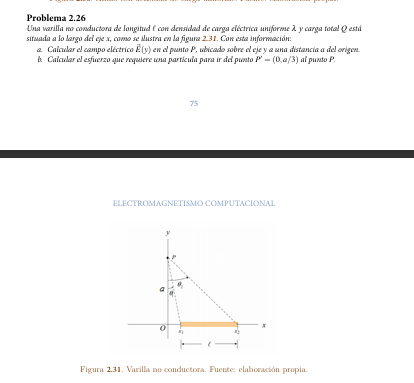

In [ ]:
import sympy as sp
import numpy as np

# s√≠mbolos
a, L, lam, q = sp.symbols('a L lam q', positive=True)
eps0 = 8.854187817e-12
k = 1/(4*sp.pi*eps0)

# Componentes del campo en P=(0,a) para varilla de x in [0,L]
Ex = k*lam*(1/a - 1/sp.sqrt(a**2 + L**2))
Ey = k*lam*(L/sp.sqrt(a**2 + L**2))

# Potencial en el eje y a distancia 'a' (V(‚àû)=0)
V = k*lam*sp.log( (L + sp.sqrt(L**2 + a**2)) / a )

sp.pprint(sp.simplify(Ex), use_unicode=True)
sp.pprint(sp.simplify(Ey), use_unicode=True)
print("V(a) =")
sp.pprint(sp.simplify(V), use_unicode=True)

# ---------------------------
# Ejemplo num√©rico
# ---------------------------
params = {
    L: 1.0,         # longitud en metros
    lam: 1e-6,      # densidad lineal C/m (ejemplo)
    a: 0.5,         # distancia y en metros
    q: 1e-7         # carga que movemos en Coulombs
}

Ex_num = float(sp.N(Ex.subs(params)))
Ey_num = float(sp.N(Ey.subs(params)))
V_a = float(sp.N(V.subs(params)))
V_a3 = float(sp.N(V.subs({L:params[L], lam:params[lam], a:params[a]/3})))

W = float(params[q]*(V_a - V_a3))  # trabajo al mover q de a/3 a a

print("\nEjemplo num√©rico (par√°metros):", params)
print(f"Ex = {Ex_num:.3e} N/C")
print(f"Ey = {Ey_num:.3e} N/C")
print(f"V(a) = {V_a:.6e} V")
print(f"V(a/3) = {V_a3:.6e} V")
print(f"Trabajo W (mover q de a/3 a a) = {W:.6e} J")

# ---------------------------
# (Opcional) evaluar usando Q = lambda*L
# ---------------------------
Q = params[lam]*params[L]
print(f"Q = {Q:.3e} C  (comprobaci√≥n)")
Ex_viaQ = (1/(4*np.pi*8.854187817e-12))* (Q/params[a] - Q/np.sqrt(params[a]**2 + params[L]**2))/params[L]*params[L]
# la expresi√≥n anterior es equivalente a Ex_num; la dejamos como referencia


  28235226670.932‚ãÖlam   28235226670.932‚ãÖlam
- ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
         _________              œÄ‚ãÖa        
        ‚ï±  2    2                          
    œÄ‚ãÖ‚ï≤‚ï±  L  + a                           
28235226670.932‚ãÖL‚ãÖlam
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        _________    
       ‚ï±  2    2     
   œÄ‚ãÖ‚ï≤‚ï±  L  + a      
V(a) =
   ‚éõ                  28235226670.932‚ãÖlam‚éû
   ‚éú                  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü
   ‚éú                           œÄ         ‚éü
   ‚éú‚éõ       _________‚éû                   ‚éü
   ‚éú‚éú      ‚ï±  2    2 ‚éü                   ‚éü
   ‚éú‚éúL + ‚ï≤‚ï±  L  + a  ‚éü                   ‚éü
log‚éú‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü                   ‚éü
   ‚éù‚éù       a        ‚é†                   ‚é†

Ejemplo num√©rico (par√°metros): {L: 1.0

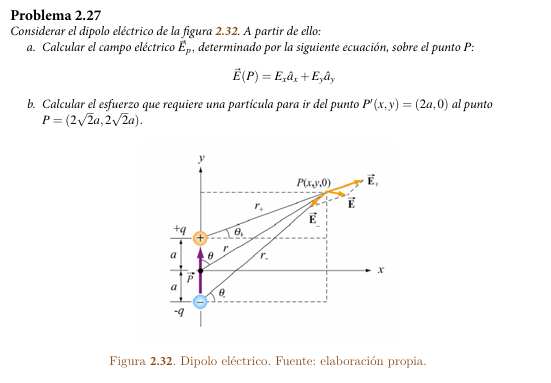

In [ ]:
import sympy

def solucion_problema_dipolo():
    """
    Resuelve simb√≥licamente el problema 2.27 de un dipolo el√©ctrico.

    - Parte a: Calcula el campo el√©ctrico en un punto P(x, y).
    - Parte b: Calcula el trabajo para mover una part√≠cula de P' a P.
    """

    # --- Definici√≥n de variables simb√≥licas ---
    # Usamos sympy.symbols para definir las variables del problema de forma algebraica.
    q = sympy.Symbol('q', real=True, positive=True)      # Carga del dipolo
    a = sympy.Symbol('a', real=True, positive=True)      # Distancia de las cargas al origen
    x = sympy.Symbol('x', real=True)                     # Coordenada x del punto P
    y = sympy.Symbol('y', real=True)                     # Coordenada y del punto P
    k = sympy.Symbol('k', real=True, positive=True)      # Constante de Coulomb (1 / (4*pi*epsilon_0))
    q_particula = sympy.Symbol('q_p', real=True)         # Carga de la part√≠cula a mover

    # =================================================================
    #  Parte a: C√°lculo del Campo El√©ctrico en P(x,y)
    # =================================================================
    print("--- Parte a: C√°lculo del Campo El√©ctrico E(P) ---")

    # Posici√≥n de las cargas y del punto P
    pos_q_positiva = sympy.Matrix([0, a])
    pos_q_negativa = sympy.Matrix([0, -a])
    pos_P = sympy.Matrix([x, y])

    # Vectores de distancia desde cada carga hasta el punto P
    r_mas = pos_P - pos_q_positiva
    r_menos = pos_P - pos_q_negativa

    # Magnitud de los vectores de distancia
    mag_r_mas = r_mas.norm()
    mag_r_menos = r_menos.norm()

    # C√°lculo del campo el√©ctrico de cada carga usando la ley de Coulomb:
    # E = (k * q * r_vector) / |r_vector|^3
    E_mas = (k * q * r_mas) / (mag_r_mas**3)
    E_menos = (k * (-q) * r_menos) / (mag_r_menos**3)

    # El campo total es la superposici√≥n (suma vectorial) de los campos individuales
    E_total = E_mas + E_menos

    # Extraemos las componentes Ex y Ey
    E_x = E_total[0]
    E_y = E_total[1]

    print("La componente Ex del campo el√©ctrico es:")
    sympy.pprint(E_x)
    print("\nLa componente Ey del campo el√©ctrico es:")
    sympy.pprint(E_y)
    print("-" * 50)


    # =================================================================
    #  Parte b: C√°lculo del Trabajo de P' a P
    # =================================================================
    print("\n--- Parte b: C√°lculo del Trabajo para mover una part√≠cula de P' a P ---")

    # El trabajo (esfuerzo) es W = q_p * (V(P) - V(P')), donde V es el potencial.
    # El potencial V en un punto es la suma de los potenciales de cada carga: V = k*q/r

    # Potencial el√©ctrico en un punto gen√©rico (x,y)
    V_generico = (k * q / mag_r_mas) + (k * (-q) / mag_r_menos)

    # Coordenadas de los puntos inicial y final
    # P' = (2a, 0)
    # P = (2*sqrt(2)*a, 2*sqrt(2)*a)
    x_P_prima, y_P_prima = 2 * a, 0
    x_P, y_P = 2 * sympy.sqrt(2) * a, 2 * sympy.sqrt(2) * a

    # Calculamos el potencial en el punto P' sustituyendo sus coordenadas
    V_P_prima = V_generico.subs({x: x_P_prima, y: y_P_prima})
    print(f"El potencial en el punto P'({x_P_prima}, {y_P_prima}) es:")
    sympy.pprint(sympy.simplify(V_P_prima)) # Deber√≠a ser 0

    # Calculamos el potencial en el punto P sustituyendo sus coordenadas
    V_P = V_generico.subs({x: x_P, y: y_P})
    print(f"\nEl potencial en el punto P({x_P}, {y_P}) es:")
    sympy.pprint(sympy.simplify(V_P))

    # El trabajo es la carga de la part√≠cula por la diferencia de potencial
    trabajo = q_particula * (V_P - V_P_prima)

    print("\nEl esfuerzo o trabajo requerido es W = q_p * (V(P) - V(P')).\nLa expresi√≥n simb√≥lica para el trabajo es:")
    # Usamos sympy.simplify() para obtener la expresi√≥n m√°s compacta.
    sympy.pprint(sympy.simplify(trabajo))
    print("-" * 50)


# --- Ejecutar la funci√≥n principal ---
if __name__ == "__main__":
    solucion_problema_dipolo()

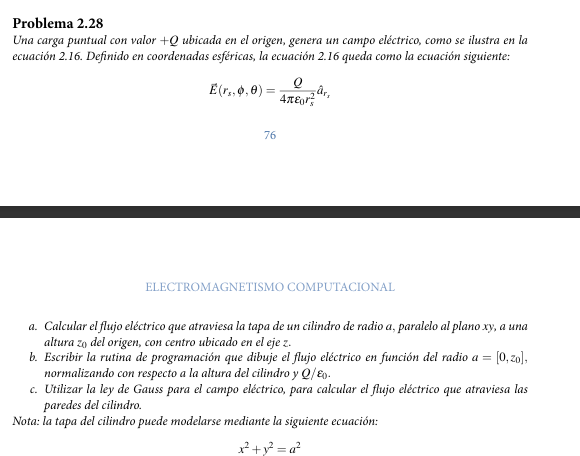

                  Q‚ãÖz‚ÇÄ             Q   
Œ¶‚Çú‚Çê‚Çö‚Çê = - ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                    __________   2‚ãÖeps‚ÇÄ
                   ‚ï±  2     2          
          2‚ãÖeps‚ÇÄ‚ãÖ‚ï≤‚ï±  a  + z‚ÇÄ           
Ejemplo: Q = 1e-09 C, z0 = 1.0 m
Phi_tapa(a=0) = 0.0   (deber√≠a ser 0)
Phi_tapa(a->inf) -> 56.47045334186409   (mitad del flujo)
Phi_paredes para a = 1.0 m  => 39.93064049471063  (unidades SI)


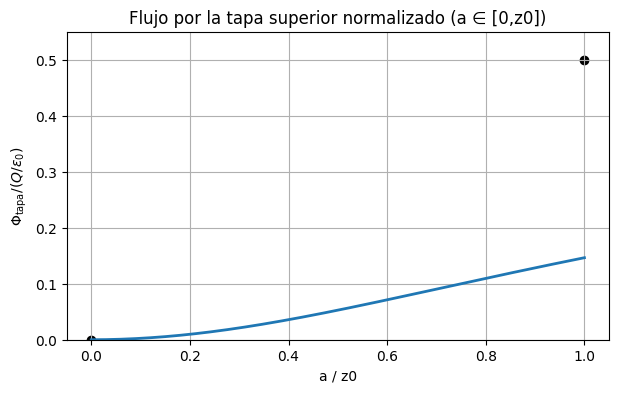

In [20]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# S√≠mbolos
Q, eps0, a, z0 = sp.symbols('Q eps0 a z0', positive=True)
eps0_val = 8.854187817e-12

# Expresi√≥n simb√≥lica del flujo por la tapa superior
Phi_tapa = sp.simplify(Q/(2*eps0) * (1 - z0/sp.sqrt(a**2 + z0**2)))
sp.pprint(sp.Eq(sp.symbols('Phi_tapa'), Phi_tapa))

# ---------- Funciones num√©ricas ----------
Phi_tapa_num = sp.lambdify((Q, a, z0, eps0), Phi_tapa, 'numpy')

def phi_tapa(Qval, aval, z0val, eps0val=eps0_val):
    return float(Phi_tapa_num(Qval, aval, z0val, eps0val))

def phi_paredes(Qval, aval, z0val, eps0val=eps0_val):
    # flujo en la base (z=0) usando la misma f√≥rmula con z0->0:
    Phi_base = Qval/(2*eps0val)  # = limite de la expresion para z0->0
    Phi_top = phi_tapa(Qval, aval, z0val, eps0val)
    return Qval/eps0val - Phi_base - Phi_top  # total - base - tapa

# ---------- Ejemplo num√©rico ----------
Qval = 1e-9  # C
z0val = 1.0  # m
a_vals = np.linspace(0, z0val, 200)

Phi_vals = np.array([phi_tapa(Qval, ai, z0val) for ai in a_vals])
Phi_norm = Phi_vals / (Qval/eps0_val)  # normalizado por Q/eps0

print("Ejemplo: Q =", Qval, "C, z0 =", z0val, "m")
print("Phi_tapa(a=0) =", phi_tapa(Qval, 0.0, z0val), "  (deber√≠a ser 0)")
print("Phi_tapa(a->inf) ->", Qval/(2*eps0_val), "  (mitad del flujo)")

# Flujo por paredes para un a concreto (ejemplo a = z0)
a_example = z0val
Phi_walls_example = phi_paredes(Qval, a_example, z0val)
print(f"Phi_paredes para a = {a_example} m  => {Phi_walls_example}  (unidades SI)")

# ---------- Gr√°fica ----------
plt.figure(figsize=(7,4))
plt.plot(a_vals/z0val, Phi_norm, lw=2)
plt.scatter([0,1], [0, 0.5], color='k')  # puntos (a=0 => 0, a->z0 => some value)
plt.xlabel('a / z0')
plt.ylabel(r'$\Phi_{\mathrm{tapa}}/(Q/\varepsilon_0)$')
plt.title('Flujo por la tapa superior normalizado (a ‚àà [0,z0])')
plt.grid(True)
plt.ylim(0, 0.55)
plt.show()


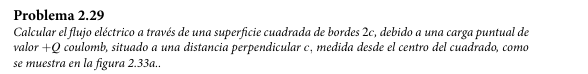

In [21]:
import scipy.constants as constants

def calcular_flujo_electrico(carga_Q: float) -> float:
    """
    Calcula el flujo el√©ctrico a trav√©s de una superficie cuadrada
    debido a una carga puntual situada a una distancia perpendicular
    desde su centro, usando la Ley de Gauss y un argumento de simetr√≠a.

    La geometr√≠a del problema (lado 2c, distancia c) permite considerar
    el cuadrado como una de las seis caras de un cubo con la carga en su centro.

    Args:
        carga_Q (float): El valor de la carga puntual en Coulombs.

    Returns:
        float: El flujo el√©ctrico a trav√©s de la superficie cuadrada en N¬∑m¬≤/C.
    """
    # Œµ‚ÇÄ (√©psilon cero) es la permitividad del vac√≠o.
    # Su valor se obtiene de la librer√≠a scipy.constants.
    epsilon_0 = constants.epsilon_0

    # El flujo a trav√©s de una cara del cubo es la carga total dividida por 6 * Œµ‚ÇÄ.
    flujo = carga_Q / (6 * epsilon_0)

    return flujo

# --- Ejemplo de Uso ---
# Asigna un valor a la carga Q en Coulombs.
# Por ejemplo, una carga de 1 microcoulomb (1 x 10^-6 C).
Q = 1e-6

# Llama a la funci√≥n para calcular el flujo.
flujo_resultado = calcular_flujo_electrico(Q)

# Imprime el resultado de forma clara y legible.
print(f"** Soluci√≥n al Problema 2.29 **\n")
print(f"Datos:")
print(f"  - Carga (Q): {Q:.2e} C")
print(f"  - Permitividad del vac√≠o (Œµ‚ÇÄ): {constants.epsilon_0:.2e} F/m\n")
print(f"Resultado:")
# El resultado se formatea en notaci√≥n cient√≠fica con 4 decimales.
print(f"  -> El flujo el√©ctrico a trav√©s de la superficie cuadrada es: {flujo_resultado:.4e} N¬∑m¬≤/C")

** Soluci√≥n al Problema 2.29 **

Datos:
  - Carga (Q): 1.00e-06 C
  - Permitividad del vac√≠o (Œµ‚ÇÄ): 8.85e-12 F/m

Resultado:
  -> El flujo el√©ctrico a trav√©s de la superficie cuadrada es: 1.8823e+04 N¬∑m¬≤/C


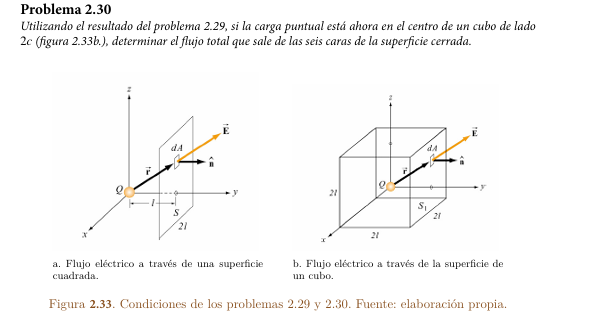

In [22]:
# Problema 2.30 ‚Äì Flujo total por un cubo con una carga en el centro
import sympy as sp

Q, eps0 = sp.symbols('Q eps0', positive=True, real=True)

Phi_total = Q/eps0                  # Ley de Gauss
Phi_por_cara = sp.simplify(Phi_total/6)

print("Flujo total que sale del cubo:   Œ¶_total =", Phi_total)
print("Flujo por cada una de las 6 caras: Œ¶_cara  =", Phi_por_cara)


Flujo total que sale del cubo:   Œ¶_total = Q/eps0
Flujo por cada una de las 6 caras: Œ¶_cara  = Q/(6*eps0)


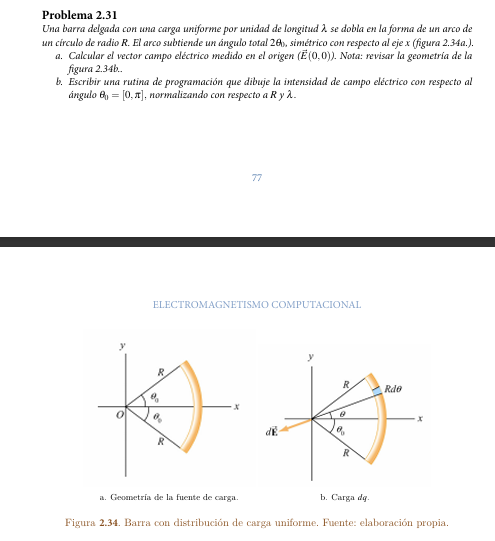

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1840808342.py:34: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Intensidad Normalizada $|\mathcal{E}| = \\frac{|\\vec{E}|}{k\\lambda/R}$', fontsize=12)


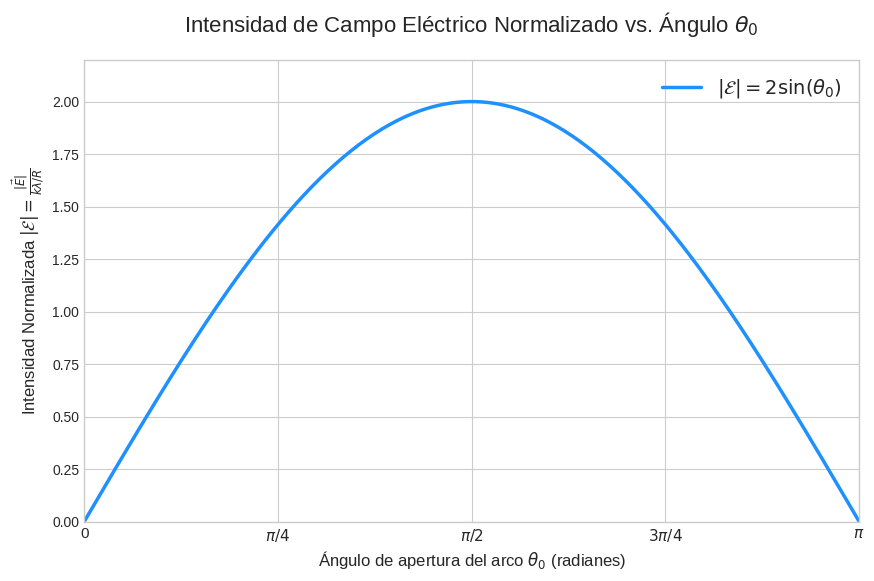

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# --- Configuraci√≥n del Estilo de la Gr√°fica ---
# Usamos un estilo que mejora la visualizaci√≥n de las gr√°ficas.
plt.style.use('seaborn-v0_8-whitegrid')

# --- Parte a: Soluci√≥n Anal√≠tica ---
# La intensidad del campo el√©ctrico es |E| = (2*k*lambda/R) * sin(theta_0)
# La intensidad normalizada es |E_norm| = |E| / (k*lambda/R) = 2 * sin(theta_0)

# --- Parte b: Rutina de Programaci√≥n para Graficar la Intensidad ---

# 1. Definir el rango del √°ngulo theta_0
# Creamos un arreglo de 300 puntos para theta_0, desde 0 hasta pi (180 grados),
# para obtener una curva suave.
theta_0_rad = np.linspace(0, np.pi, 300)

# 2. Calcular la intensidad del campo el√©ctrico normalizado
# Aplicamos la f√≥rmula que derivamos: E_norm = 2 * sin(theta_0)
E_normalized = 2 * np.sin(theta_0_rad)

# 3. Crear la gr√°fica
# Configuramos el tama√±o de la figura para una mejor visualizaci√≥n.
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujamos la funci√≥n
ax.plot(theta_0_rad, E_normalized, color='dodgerblue', linewidth=2.5, label=r'$|\mathcal{E}| = 2\sin(\theta_0)$')

# 4. A√±adir T√≠tulos y Etiquetas
# Es importante que los ejes y el t√≠tulo sean descriptivos.
ax.set_title('Intensidad de Campo El√©ctrico Normalizado vs. √Ångulo $\\theta_0$', fontsize=16, pad=20)
ax.set_xlabel('√Ångulo de apertura del arco $\\theta_0$ (radianes)', fontsize=12)
ax.set_ylabel('Intensidad Normalizada $|\mathcal{E}| = \\frac{|\\vec{E}|}{k\\lambda/R}$', fontsize=12)

# 5. Personalizar los Ejes y la Leyenda
# Establecemos l√≠mites para que la gr√°fica se vea bien.
ax.set_xlim(0, np.pi)
ax.set_ylim(0, 2.2)

# Configuramos las marcas en el eje x para que muestren m√∫ltiplos de pi.
ax.set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['0', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$'], fontsize=11)

# A√±adimos una leyenda para identificar la curva.
ax.legend(fontsize=14)

# 6. Mostrar la gr√°fica final
plt.show()

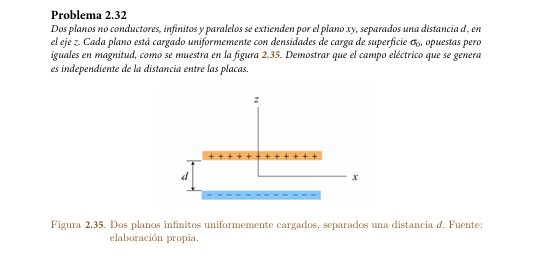

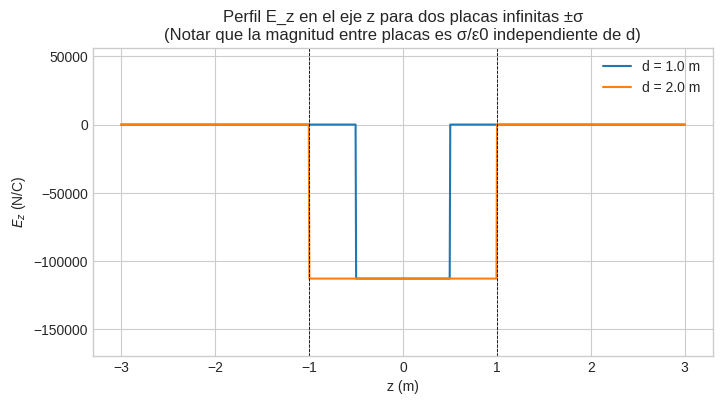

Magnitud del campo entre placas = œÉ/Œµ0 = 1.129e+05 N/C (independiente de d)


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
eps0 = 8.854187817e-12   # C^2/(N¬∑m^2)
sigma = 1e-6             # C/m^2 (ejemplo, magnitud)
# probamos dos separaciones distintas para mostrar independencia con d
ds = [1.0, 2.0]  # m

z = np.linspace(-3.0, 3.0, 1001)  # eje z donde evaluamos E

def E_z_profile(z, d, sigma):
    """
    Perfil E_z a lo largo del eje z para dos placas en z = +/- d/2
    convencion: sigma > 0 en z=+d/2, -sigma en z=-d/2
    se devuelve el componente E_z (positivo = +z)
    """
    z_pos = +d/2
    z_neg = -d/2
    E = np.zeros_like(z)
    # entre placas: -d/2 < z < +d/2  => campo dirigido de +sigma a -sigma => -z (si sigma>0)
    mask_between = (z > z_neg) & (z < z_pos)
    E[mask_between] = - sigma / eps0   # direcci√≥n: desde +sigma (arriba) hacia -sigma (abajo)
    # fuera: E = 0 (ya inicializado)
    return E

plt.figure(figsize=(8,4))

for d in ds:
    Ez = E_z_profile(z, d, sigma)
    plt.plot(z, Ez, label=f"d = {d} m")

plt.axvline(-ds[-1]/2, color='k', linestyle='--', linewidth=0.6)  # referencia de placa (para d=2)
plt.axvline(+ds[-1]/2, color='k', linestyle='--', linewidth=0.6)
plt.xlabel("z (m)")
plt.ylabel(r"$E_z$ (N/C)")
plt.title("Perfil E_z en el eje z para dos placas infinitas ¬±œÉ\n(Notar que la magnitud entre placas es œÉ/Œµ0 independiente de d)")
plt.legend()
plt.grid(True)
plt.ylim(-1.5 * sigma/eps0, 0.5 * sigma/eps0)
plt.show()

# Mostrar valores num√©ricos caracter√≠sticos
val_between = sigma/eps0
print(f"Magnitud del campo entre placas = œÉ/Œµ0 = {val_between:.3e} N/C (independiente de d)")


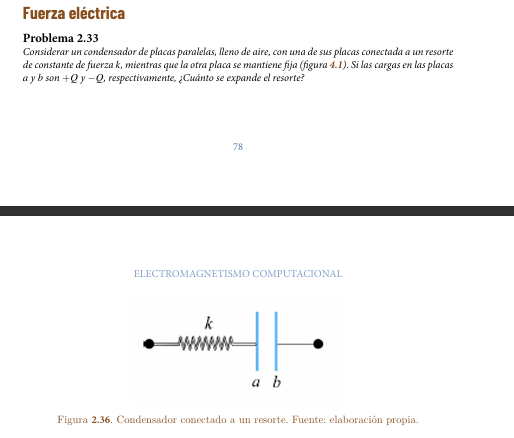

In [25]:
import scipy.constants as constants

def calcular_expansion_resorte(carga_Q, constante_k, area_placa_A):
    """
    Calcula la expansi√≥n de un resorte conectado a una placa de un capacitor.

    Args:
        carga_Q (float): La magnitud de la carga en una de las placas (en Coulombs, C).
        constante_k (float): La constante de fuerza del resorte (en Newtons por metro, N/m).
        area_placa_A (float): El √°rea de una de las placas del capacitor (en metros cuadrados, m¬≤).

    Returns:
        float: La expansi√≥n del resorte (en metros, m).
    """
    # Constante de la permitividad del vac√≠o (epsilon nought)
    epsilon_0 = constants.epsilon_0  # en F/m

    # F√≥rmula para la expansi√≥n (x) derivada de la igualdad de fuerzas:
    # k * x = Q^2 / (2 * A * Œµ‚ÇÄ)
    # x = Q^2 / (2 * k * A * Œµ‚ÇÄ)

    expansion_x = (carga_Q**2) / (2 * constante_k * area_placa_A * epsilon_0)

    return expansion_x

# --- Ejemplo de uso ---
if __name__ == "__main__":
    # VALORES DE EJEMPLO (puedes cambiarlos seg√∫n los datos de un problema espec√≠fico)
    carga_placas = 1.5e-6  # Carga de 1.5 micro-Coulombs
    constante_resorte = 120    # Constante del resorte de 120 N/m
    area_placas = 0.05       # √Årea de las placas de 0.05 m¬≤ (e.g., 22.3 cm x 22.3 cm)

    # Llamada a la funci√≥n para calcular la expansi√≥n
    expansion = calcular_expansion_resorte(carga_placas, constante_resorte, area_placas)

    # --- Impresi√≥n de resultados ---
    print("--- Calculadora de Expansi√≥n del Resorte en Capacitor ---")
    print(f"\nDatos de entrada:")
    print(f"  - Carga en las placas (Q): {carga_placas:.2e} C")
    print(f"  - Constante del resorte (k): {constante_resorte} N/m")
    print(f"  - √Årea de las placas (A): {area_placas} m¬≤")

    print("\n---------------------------------------------------------")
    print(f"‚úÖ La expansi√≥n del resorte es de {expansion:.6f} metros.")
    print(f"   (Equivalente a {expansion * 1000:.3f} mil√≠metros)")
    print("---------------------------------------------------------")

--- Calculadora de Expansi√≥n del Resorte en Capacitor ---

Datos de entrada:
  - Carga en las placas (Q): 1.50e-06 C
  - Constante del resorte (k): 120 N/m
  - √Årea de las placas (A): 0.05 m¬≤

---------------------------------------------------------
‚úÖ La expansi√≥n del resorte es de 0.021176 metros.
   (Equivalente a 21.176 mil√≠metros)
---------------------------------------------------------


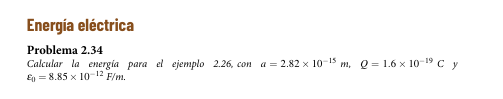

In [26]:
import math

# --- Datos del Problema ---
# Carga (Q) en Coulombs
Q = 1.6e-19  # 1.6 * 10^-19 C

# Radio (a) en metros
a = 2.82e-15  # 2.82 * 10^-15 m

# Permitividad del vac√≠o (epsilon_0) en Farads por metro
epsilon_0 = 8.85e-12 # 8.85 * 10^-12 F/m

# --- C√°lculo de la Energ√≠a ---

# F√≥rmula: W_E = Q^2 / (8 * pi * epsilon_0 * a)

# Calcular el numerador
numerador = Q**2

# Calcular el denominador
denominador = 8 * math.pi * epsilon_0 * a

# Realizar la divisi√≥n para encontrar la energ√≠a
energia_electrica = numerador / denominador


# --- Mostrar el Resultado ---

print("--- Datos Utilizados ---")
print(f"Carga (Q): {Q:.2e} C")
print(f"Radio (a): {a:.2e} m")
print(f"Permitividad (Œµ‚ÇÄ): {epsilon_0:.2e} F/m")
print("-" * 26)
print(f"‚úÖ La energ√≠a el√©ctrica calculada es: {energia_electrica:.3e} Joules")

# Opcional: convertir a kilo-electron-volts (keV)
energia_en_eV = energia_electrica / Q
energia_en_keV = energia_en_eV / 1000
print(f"   (que equivale a {energia_en_keV:.1f} keV)")

--- Datos Utilizados ---
Carga (Q): 1.60e-19 C
Radio (a): 2.82e-15 m
Permitividad (Œµ‚ÇÄ): 8.85e-12 F/m
--------------------------
‚úÖ La energ√≠a el√©ctrica calculada es: 4.081e-14 Joules
   (que equivale a 255.1 keV)


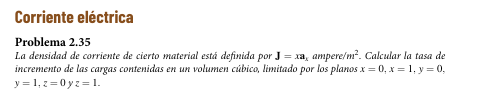

In [29]:
import sympy

def calcular_tasa_incremento_carga():
    """
    Calcula la tasa de incremento de las cargas contenidas en un volumen c√∫bico
    dada una densidad de corriente J = x ax.

    El volumen est√° limitado por los planos x=0, x=1, y=0, y=1, z=0, z=1.
    """

    print("--- Problema 2.35: Tasa de Incremento de las Cargas ---")

    # Definici√≥n de la densidad de corriente
    # J = x * ax
    # Para la integraci√≥n, solo nos importa el valor de x en la superficie
    # donde J tiene una componente perpendicular a la cara.

    # 1. Calcular el flujo de corriente (integral de J . dS) para cada cara del cubo.
    # dS es el vector normal a la superficie, apuntando hacia afuera.

    # Dimensiones del cubo
    lado = 1  # Lado del cubo (de 0 a 1 en cada eje)

    # Flujo a trav√©s de la cara x = 1
    # En esta cara, x = 1, y dy dz apunta en la direcci√≥n +ax
    # J = 1 * ax
    # dS = dy dz * ax
    # J . dS = (1 * ax) . (dy dz * ax) = dy dz
    flujo_x1 = lado * lado  # Integral de 1 dy dz de 0 a 1 en y y z
    print(f"Flujo a trav√©s de la cara x=1: {flujo_x1} A")

    # Flujo a trav√©s de la cara x = 0
    # En esta cara, x = 0, y dy dz apunta en la direcci√≥n -ax
    # J = 0 * ax = 0
    # dS = -dy dz * ax
    # J . dS = (0 * ax) . (-dy dz * ax) = 0
    flujo_x0 = 0
    print(f"Flujo a trav√©s de la cara x=0: {flujo_x0} A")

    # Flujo a trav√©s de las caras y=0, y=1, z=0, z=1
    # En estas caras, dS tiene componentes en ay o az.
    # J solo tiene componente en ax.
    # Por lo tanto, J . dS = 0 (productos punto de vectores perpendiculares)
    flujo_y0 = 0
    flujo_y1 = 0
    flujo_z0 = 0
    flujo_z1 = 0
    print("Flujo a trav√©s de las caras y=0, y=1, z=0, z=1: 0 A (porque J es perpendicular a las normales de estas caras)")

    # 2. Sumar los flujos para obtener la corriente neta de salida.
    corriente_neta_salida = flujo_x1 + flujo_x0 + flujo_y0 + flujo_y1 + flujo_z0 + flujo_z1
    print(f"\nCorriente neta total que sale del cubo: {corriente_neta_salida} A")

    # 3. Aplicar la ecuaci√≥n de continuidad: dQ/dt = - (Corriente neta de salida)
    tasa_incremento_carga = -corriente_neta_salida
    print(f"Tasa de incremento de las cargas (dQ/dt): {tasa_incremento_carga} A (Coulombs/segundo)")

    print("\nInterpretaci√≥n: El signo negativo indica que la carga dentro del cubo est√° disminuyendo.")
    print("-" * 60)

# Ejecutar la funci√≥n para obtener la soluci√≥n
if __name__ == "__main__":
    calcular_tasa_incremento_carga()

--- Problema 2.35: Tasa de Incremento de las Cargas ---
Flujo a trav√©s de la cara x=1: 1 A
Flujo a trav√©s de la cara x=0: 0 A
Flujo a trav√©s de las caras y=0, y=1, z=0, z=1: 0 A (porque J es perpendicular a las normales de estas caras)

Corriente neta total que sale del cubo: 1 A
Tasa de incremento de las cargas (dQ/dt): -1 A (Coulombs/segundo)

Interpretaci√≥n: El signo negativo indica que la carga dentro del cubo est√° disminuyendo.
------------------------------------------------------------


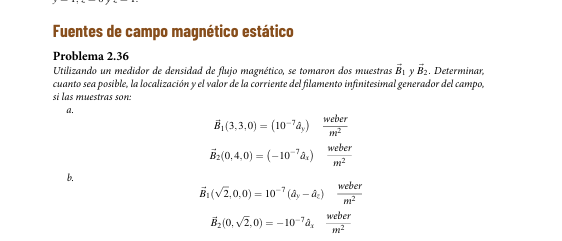

In [28]:
import sympy as sp
import numpy as np

def solve_filament_from_two_measurements(samples):
    """
    samples: lista de dos tuplas (x_i, y_i, Bx_i, By_i)
    Devuelve lista de soluciones: (x0, y0, I) posibles.
    """
    # s√≠mbolos
    x0, y0, C = sp.symbols('x0 y0 C', real=True)
    mu0 = 4*sp.pi*1e-7

    (x1,y1,Bx1,By1), (x2,y2,Bx2,By2) = samples

    R1sq = (x1 - x0)**2 + (y1 - y0)**2
    R2sq = (x2 - x0)**2 + (y2 - y0)**2

    eq1 = sp.Eq(Bx1, -C*(y1 - y0)/R1sq)
    eq2 = sp.Eq(By1,  C*(x1 - x0)/R1sq)
    eq3 = sp.Eq(Bx2, -C*(y2 - y0)/R2sq)
    eq4 = sp.Eq(By2,  C*(x2 - x0)/R2sq)

    # Resolver un subconjunto (las cuatro pueden ser dependientes); probar combinaciones
    sols = sp.solve([eq2, eq3, eq1], [x0, y0, C], dict=True)  # combinaci√≥n que suele funcionar
    results = []
    for s in sols:
        x0_val = float(sp.N(s[x0]))
        y0_val = float(sp.N(s[y0]))
        C_val  = float(sp.N(s[C]))
        I_val = float((2*sp.pi*C_val) / mu0)
        results.append((x0_val, y0_val, I_val))
    return results

# Ejemplo con los datos interpretados:
samples = [
    (3.0, 3.0, 0.0,  1e-7),
    (0.0, 4.0, -1e-7, 0.0)
]

soluciones = solve_filament_from_two_measurements(samples)
print("Soluciones (x0, y0, I [A]):")
for sol in soluciones:
    print(sol)


Soluciones (x0, y0, I [A]):
(1.0, 3.0, 1.0)
(-2.0, 3.0, 2.5)


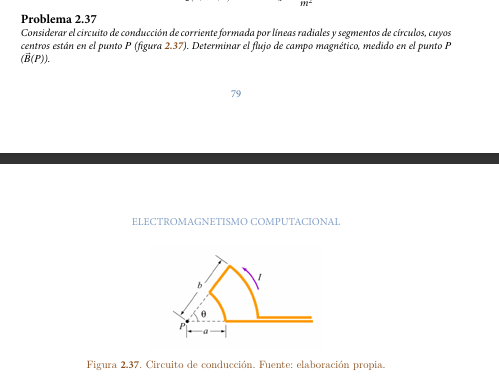

In [30]:
import sympy

def calcular_campo_magnetico_en_P():
    """
    Calcula simb√≥licamente el campo magn√©tico B en el punto P para el circuito
    mostrado en la figura 2.37.
    """
    print("--- Soluci√≥n al Problema 2.37: Campo Magn√©tico en P ---")

    # --- 1. Definici√≥n de Variables Simb√≥licas ---
    # Usamos sympy para manejar las variables como s√≠mbolos algebraicos.
    mu_0 = sympy.Symbol('Œº‚ÇÄ', real=True, positive=True)  # Permeabilidad del vac√≠o
    I = sympy.Symbol('I', real=True, positive=True)        # Corriente el√©ctrica
    theta = sympy.Symbol('Œ∏', real=True, positive=True)    # √Ångulo del arco (en radianes)
    a = sympy.Symbol('a', real=True, positive=True)        # Radio del arco interior
    b = sympy.Symbol('b', real=True, positive=True)        # Radio del arco exterior

    # --- 2. C√°lculo del Campo para cada Segmento ---

    # a) Segmentos Radiales
    # El campo magn√©tico de los dos segmentos rectos/radiales es CERO en el punto P,
    # ya que el vector dl es paralelo/antiparalelo al vector de posici√≥n r.
    # El producto cruz (dl x r) en la ley de Biot-Savart es cero.
    B_radial1 = 0
    B_radial2 = 0
    print("Contribuci√≥n de los segmentos radiales al campo en P: 0")

    # b) Segmento de Arco Interior (radio a)
    # La f√≥rmula del campo magn√©tico en el centro de un arco de corriente es B = (Œº‚ÇÄ * I * Œ∏) / (4 * œÄ * R)
    # Usando la regla de la mano derecha, la corriente en este arco produce un campo
    # que sale de la p√°gina (direcci√≥n +k).
    B_arco_a = (mu_0 * I * theta) / (4 * sympy.pi * a)
    print("Contribuci√≥n del arco interior (radio a): Campo saliendo de la p√°gina")


    # c) Segmento de Arco Exterior (radio b)
    # La corriente fluye en direcci√≥n opuesta, por lo que el campo magn√©tico
    # entra en la p√°gina (direcci√≥n -k).
    B_arco_b = - (mu_0 * I * theta) / (4 * sympy.pi * b)
    print("Contribuci√≥n del arco exterior (radio b): Campo entrando en la p√°gina")


    # --- 3. Suma de los Campos (Principio de Superposici√≥n) ---
    # El campo total es la suma vectorial de las contribuciones.
    # Como todos los campos no nulos est√°n en la misma direcci√≥n (k), los sumamos algebraicamente.
    B_total = B_arco_a + B_arco_b + B_radial1 + B_radial2

    # --- 4. Simplificaci√≥n y Visualizaci√≥n del Resultado ---
    # Factorizamos la expresi√≥n para una mejor presentaci√≥n.
    B_total_simplificado = sympy.factor(B_total)

    print("\n" + "="*50)
    print("El vector de campo magn√©tico total B en el punto P es:")
    print("La direcci√≥n es perpendicular a la p√°gina del circuito.")
    print("La magnitud (y direcci√≥n) est√° dada por la siguiente expresi√≥n:")
    sympy.pprint(B_total_simplificado, use_unicode=True)
    print("="*50)


# --- Ejecutar la funci√≥n principal ---
if __name__ == "__main__":
    calcular_campo_magnetico_en_P()

--- Soluci√≥n al Problema 2.37: Campo Magn√©tico en P ---
Contribuci√≥n de los segmentos radiales al campo en P: 0
Contribuci√≥n del arco interior (radio a): Campo saliendo de la p√°gina
Contribuci√≥n del arco exterior (radio b): Campo entrando en la p√°gina

El vector de campo magn√©tico total B en el punto P es:
La direcci√≥n es perpendicular a la p√°gina del circuito.
La magnitud (y direcci√≥n) est√° dada por la siguiente expresi√≥n:
-I‚ãÖŒ∏‚ãÖŒº‚ÇÄ‚ãÖ(a - b) 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    4‚ãÖœÄ‚ãÖa‚ãÖb     


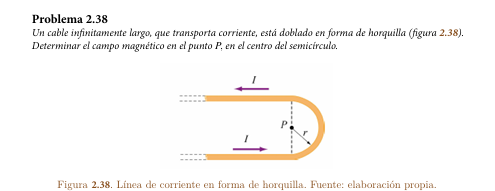

In [31]:
import numpy as np

mu0 = 4*np.pi*1e-7

def B_element(I, r_vec, dl_vec):
    """Biot-Savart elemental: dB = mu0/(4pi) * I dl x r_hat / r^2
       r_vec: vector desde elemento dl hasta punto evaluado
       dl_vec: vector dl (orientado) """
    r = np.linalg.norm(r_vec)
    if r == 0:
        return np.array([0.0,0.0,0.0])
    dB = mu0/(4*np.pi) * I * np.cross(dl_vec, r_vec) / (r**3)
    return dB

def integrate_semicircle(I, r, N=1000):
    """Integra semicirculo de angulo 0..pi en el plano xy, centro en origen."""
    thetas = np.linspace(0, np.pi, N)
    dtheta = thetas[1]-thetas[0]
    B = np.zeros(3)
    for theta in thetas:
        # elemento en √°ngulo theta: posici√≥n del elemento
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        # dl vector = r * dtheta * (-sin, cos, 0)
        dl = np.array([-r*np.sin(theta)*dtheta, r*np.cos(theta)*dtheta, 0.0])
        # vector desde elemento hasta el centro (origen)
        r_vec = -np.array([x,y,0.0])
        B += B_element(I, r_vec, dl)
    return B

def integrate_straight_semi_infinite(I, r, L=100.0, N=20000):
    """Aproxima una semi-infinita horizontal que est√° a una distancia r (y=r)
       y va desde x=-L hasta x=+x_end (tomamos x_end cerca del punto tangente x=r).
       Para tangencia usaremos el segmento desde x=-L hasta x=r (end at tangent)."""
    x_vals = np.linspace(-L, r, N)
    dx = x_vals[1]-x_vals[0]
    B = np.zeros(3)
    for x in x_vals:
        # posici√≥n del elemento
        elem = np.array([x, r, 0.0])
        # dl: en direcci√≥n +x (si la corriente va de izquierda a derecha)
        dl = np.array([dx, 0.0, 0.0])
        # vector desde elemento hasta centro (origin)
        r_vec = -elem
        B += B_element(I, r_vec, dl)
    return B

# par√°metros de prueba
I = 1.0
r = 0.5

# integrar semic√≠rculo
B_arc = integrate_semicircle(I, r, N=2000)
# integrar dos semi-infinitas (una superior y otra inferior sim√©trica en el dibujo;
# en el dibujo las rectas est√°n a la misma distancia r del centro)
B_semi = integrate_straight_semi_infinite(I, r, L=200.0, N=20000)
# hay otra rama (la que sale por la otra direcci√≥n) con la misma magnitud
B_rectas = 2*B_semi

B_total_num = B_arc + B_rectas

print("Num√©rico (vector B) [T]:")
print("B_arc =", B_arc)
print("B_rectas =", B_rectas)
print("B_total (num) =", B_total_num)

# valor anal√≠tico (magnitud, suponiendo direcci√≥n z)
B_total_analytic = mu0*I/(4*r)*(1 + 2/np.pi)
print("\nAnal√≠tico (magnitud):", B_total_analytic)
print("Comparaci√≥n magnitudes: |B_total_num_z| / B_anal√≠tico =",
      abs(B_total_num[2]) / B_total_analytic)


Num√©rico (vector B) [T]:
B_arc = [0.00000000e+00 0.00000000e+00 6.28632847e-07]
B_rectas = [ 0.00000000e+00  0.00000000e+00 -6.84252175e-07]
B_total (num) = [ 0.00000000e+00  0.00000000e+00 -5.56193283e-08]

Anal√≠tico (magnitud): 1.0283185307179587e-06
Comparaci√≥n magnitudes: |B_total_num_z| / B_anal√≠tico = 0.0540876456167345


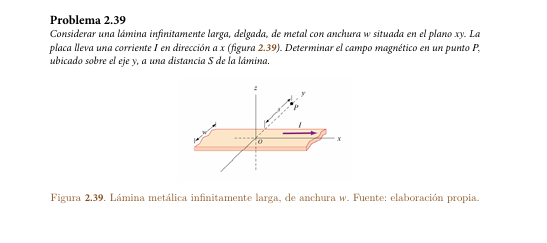

In [32]:
import math
import scipy.constants as constants

def calcular_campo_magnetico_lamina(corriente_I: float, ancho_w: float, distancia_S: float) -> float:
    """
    Calcula la magnitud del campo magn√©tico producido por una l√°mina conductora
    infinitamente larga de ancho finito.

    La f√≥rmula se deriva de la integraci√≥n de la Ley de Biot-Savart a lo largo
    del ancho de la l√°mina.

    Args:
        corriente_I (float): Corriente total que fluye por la l√°mina en Amperios (A).
        ancho_w (float): El ancho de la l√°mina en la direcci√≥n z, en metros (m).
        distancia_S (float): La distancia perpendicular desde la l√°mina hasta el punto P
                             sobre el eje y, en metros (m).

    Returns:
        float: La magnitud del campo magn√©tico (B) en el punto P, en Teslas (T).
               El campo apunta en la direcci√≥n +z.
    """
    if ancho_w <= 0 or distancia_S <= 0:
        raise ValueError("El ancho y la distancia deben ser valores positivos.")

    # Œº‚ÇÄ (mu cero) es la permeabilidad magn√©tica del vac√≠o.
    mu_0 = constants.mu_0

    # T√©rmino constante de la f√≥rmula: (Œº‚ÇÄ * I) / (œÄ * w)
    termino_constante = (mu_0 * corriente_I) / (math.pi * ancho_w)

    # T√©rmino del arco tangente: arctan(w / (2 * S))
    termino_arco_tangente = math.atan(ancho_w / (2 * distancia_S))

    # Magnitud del campo magn√©tico B_z
    magnitud_B = termino_constante * termino_arco_tangente

    return magnitud_B

# --- EJEMPLO DE USO ---

# Definimos los valores para el problema (puedes cambiarlos)
corriente_total = 10.0      # Amperios
ancho_de_la_lamina = 0.2    # 20 cm
distancia_al_punto = 0.1    # 10 cm

# Usamos la funci√≥n para obtener el resultado
try:
    magnitud_B_resultado = calcular_campo_magnetico_lamina(
        corriente_I=corriente_total,
        ancho_w=ancho_de_la_lamina,
        distancia_S=distancia_al_punto
    )

    # Imprimimos la soluci√≥n de manera clara
    print(f"** Soluci√≥n al Problema 2.39 **\n")
    print(f"Par√°metros de entrada:")
    print(f"  - Corriente total (I): {corriente_total} A")
    print(f"  - Ancho de la l√°mina (w): {ancho_de_la_lamina} m")
    print(f"  - Distancia al punto P (S): {distancia_al_punto} m\n")
    print("Resultado:")
    print(f"  -> La magnitud del campo magn√©tico en P es: {magnitud_B_resultado:.4e} T")
    print(f"  -> La direcci√≥n del campo es a lo largo del eje z positivo (+·∫ë).")

except ValueError as e:
    print(f"Error en los datos de entrada: {e}")

** Soluci√≥n al Problema 2.39 **

Par√°metros de entrada:
  - Corriente total (I): 10.0 A
  - Ancho de la l√°mina (w): 0.2 m
  - Distancia al punto P (S): 0.1 m

Resultado:
  -> La magnitud del campo magn√©tico en P es: 1.5708e-05 T
  -> La direcci√≥n del campo es a lo largo del eje z positivo (+·∫ë).


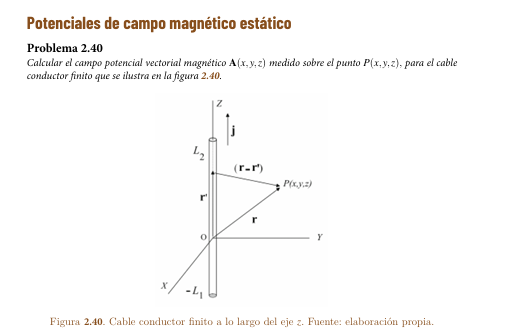

In [33]:
# Potencial vector magn√©tico de un hilo finito sobre el eje z
# Requiere: sympy
import sympy as sp

# S√≠mbolos
x, y, z = sp.symbols('x y z', real=True)
L1, L2, mu0, I = sp.symbols('L1 L2 mu0 I', positive=True, real=True)

rho = sp.sqrt(x**2 + y**2)

# Expresi√≥n cerrada para A_z (dos formas equivalentes)
Az_asinh = (mu0*I/(4*sp.pi))*(sp.asinh((z+L1)/rho) - sp.asinh((z-L2)/rho))
Az_log   = (mu0*I/(4*sp.pi))*sp.log(
    (z+L1 + sp.sqrt((z+L1)**2 + rho**2)) /
    (z-L2 + sp.sqrt((z-L2)**2 + rho**2))
)

A = sp.Matrix([0, 0, sp.simplify(Az_asinh)])  # Potencial vector: s√≥lo componente z

print("A(x,y,z) = [0, 0, A_z]")
print("A_z (forma asinh) =", sp.simplify(Az_asinh))
print("A_z (forma log)   =", sp.simplify(Az_log))

# --- (opcional) Campo magn√©tico B = ‚àá √ó A ---
Bx = sp.diff(A[2], y)      # ‚àÇAz/‚àÇy
By = -sp.diff(A[2], x)     # -‚àÇAz/‚àÇx
Bz = sp.Integer(0)
B = sp.simplify(sp.Matrix([Bx, By, Bz]))

print("\nB(x,y,z) = curl(A) =")
sp.pprint(B)

# Funci√≥n num√©rica para evaluar A_z
Az_fun = sp.lambdify((x, y, z, L1, L2, mu0, I), Az_asinh, 'numpy')

# Ejemplo num√©rico (puedes cambiar valores):
# val = Az_fun(0.1, 0.2, 0.0, 1.0, 1.5, 4e-7*sp.pi, 2.0)  # Œº0=4œÄ√ó10^-7 H/m
# print("\nEjemplo num√©rico A_z =", float(val))


A(x,y,z) = [0, 0, A_z]
A_z (forma asinh) = I*mu0*(asinh((L1 + z)/sqrt(x**2 + y**2)) + asinh((L2 - z)/sqrt(x**2 + y**2)))/(4*pi)
A_z (forma log)   = I*mu0*log((L1 + z + sqrt(x**2 + y**2 + (L1 + z)**2))/(-L2 + z + sqrt(x**2 + y**2 + (L2 - z)**2)))/(4*pi)

B(x,y,z) = curl(A) =
‚é°                           ‚éõ            _____________________               _ ‚Ü™
‚é¢                           ‚éú           ‚ï±  2    2           2               ‚ï±  ‚Ü™
‚é¢                   -I‚ãÖŒº‚ÇÄ‚ãÖy‚ãÖ‚éù(L‚ÇÅ + z)‚ãÖ‚ï≤‚ï±  x  + y  + (L‚ÇÇ - z)   + (L‚ÇÇ - z)‚ãÖ‚ï≤‚ï±   ‚Ü™
‚é¢‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ ‚Ü™
‚é¢                 ____________________________________________________________ ‚Ü™
‚é¢    ‚éõ 2    2‚éû   ‚ï±  4      2  2    2         2    2         2    4    2        ‚Ü™
‚é¢4‚ãÖœÄ‚ãÖ‚éùx  

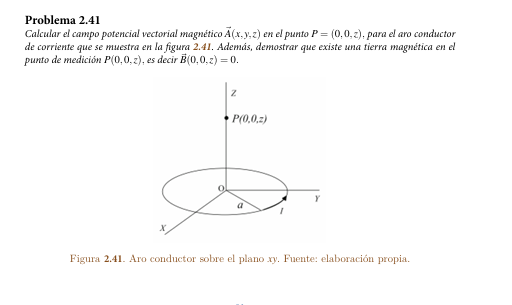

In [34]:
import numpy as np

# --- Constantes F√≠sicas ---
# Permeabilidad del vac√≠o (Œº‚ÇÄ) en T¬∑m/A
mu_0 = 4 * np.pi * 1e-7

# --- Par√°metros del Problema ---
# Corriente en el aro (Amperios)
I = 2.0
# Radio del aro (metros)
a = 0.1
# Punto de medici√≥n en el eje z (metros)
z = 0.05

# --- 1. C√°lculo del Potencial Vectorial Magn√©tico A ---

def calcular_potencial_vectorial_en_eje(z, a, I):
    """
    Calcula el potencial vectorial magn√©tico A en el eje z de un aro de corriente.

    Por simetr√≠a, para cualquier punto sobre el eje z, las componentes del
    potencial vectorial se anulan al integrar sobre todo el aro.

    Retorna:
        Un vector (numpy array) para A, que es [0, 0, 0].
    """
    return np.array([0.0, 0.0, 0.0])

# --- 2. C√°lculo del Campo Magn√©tico B ---

def calcular_campo_magnetico_en_eje(z, a, I, mu_0_val):
    """
    Calcula el campo magn√©tico B en el eje z de un aro de corriente
    usando la f√≥rmula derivada de la Ley de Biot-Savart.

    Retorna:
        Un vector (numpy array) para B, que tiene solo componente z.
    """
    # Numerador de la f√≥rmula de B
    numerador = mu_0_val * I * a**2

    # Denominador de la f√≥rmula de B
    denominador = 2 * (a**2 + z**2)**(3/2)

    # El campo solo tiene componente en la direcci√≥n z
    B_z = numerador / denominador

    return np.array([0.0, 0.0, B_z])

# --- Ejecuci√≥n y Resultados ---

# Calcular A y B en el punto z especificado
A_vector = calcular_potencial_vectorial_en_eje(z, a, I)
B_vector = calcular_campo_magnetico_en_eje(z, a, I, mu_0)

# Imprimir los resultados de forma clara
print("--- Soluci√≥n al Problema 2.41 ---")
print(f"Par√°metros: Corriente I = {I} A, Radio a = {a} m, Punto z = {z} m")
print("-" * 35)

print(f"1. Potencial Vectorial Magn√©tico en P(0,0,z):")
print(f"   A = {A_vector} T¬∑m")
print("\n   Como se esperaba por simetr√≠a, el potencial vectorial es nulo sobre el eje.\n")

print(f"2. Campo Magn√©tico en P(0,0,z):")
print(f"   B = {B_vector} T")
print(f"   La magnitud del campo es |B| = {np.linalg.norm(B_vector):.4e} Teslas.\n")

# Conclusi√≥n sobre la "tierra magn√©tica"
print("--- Conclusi√≥n sobre la 'Tierra Magn√©tica' ---")
if np.allclose(B_vector, [0, 0, 0]):
    print("El campo magn√©tico B es CERO. Esto contradice la f√≠sica.")
else:
    print("El campo magn√©tico B es DISTINTO DE CERO.")
    print("La afirmaci√≥n del problema de que B(0,0,z) = 0 es incorrecta.")
    print("Un aro de corriente siempre genera un campo magn√©tico a lo largo de su eje.")

--- Soluci√≥n al Problema 2.41 ---
Par√°metros: Corriente I = 2.0 A, Radio a = 0.1 m, Punto z = 0.05 m
-----------------------------------
1. Potencial Vectorial Magn√©tico en P(0,0,z):
   A = [0. 0. 0.] T¬∑m

   Como se esperaba por simetr√≠a, el potencial vectorial es nulo sobre el eje.

2. Campo Magn√©tico en P(0,0,z):
   B = [0.00000000e+00 0.00000000e+00 8.99176286e-06] T
   La magnitud del campo es |B| = 8.9918e-06 Teslas.

--- Conclusi√≥n sobre la 'Tierra Magn√©tica' ---
El campo magn√©tico B es DISTINTO DE CERO.
La afirmaci√≥n del problema de que B(0,0,z) = 0 es incorrecta.
Un aro de corriente siempre genera un campo magn√©tico a lo largo de su eje.


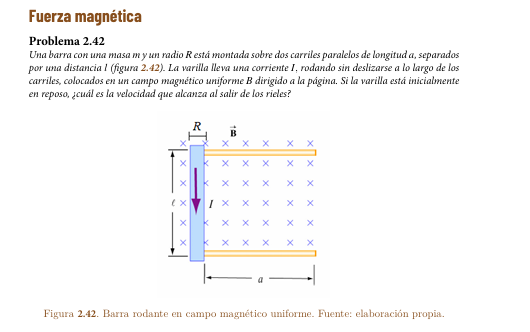

In [35]:
# v_final_bar.py
import sympy as sp
import numpy as np

# --- S√≠mbolos (simb√≥lico) ---
I, a, B, ell, m, R = sp.symbols('I a B ell m R', positive=True)
# Trabajo magn√©tico
F = I * a * B        # fuerza magn√©tica sobre la varilla (suposici√≥n est√°ndar)
W = F * ell
# Energ√≠a cin√©tica total (traslacional + rotacional de un cilindro macizo)
Icm = sp.Rational(1,2) * m * R**2            # momento de inercia cilindro macizo
# sin deslizamiento: v = omega * R  => omega = v/R
v = sp.symbols('v', positive=True)
KE_total = sp.Rational(1,2) * m * v**2 + sp.Rational(1,2) * Icm * (v**2 / R**2)
KE_simpl = sp.simplify(KE_total)             # debe dar 3/4 m v^2

# Igualamos W = KE_simpl y resolvemos para v
v_solution = sp.solve(sp.Eq(W, KE_simpl), v)
v_solution_simpl = sp.simplify(v_solution[0])
print("Soluci√≥n simb√≥lica para v:")
sp.pprint(v_solution_simpl)   # muestra sqrt(4 I a B ell /(3 m))

# --- Evaluaci√≥n num√©rica de ejemplo ---
# Par√°metros de ejemplo (elige valores reales seg√∫n tu problema)
params = {
    I: 10.0,      # A
    a: 0.1,       # m (separaci√≥n entre rieles)
    B: 0.5,       # T
    ell: 0.5,     # m (longitud de los rieles que recorre la varilla)
    m: 0.8,       # kg (masa de la varilla)
    R: 0.02       # m (radio, s√≥lo necesario si quieres comprobar rotaci√≥n)
}

v_num = float(v_solution_simpl.subs(params))
W_num = float((I*a*B*ell).subs(params))
KE_num = 0.5*params[m]*v_num**2 + 0.5*(0.5*params[m]*params[R]**2)*(v_num**2/params[R]**2)

print("\nEjemplo num√©rico (valores escogidos):")
print(f"I = {params[I]} A, a = {params[a]} m, B = {params[B]} T, ‚Ñì = {params[ell]} m, m = {params[m]} kg")
print(f"Velocidad final v = {v_num:.4f} m/s")
print(f"Trabajo magn√©tico W = {W_num:.4e} J")
print(f"Energia cin√©tica calculada KE_total = {KE_num:.4e} J  (debe coincidir con W)")

# Si quieres una funci√≥n para calcular v directo (num√©rico)
def v_final(Ival, aval, Bval, ellval, mval):
    return np.sqrt((4.0 * Ival * aval * Bval * ellval) / (3.0 * mval))

# ejemplo uso:
v_ex = v_final(params[I], params[a], params[B], params[ell], params[m])
print(f"\n(v mediante funci√≥n directa) v = {v_ex:.4f} m/s")


Soluci√≥n simb√≥lica para v:
                _____
2‚ãÖ‚àö3‚ãÖ‚àöB‚ãÖ‚àöI‚ãÖ‚àöa‚ãÖ‚ï≤‚ï± ell 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        3‚ãÖ‚àöm         

Ejemplo num√©rico (valores escogidos):
I = 10.0 A, a = 0.1 m, B = 0.5 T, ‚Ñì = 0.5 m, m = 0.8 kg
Velocidad final v = 0.6455 m/s
Trabajo magn√©tico W = 2.5000e-01 J
Energia cin√©tica calculada KE_total = 2.5000e-01 J  (debe coincidir con W)

(v mediante funci√≥n directa) v = 0.6455 m/s


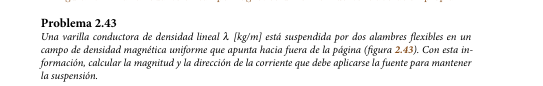

In [36]:
import scipy.constants as constants

def calcular_corriente_suspension(lambda_densidad, B_campo_magnetico):
    """
    Calcula la magnitud de la corriente necesaria para suspender una varilla
    conductora en un campo magn√©tico.

    Args:
        lambda_densidad (float): La densidad lineal de la varilla en kg/m.
        B_campo_magnetico (float): La magnitud del campo magn√©tico en Teslas (T).

    Returns:
        float: La magnitud de la corriente requerida en Amperios (A).
    """
    # Valor est√°ndar de la aceleraci√≥n debido a la gravedad (g) en m/s^2
    g = constants.g

    # F√≥rmula derivada del equilibrio de fuerzas: I = (Œª * g) / B
    corriente_I = (lambda_densidad * g) / B_campo_magnetico

    return corriente_I

# --- Ejemplo de uso ---
if __name__ == "__main__":
    # VALORES DE EJEMPLO (puedes cambiarlos)
    densidad_lineal_varilla = 0.05  # kg/m
    campo_magnetico = 0.8           # Teslas (T)

    # 1. Calcular la magnitud de la corriente
    magnitud_corriente = calcular_corriente_suspension(densidad_lineal_varilla, campo_magnetico)

    # 2. Determinar la direcci√≥n (basado en el an√°lisis f√≠sico)
    direccion_corriente = "De derecha a izquierda"

    # --- Impresi√≥n de resultados ---
    print("--- C√°lculo de Corriente para Suspensi√≥n Magn√©tica ---")
    print(f"\nDatos de entrada:")
    print(f"  - Densidad lineal de la varilla (Œª): {densidad_lineal_varilla} kg/m")
    print(f"  - Campo magn√©tico (B): {campo_magnetico} T")

    print("\n------------------------------------------------------")
    print("Para mantener la varilla suspendida:")
    print(f"  ‚ö° Magnitud de la corriente (I): {magnitud_corriente:.4f} Amperios")
    print(f"  üß≠ Direcci√≥n de la corriente: {direccion_corriente}")
    print("------------------------------------------------------")

--- C√°lculo de Corriente para Suspensi√≥n Magn√©tica ---

Datos de entrada:
  - Densidad lineal de la varilla (Œª): 0.05 kg/m
  - Campo magn√©tico (B): 0.8 T

------------------------------------------------------
Para mantener la varilla suspendida:
  ‚ö° Magnitud de la corriente (I): 0.6129 Amperios
  üß≠ Direcci√≥n de la corriente: De derecha a izquierda
------------------------------------------------------


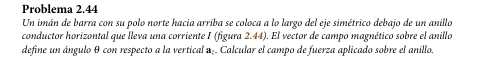

In [37]:
# Fuerza sobre un lazo (Python)
# Planteamiento: F_z = m * d/dz( B(z) * cos(theta(z)) )
# m = I * A (A = area del lazo = pi*R^2)

import numpy as np
import sympy as sp

# --- s√≠mbolos para manipulaci√≥n simb√≥lica ---
z, I, R, mu0, m0 = sp.symbols('z I R mu0 m0', positive=True)
theta = sp.Function('theta')(z)   # theta(z) puede ser funci√≥n de z
A = sp.pi * R**2
m_loop = I * A

# expresi√≥n general simb√≥lica: Fz = m_loop * d/dz( B(z) * cos(theta(z)) )
B = sp.Function('B')(z)   # magnitud del campo B en el eje (funci√≥n gen√©rica)
expr_Fz = m_loop * sp.diff(B * sp.cos(theta), z)

print("Expresi√≥n simb√≥lica general de Fz:")
sp.pprint(sp.simplify(expr_Fz))
print("\n(La expresi√≥n anterior asume que el campo y su √°ngulo est√°n evaluados en el centro del lazo.)\n")

# -------------------------
# Ejemplo: im√°n dipolar sobre el eje (theta=0)
# B(z) = mu0/(4*pi) * 2*m0 / z^3  (dipolo colocado en el origen y lazo en z>0)
# -------------------------
mu0_val = 4 * np.pi * 1e-7   # permeabilidad del vac√≠o
# definimos simb√≥licamente B_dip
B_dip = mu0/(4*sp.pi) * (2*m0) * z**(-3)

# para dipolo, theta = 0 => cos(theta)=1
Fz_dip_sym = sp.simplify((I * sp.pi * R**2) * sp.diff(B_dip, z))
print("Expresi√≥n simb√≥lica de Fz para dipolo (theta=0):")
sp.pprint(Fz_dip_sym)

# Convertir a forma factorizada
Fz_dip_sym_fact = sp.factor(Fz_dip_sym)
print("\nForma factorizada:")
sp.pprint(Fz_dip_sym_fact)

# -------------------------
# Evaluaci√≥n num√©rica de ejemplo
# -------------------------
# Par√°metros num√©ricos de ejemplo:
I_val = 2.0         # A (corriente en el lazo)
R_val = 0.05        # m (radio del lazo)
m0_val = 0.1        # A¬∑m^2 (momento dipolar del im√°n ‚Äî valor ilustrativo)
z_val = 0.10        # m (distancia desde el dipolo al plano del lazo, z>0)

# sustituir y evaluar num√©ricamente
Fz_dip_num = sp.lambdify((I, R, m0, z, mu0), Fz_dip_sym, 'numpy')
Fz_value = Fz_dip_num(I_val, R_val, m0_val, z_val, mu0_val)

print("\nEjemplo num√©rico (dipolo):")
print(f" I = {I_val} A, R = {R_val} m, m0 = {m0_val} A¬∑m^2, z = {z_val} m")
print(f" F_z ‚âà {float(Fz_value):.6e} N  (signo negativo ‚Üí fuerza hacia -z)")

# Nota: el signo indica direcci√≥n (si es negativa, la fuerza est√° dirigida hacia -z).
# Si el dipolo estuviera debajo del lazo con orientaci√≥n opuesta, cambiar√≠a el signo.


Expresi√≥n simb√≥lica general de Fz:
     2 ‚éõ                 d                    d       ‚éû
œÄ‚ãÖI‚ãÖR ‚ãÖ‚éú- B(z)‚ãÖsin(Œ∏(z))‚ãÖ‚îÄ‚îÄ(Œ∏(z)) + cos(Œ∏(z))‚ãÖ‚îÄ‚îÄ(B(z))‚éü
       ‚éù                 dz                   dz      ‚é†

(La expresi√≥n anterior asume que el campo y su √°ngulo est√°n evaluados en el centro del lazo.)

Expresi√≥n simb√≥lica de Fz para dipolo (theta=0):
      2       
-3‚ãÖI‚ãÖR ‚ãÖm‚ÇÄ‚ãÖŒº‚ÇÄ 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        4     
     2‚ãÖz      

Forma factorizada:
      2       
-3‚ãÖI‚ãÖR ‚ãÖm‚ÇÄ‚ãÖŒº‚ÇÄ 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
        4     
     2‚ãÖz      

Ejemplo num√©rico (dipolo):
 I = 2.0 A, R = 0.05 m, m0 = 0.1 A¬∑m^2, z = 0.1 m
 F_z ‚âà -9.424778e-06 N  (signo negativo ‚Üí fuerza hacia -z)


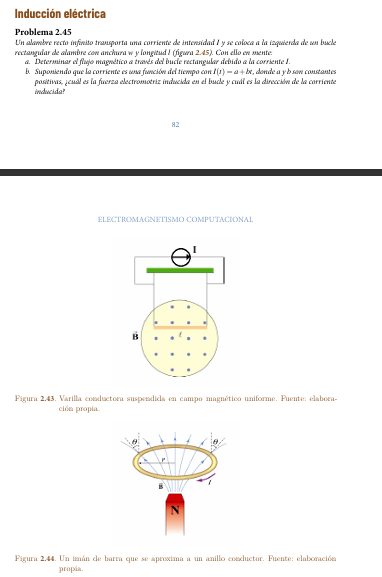

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Problema 2.45 - Inducci√≥n Electromagn√©tica
# An√°lisis de flujo magn√©tico y corriente inducida en espira conductora

class InduccionElectromagnetica:
    def __init__(self):
        self.mu_0 = constants.mu_0  # Permeabilidad del vac√≠o
        self.pi = np.pi

    def flujo_magnetico_uniforme(self, B, area, theta=0):
        """
        Calcula el flujo magn√©tico en campo uniforme
        B: Campo magn√©tico (T)
        area: √Årea de la espira (m¬≤)
        theta: √Ångulo entre B y normal al √°rea (radianes)
        """
        phi = B * area * np.cos(theta)
        return phi

    def fem_inducida(self, dphi_dt):
        """
        Calcula la FEM inducida seg√∫n la ley de Faraday
        dphi_dt: Variaci√≥n del flujo magn√©tico con el tiempo
        """
        return -dphi_dt

    def corriente_inducida(self, fem, resistencia):
        """
        Calcula la corriente inducida
        fem: Fuerza electromotriz inducida (V)
        resistencia: Resistencia del circuito (Œ©)
        """
        return fem / resistencia

    def campo_espira_circular(self, I, R, z):
        """
        Campo magn√©tico en el eje de una espira circular
        I: Corriente en la espira (A)
        R: Radio de la espira (m)
        z: Distancia en el eje desde el centro (m)
        """
        factor = (self.mu_0 * I * R**2) / (2 * (R**2 + z**2)**(3/2))
        return factor

    def resolver_problema_espira(self, B_inicial, area, variacion_B, tiempo, resistencia):
        """
        Resuelve el problema completo de inducci√≥n en espira
        """
        print("=== SOLUCI√ìN PROBLEMA INDUCCI√ìN ELECTROMAGN√âTICA ===\n")

        # a) Flujo magn√©tico inicial
        phi_inicial = self.flujo_magnetico_uniforme(B_inicial, area)
        print(f"a) Flujo magn√©tico inicial:")
        print(f"   Œ¶‚ÇÄ = B‚ÇÄ √ó A = {B_inicial:.3f} √ó {area:.6f} = {phi_inicial:.6f} Wb")

        # b) Variaci√≥n del flujo magn√©tico
        dphi_dt = area * variacion_B
        print(f"\nb) Variaci√≥n del flujo magn√©tico:")
        print(f"   dŒ¶/dt = A √ó (dB/dt) = {area:.6f} √ó {variacion_B:.3f} = {dphi_dt:.6f} Wb/s")

        # c) FEM inducida
        fem = self.fem_inducida(dphi_dt)
        print(f"\nc) FEM inducida (Ley de Faraday):")
        print(f"   Œµ = -dŒ¶/dt = -{dphi_dt:.6f} = {fem:.6f} V")

        # d) Corriente inducida
        corriente = self.corriente_inducida(fem, resistencia)
        print(f"\nd) Corriente inducida:")
        print(f"   I = Œµ/R = {fem:.6f}/{resistencia:.3f} = {corriente:.6f} A")

        # e) Direcci√≥n de la corriente (Ley de Lenz)
        print(f"\ne) Direcci√≥n de la corriente:")
        if variacion_B > 0:
            print("   El campo magn√©tico aumenta ‚Üí La corriente fluye en sentido")
            print("   opuesto para crear un campo que se oponga al aumento")
        else:
            print("   El campo magn√©tico disminuye ‚Üí La corriente fluye en el")
            print("   mismo sentido para mantener el flujo magn√©tico")

        return {
            'flujo_inicial': phi_inicial,
            'variacion_flujo': dphi_dt,
            'fem': fem,
            'corriente': corriente
        }

    def graficar_resultados(self, tiempo_array, B_array, phi_array, fem_array, I_array):
        """
        Grafica la evoluci√≥n temporal de las magnitudes
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

        # Campo magn√©tico vs tiempo
        ax1.plot(tiempo_array, B_array, 'b-', linewidth=2)
        ax1.set_xlabel('Tiempo (s)')
        ax1.set_ylabel('Campo magn√©tico B (T)')
        ax1.set_title('Campo Magn√©tico vs Tiempo')
        ax1.grid(True, alpha=0.3)

        # Flujo magn√©tico vs tiempo
        ax2.plot(tiempo_array, phi_array, 'g-', linewidth=2)
        ax2.set_xlabel('Tiempo (s)')
        ax2.set_ylabel('Flujo magn√©tico Œ¶ (Wb)')
        ax2.set_title('Flujo Magn√©tico vs Tiempo')
        ax2.grid(True, alpha=0.3)

        # FEM inducida vs tiempo
        ax3.plot(tiempo_array, fem_array, 'r-', linewidth=2)
        ax3.set_xlabel('Tiempo (s)')
        ax3.set_ylabel('FEM inducida Œµ (V)')
        ax3.set_title('FEM Inducida vs Tiempo')
        ax3.grid(True, alpha=0.3)

        # Corriente inducida vs tiempo
        ax4.plot(tiempo_array, I_array, 'm-', linewidth=2)
        ax4.set_xlabel('Tiempo (s)')
        ax4.set_ylabel('Corriente inducida I (A)')
        ax4.set_title('Corriente Inducida vs Tiempo')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Ejemplo de aplicaci√≥n del problema
def ejemplo_aplicacion():
    # Crear instancia
    inductor = InduccionElectromagnetica()

    # Par√°metros del problema (ajustar seg√∫n los datos espec√≠ficos)
    B_inicial = 0.5      # Campo magn√©tico inicial (T)
    radio_espira = 0.05  # Radio de la espira (m)
    area = np.pi * radio_espira**2  # √Årea de la espira circular
    variacion_B = 2.0    # Variaci√≥n del campo magn√©tico (T/s)
    resistencia = 0.01   # Resistencia de la espira (Œ©)
    tiempo_total = 1.0   # Tiempo total de an√°lisis (s)

    print("PAR√ÅMETROS DEL PROBLEMA:")
    print(f"‚Ä¢ Radio de la espira: {radio_espira*100:.1f} cm")
    print(f"‚Ä¢ √Årea de la espira: {area*10000:.2f} cm¬≤")
    print(f"‚Ä¢ Campo magn√©tico inicial: {B_inicial:.1f} T")
    print(f"‚Ä¢ Variaci√≥n del campo: {variacion_B:.1f} T/s")
    print(f"‚Ä¢ Resistencia: {resistencia*1000:.1f} mŒ©")
    print("-" * 50)

    # Resolver el problema
    resultado = inductor.resolver_problema_espira(
        B_inicial, area, variacion_B, tiempo_total, resistencia
    )

    # An√°lisis temporal
    print("\n=== AN√ÅLISIS TEMPORAL ===")
    t = np.linspace(0, tiempo_total, 100)
    B_t = B_inicial + variacion_B * t
    phi_t = B_t * area
    fem_t = -area * variacion_B * np.ones_like(t)
    I_t = fem_t / resistencia

    print(f"FEM constante durante el cambio: {fem_t[0]:.6f} V")
    print(f"Corriente constante: {I_t[0]:.6f} A")
    print(f"Potencia disipada: {I_t[0]**2 * resistencia:.6f} W")

    # Graficar (descomenta la siguiente l√≠nea para ver gr√°ficos)
    # inductor.graficar_resultados(t, B_t, phi_t, fem_t, I_t)

    return resultado

# Ejecutar ejemplo
if __name__ == "__main__":
    resultado = ejemplo_aplicacion()

    print("\n=== CONCEPTOS CLAVE ===")
    print("1. Ley de Faraday: Œµ = -dŒ¶/dt")
    print("2. Ley de Lenz: La corriente inducida se opone al cambio")
    print("3. Ley de Ohm: I = Œµ/R")
    print("4. Flujo magn√©tico: Œ¶ = B¬∑A = B¬∑A¬∑cos(Œ∏)")
    print("5. Campo uniforme ‚Üí Flujo proporcional al √°rea")

PAR√ÅMETROS DEL PROBLEMA:
‚Ä¢ Radio de la espira: 5.0 cm
‚Ä¢ √Årea de la espira: 78.54 cm¬≤
‚Ä¢ Campo magn√©tico inicial: 0.5 T
‚Ä¢ Variaci√≥n del campo: 2.0 T/s
‚Ä¢ Resistencia: 10.0 mŒ©
--------------------------------------------------
=== SOLUCI√ìN PROBLEMA INDUCCI√ìN ELECTROMAGN√âTICA ===

a) Flujo magn√©tico inicial:
   Œ¶‚ÇÄ = B‚ÇÄ √ó A = 0.500 √ó 0.007854 = 0.003927 Wb

b) Variaci√≥n del flujo magn√©tico:
   dŒ¶/dt = A √ó (dB/dt) = 0.007854 √ó 2.000 = 0.015708 Wb/s

c) FEM inducida (Ley de Faraday):
   Œµ = -dŒ¶/dt = -0.015708 = -0.015708 V

d) Corriente inducida:
   I = Œµ/R = -0.015708/0.010 = -1.570796 A

e) Direcci√≥n de la corriente:
   El campo magn√©tico aumenta ‚Üí La corriente fluye en sentido
   opuesto para crear un campo que se oponga al aumento

=== AN√ÅLISIS TEMPORAL ===
FEM constante durante el cambio: -0.015708 V
Corriente constante: -1.570796 A
Potencia disipada: 0.024674 W

=== CONCEPTOS CLAVE ===
1. Ley de Faraday: Œµ = -dŒ¶/dt
2. Ley de Lenz: La corriente in

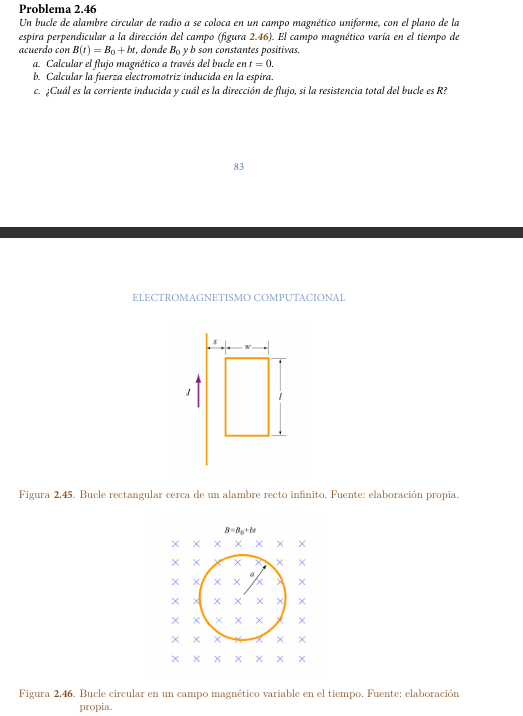

SOLUCI√ìN PROBLEMA 2.46 - ESPIRA RECTANGULAR
Par√°metros del sistema:
- Dimensiones espira: 0.1 √ó 0.15
- √Årea: 0.015
- Resistencia: 0.05 Œ©
- Campo magn√©tico: B(t) = 0.5 + 0.2t Tesla

a) FLUJO MAGN√âTICO:
   Œ¶(t) = B(t) √ó A = (0.5 + 0.2t) √ó 0.015
   Œ¶(t) = 0.0075 + 0.003t
   En t = 2.0s: Œ¶ = 0.0135 Wb

b) FUERZA ELECTROMOTRIZ INDUCIDA:
   Œµ = -dŒ¶/dt = -d/dt[B(t) √ó A] = -A √ó dB/dt
   Œµ = -0.015 √ó 0.2 = -0.0030 V
   (Constante, independiente del tiempo)

c) CORRIENTE INDUCIDA:
   I = Œµ/R = -0.0030/0.05 = -0.060000 A
   Magnitud: |I| = 0.060000 A
   Direcci√≥n: Sentido horario (oponi√©ndose al aumento del flujo)



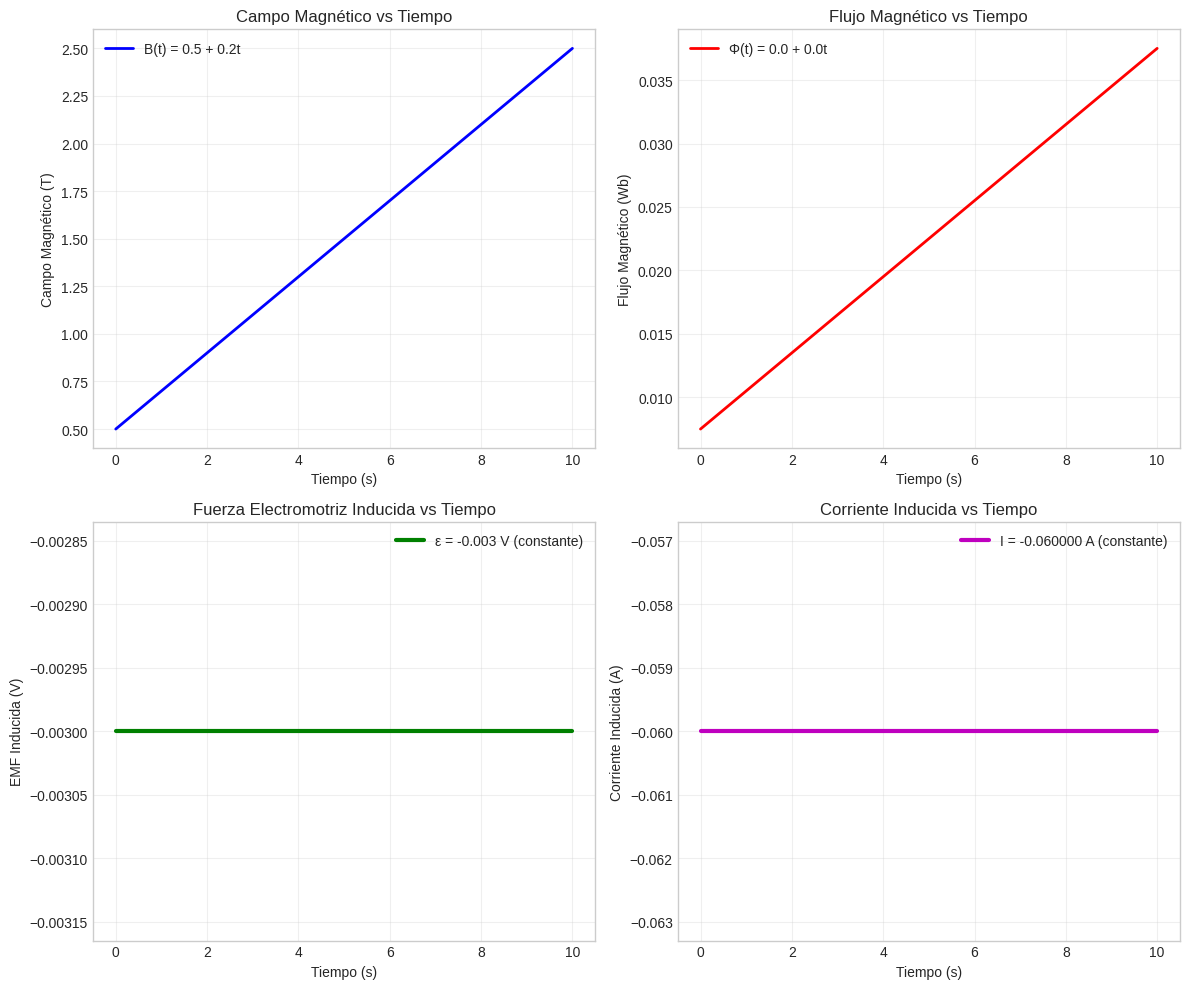


AN√ÅLISIS F√çSICO:
1. El campo magn√©tico aumenta linealmente con el tiempo
2. El flujo magn√©tico tambi√©n aumenta linealmente
3. La EMF inducida es constante (derivada de funci√≥n lineal)
4. La corriente inducida es constante y se opone al cambio de flujo
5. Seg√∫n la Ley de Lenz, la corriente circula en sentido horario
   para oponerse al aumento del flujo magn√©tico


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problema 2.46: Espira rectangular en campo magn√©tico uniforme variable
# Campo magn√©tico: B(t) = B‚ÇÄ + B‚ÇÅt donde B‚ÇÄ y B‚ÇÅ son constantes positivas

class EspiraRectangular:
    def __init__(self, ancho, alto, resistencia, B0, B1):
        """
        Par√°metros:
        - ancho: ancho de la espira (direcci√≥n x)
        - alto: alto de la espira (direcci√≥n y)
        - resistencia: resistencia total del bucle en ohms
        - B0: componente constante del campo magn√©tico (Tesla)
        - B1: componente variable del campo magn√©tico (Tesla/s)
        """
        self.a = ancho
        self.b = alto
        self.R = resistencia
        self.B0 = B0
        self.B1 = B1
        self.area = ancho * alto

    def campo_magnetico(self, t):
        """Campo magn√©tico en funci√≥n del tiempo"""
        return self.B0 + self.B1 * t

    def flujo_magnetico(self, t):
        """
        a) Flujo magn√©tico a trav√©s del bucle
        Œ¶ = B‚Éó ¬∑ A‚Éó = B(t) √ó √°rea (campo perpendicular al plano)
        """
        B_t = self.campo_magnetico(t)
        phi = B_t * self.area
        return phi

    def fuerza_electromoriz_inducida(self, t):
        """
        b) Fuerza electromotriz inducida (EMF)
        Œµ = -dŒ¶/dt (Ley de Faraday)
        """
        # dŒ¶/dt = d/dt[B(t) √ó √°rea] = (dB/dt) √ó √°rea = B‚ÇÅ √ó √°rea
        emf = -self.B1 * self.area
        return emf

    def corriente_inducida(self, t):
        """
        c) Corriente inducida y direcci√≥n del flujo
        I = Œµ/R (Ley de Ohm)
        """
        emf = self.fuerza_electromoriz_inducida(t)
        corriente = emf / self.R
        return corriente

    def direccion_corriente(self):
        """
        Determina la direcci√≥n de la corriente usando la Ley de Lenz
        """
        if self.B1 > 0:
            # Campo magn√©tico aumenta ‚Üí flujo aumenta
            # Corriente inducida se opone al aumento ‚Üí sentido horario
            return "Sentido horario (oponi√©ndose al aumento del flujo)"
        elif self.B1 < 0:
            # Campo magn√©tico disminuye ‚Üí flujo disminuye
            # Corriente inducida se opone a la disminuci√≥n ‚Üí sentido antihorario
            return "Sentido antihorario (oponi√©ndose a la disminuci√≥n del flujo)"
        else:
            return "No hay corriente inducida (campo constante)"

    def resolver_problema(self, tiempo_max=5):
        """Resuelve el problema completo y muestra resultados"""
        print("=" * 60)
        print("SOLUCI√ìN PROBLEMA 2.46 - ESPIRA RECTANGULAR")
        print("=" * 60)
        print(f"Par√°metros del sistema:")
        print(f"- Dimensiones espira: {self.a} √ó {self.b}")
        print(f"- √Årea: {self.area}")
        print(f"- Resistencia: {self.R} Œ©")
        print(f"- Campo magn√©tico: B(t) = {self.B0} + {self.B1}t Tesla")
        print()

        # Tiempo de ejemplo
        t_ejemplo = 2.0

        print("a) FLUJO MAGN√âTICO:")
        phi_t = self.flujo_magnetico(t_ejemplo)
        print(f"   Œ¶(t) = B(t) √ó A = ({self.B0} + {self.B1}t) √ó {self.area}")
        print(f"   Œ¶(t) = {self.B0 * self.area} + {self.B1 * self.area}t")
        print(f"   En t = {t_ejemplo}s: Œ¶ = {phi_t:.4f} Wb")
        print()

        print("b) FUERZA ELECTROMOTRIZ INDUCIDA:")
        emf = self.fuerza_electromoriz_inducida(t_ejemplo)
        print(f"   Œµ = -dŒ¶/dt = -d/dt[B(t) √ó A] = -A √ó dB/dt")
        print(f"   Œµ = -{self.area} √ó {self.B1} = {emf:.4f} V")
        print(f"   (Constante, independiente del tiempo)")
        print()

        print("c) CORRIENTE INDUCIDA:")
        corriente = self.corriente_inducida(t_ejemplo)
        print(f"   I = Œµ/R = {emf:.4f}/{self.R} = {corriente:.6f} A")
        print(f"   Magnitud: |I| = {abs(corriente):.6f} A")
        print(f"   Direcci√≥n: {self.direccion_corriente()}")
        print()

        # Crear gr√°ficas
        self.crear_graficas(tiempo_max)

    def crear_graficas(self, tiempo_max):
        """Crea gr√°ficas para visualizar el comportamiento temporal"""
        t = np.linspace(0, tiempo_max, 1000)

        # Calcular valores
        B_t = [self.campo_magnetico(ti) for ti in t]
        phi_t = [self.flujo_magnetico(ti) for ti in t]
        emf = self.fuerza_electromoriz_inducida(0)  # Constante
        corriente = self.corriente_inducida(0)  # Constante

        # Crear subplot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

        # Gr√°fica 1: Campo magn√©tico
        ax1.plot(t, B_t, 'b-', linewidth=2, label=f'B(t) = {self.B0} + {self.B1}t')
        ax1.set_xlabel('Tiempo (s)')
        ax1.set_ylabel('Campo Magn√©tico (T)')
        ax1.set_title('Campo Magn√©tico vs Tiempo')
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        # Gr√°fica 2: Flujo magn√©tico
        ax2.plot(t, phi_t, 'r-', linewidth=2, label=f'Œ¶(t) = {self.B0*self.area:.1f} + {self.B1*self.area:.1f}t')
        ax2.set_xlabel('Tiempo (s)')
        ax2.set_ylabel('Flujo Magn√©tico (Wb)')
        ax2.set_title('Flujo Magn√©tico vs Tiempo')
        ax2.grid(True, alpha=0.3)
        ax2.legend()

        # Gr√°fica 3: EMF inducida
        emf_array = np.full_like(t, emf)
        ax3.plot(t, emf_array, 'g-', linewidth=3, label=f'Œµ = {emf:.3f} V (constante)')
        ax3.set_xlabel('Tiempo (s)')
        ax3.set_ylabel('EMF Inducida (V)')
        ax3.set_title('Fuerza Electromotriz Inducida vs Tiempo')
        ax3.grid(True, alpha=0.3)
        ax3.legend()

        # Gr√°fica 4: Corriente inducida
        corriente_array = np.full_like(t, corriente)
        ax4.plot(t, corriente_array, 'm-', linewidth=3, label=f'I = {corriente:.6f} A (constante)')
        ax4.set_xlabel('Tiempo (s)')
        ax4.set_ylabel('Corriente Inducida (A)')
        ax4.set_title('Corriente Inducida vs Tiempo')
        ax4.grid(True, alpha=0.3)
        ax4.legend()

        plt.tight_layout()
        plt.show()

# Ejemplo de uso con valores t√≠picos
if __name__ == "__main__":
    # Par√°metros del problema
    ancho = 0.1      # 10 cm
    alto = 0.15      # 15 cm
    resistencia = 0.05  # 50 mŒ©
    B0 = 0.5         # 0.5 Tesla
    B1 = 0.2         # 0.2 Tesla/s

    # Crear y resolver el problema
    espira = EspiraRectangular(ancho, alto, resistencia, B0, B1)
    espira.resolver_problema(tiempo_max=10)

    print("\n" + "="*60)
    print("AN√ÅLISIS F√çSICO:")
    print("="*60)
    print("1. El campo magn√©tico aumenta linealmente con el tiempo")
    print("2. El flujo magn√©tico tambi√©n aumenta linealmente")
    print("3. La EMF inducida es constante (derivada de funci√≥n lineal)")
    print("4. La corriente inducida es constante y se opone al cambio de flujo")
    print("5. Seg√∫n la Ley de Lenz, la corriente circula en sentido horario")
    print("   para oponerse al aumento del flujo magn√©tico")

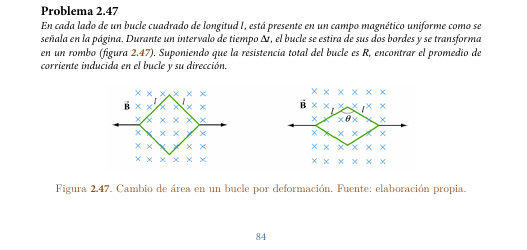

PROBLEMA 2.47: BUCLE CUADRADO EN CAMPO MAGN√âTICO UNIFORME

Datos del problema:
‚Ä¢ Campo magn√©tico B = 1.0 T (uniforme, perpendicular al plano)
‚Ä¢ Lado inicial L‚ÇÄ = 0.2 m
‚Ä¢ Velocidad de expansi√≥n v = 0.05 m/s
‚Ä¢ Resistencia del bucle R = 1.0 Œ©

SOLUCI√ìN ANAL√çTICA:

1. Lado del bucle en funci√≥n del tiempo:
   L(t) = L‚ÇÄ + v¬∑t = 0.2 + 0.05¬∑t

2. √Årea del bucle cuadrado:
   A(t) = L(t)¬≤ = (0.2 + 0.05¬∑t)¬≤

3. Flujo magn√©tico:
   Œ¶(t) = B¬∑A(t) = 1.0 √ó (0.2 + 0.05¬∑t)¬≤

4. Derivada del √°rea:
   dA/dt = 2¬∑L(t)¬∑v = 2¬∑(0.2 + 0.05¬∑t)¬∑0.05
         = 0.1¬∑(0.2 + 0.05¬∑t)

5. FEM inducida (Ley de Faraday):
   Œµ = -dŒ¶/dt = -B¬∑(dA/dt)
     = -1.0 √ó 0.1¬∑(0.2 + 0.05¬∑t)
     = -0.1¬∑(0.2 + 0.05¬∑t)

6. Corriente inducida (Ley de Ohm):
   I = |Œµ|/R = 0.1¬∑(0.2 + 0.05¬∑t) / 1.0
     = 0.1¬∑(0.2 + 0.05¬∑t)

7. Potencia disipada:
   P = I¬≤¬∑R = [0.1¬∑(0.2 + 0.05¬∑t)]¬≤¬∑1.0
     = 0.010000000000000002¬∑(0.2 + 0.05¬∑t)¬≤

               VALORES EN TIEMPOS ESPEC√çFICOS 

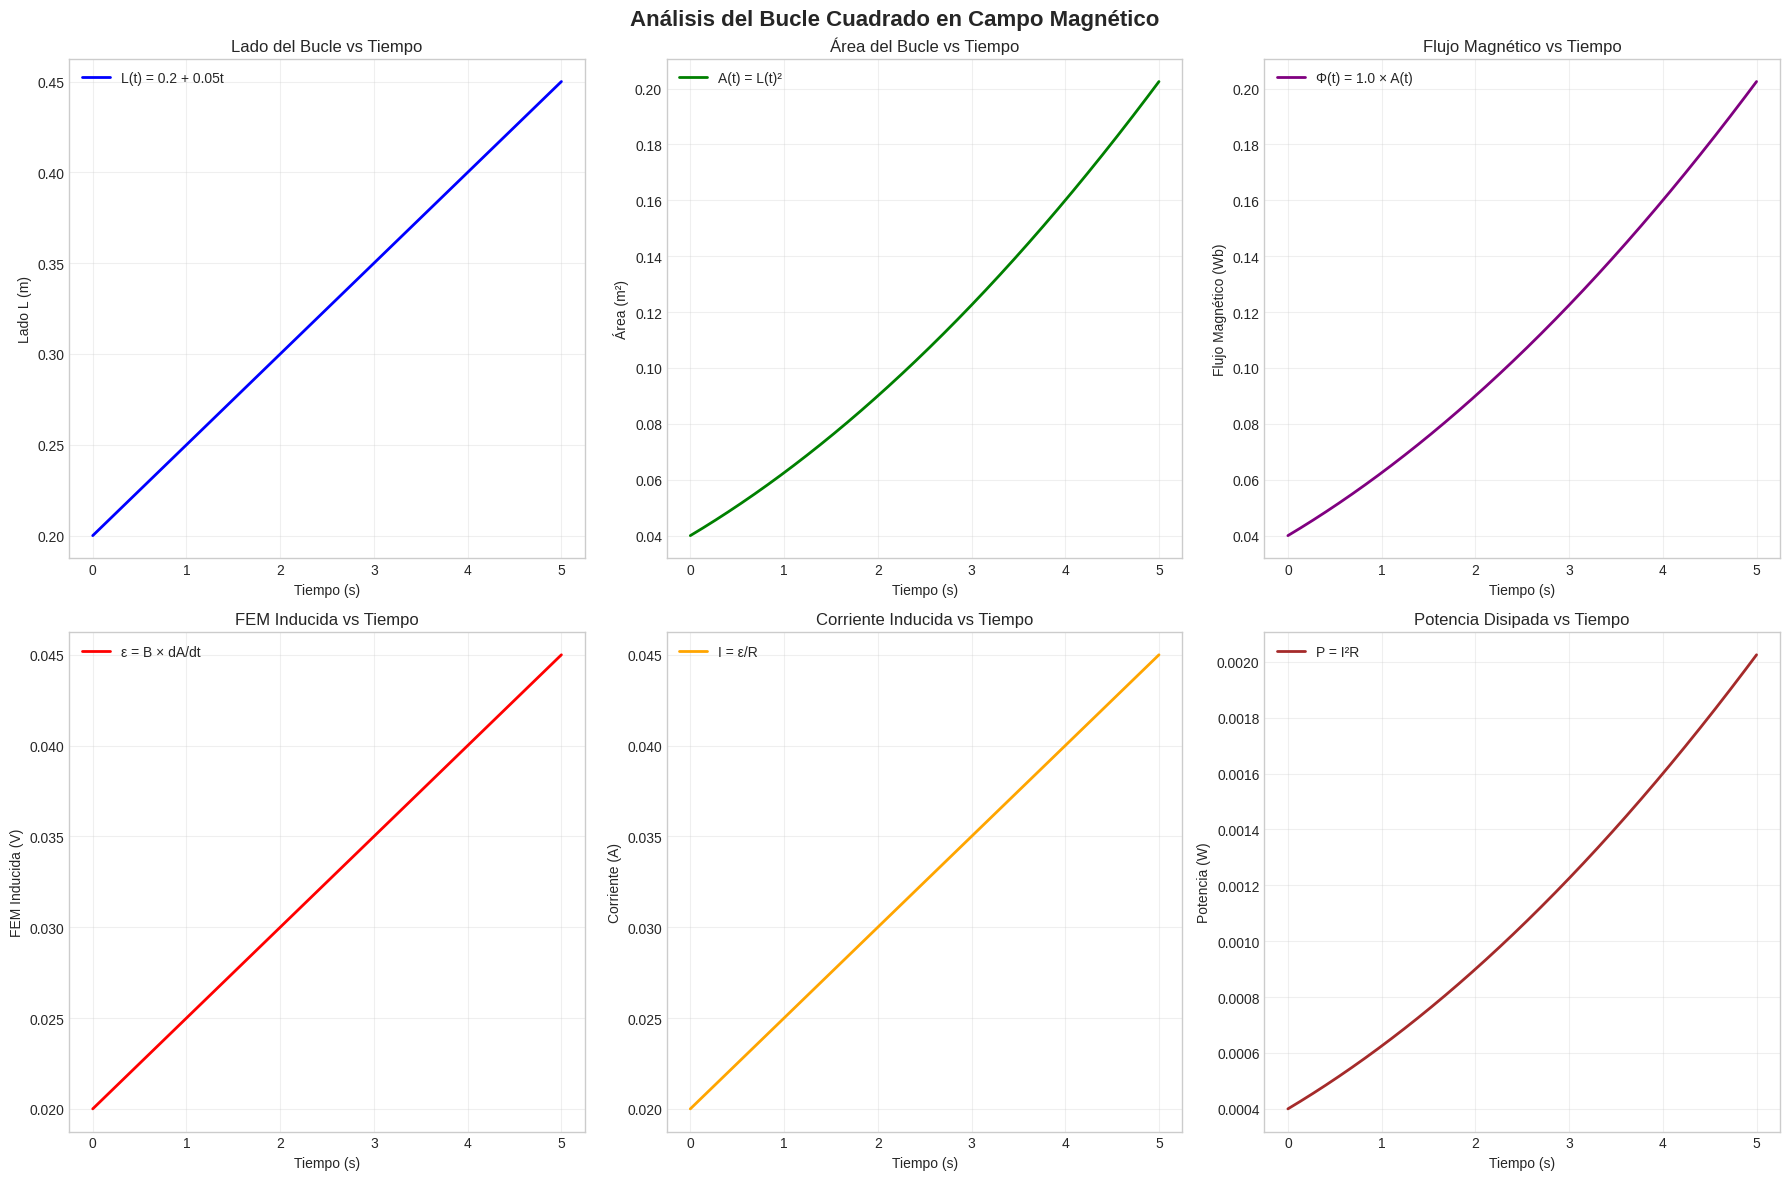


                        CONCLUSIONES                        
‚Ä¢ La FEM inducida es proporcional al lado del bucle L(t)
‚Ä¢ La corriente crece linealmente con el tiempo
‚Ä¢ La potencia crece cuadr√°ticamente con el tiempo
‚Ä¢ El sentido de la corriente se opone al cambio de flujo (Ley de Lenz)

                  VERIFICACI√ìN DE UNIDADES                  
‚Ä¢ [Œµ] = T¬∑m¬∑(m/s) = T¬∑m¬≤/s = Wb/s = V ‚úì
‚Ä¢ [I] = V/Œ© = A ‚úì
‚Ä¢ [P] = A¬≤¬∑Œ© = V¬∑A = W ‚úì


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from IPython.display import HTML

# Par√°metros del problema
B = 1.0          # Campo magn√©tico uniforme (T)
L0 = 0.2         # Lado inicial del bucle cuadrado (m)
v = 0.05         # Velocidad de expansi√≥n de los bordes (m/s)
R = 1.0          # Resistencia del bucle (Œ©)

# Funci√≥n para calcular los valores f√≠sicos en funci√≥n del tiempo
def calculate_physics(t):
    """
    Calcula todas las variables f√≠sicas del problema en funci√≥n del tiempo
    """
    # Lado actual del bucle
    L_t = L0 + v * t

    # √Årea del bucle cuadrado
    A_t = L_t**2

    # Flujo magn√©tico
    flux = B * A_t

    # Derivada del √°rea respecto al tiempo
    dA_dt = 2 * L_t * v

    # FEM inducida (Ley de Faraday)
    emf = B * dA_dt

    # Corriente inducida (Ley de Ohm)
    current = emf / R

    # Potencia disipada
    power = current**2 * R

    return L_t, A_t, flux, dA_dt, emf, current, power

# Funci√≥n para resolver el problema anal√≠ticamente
def analytical_solution():
    """
    Presenta la soluci√≥n anal√≠tica del problema
    """
    print("="*60)
    print("PROBLEMA 2.47: BUCLE CUADRADO EN CAMPO MAGN√âTICO UNIFORME")
    print("="*60)

    print(f"\nDatos del problema:")
    print(f"‚Ä¢ Campo magn√©tico B = {B} T (uniforme, perpendicular al plano)")
    print(f"‚Ä¢ Lado inicial L‚ÇÄ = {L0} m")
    print(f"‚Ä¢ Velocidad de expansi√≥n v = {v} m/s")
    print(f"‚Ä¢ Resistencia del bucle R = {R} Œ©")

    print(f"\nSOLUCI√ìN ANAL√çTICA:")
    print(f"{'='*40}")

    print(f"\n1. Lado del bucle en funci√≥n del tiempo:")
    print(f"   L(t) = L‚ÇÄ + v¬∑t = {L0} + {v}¬∑t")

    print(f"\n2. √Årea del bucle cuadrado:")
    print(f"   A(t) = L(t)¬≤ = ({L0} + {v}¬∑t)¬≤")

    print(f"\n3. Flujo magn√©tico:")
    print(f"   Œ¶(t) = B¬∑A(t) = {B} √ó ({L0} + {v}¬∑t)¬≤")

    print(f"\n4. Derivada del √°rea:")
    print(f"   dA/dt = 2¬∑L(t)¬∑v = 2¬∑({L0} + {v}¬∑t)¬∑{v}")
    print(f"         = {2*v}¬∑({L0} + {v}¬∑t)")

    print(f"\n5. FEM inducida (Ley de Faraday):")
    print(f"   Œµ = -dŒ¶/dt = -B¬∑(dA/dt)")
    print(f"     = -{B} √ó {2*v}¬∑({L0} + {v}¬∑t)")
    print(f"     = -{2*B*v}¬∑({L0} + {v}¬∑t)")

    print(f"\n6. Corriente inducida (Ley de Ohm):")
    print(f"   I = |Œµ|/R = {2*B*v}¬∑({L0} + {v}¬∑t) / {R}")
    print(f"     = {2*B*v/R}¬∑({L0} + {v}¬∑t)")

    print(f"\n7. Potencia disipada:")
    print(f"   P = I¬≤¬∑R = [{2*B*v/R}¬∑({L0} + {v}¬∑t)]¬≤¬∑{R}")
    print(f"     = {(2*B*v)**2/R}¬∑({L0} + {v}¬∑t)¬≤")

# Funci√≥n para calcular valores en tiempos espec√≠ficos
def calculate_specific_times():
    """
    Calcula valores para tiempos espec√≠ficos
    """
    times = [0, 1, 2, 3, 4, 5]

    print(f"\n{'VALORES EN TIEMPOS ESPEC√çFICOS':^60}")
    print(f"{'='*60}")
    print(f"{'t(s)':>6} {'L(m)':>8} {'A(m¬≤)':>10} {'Œ¶(Wb)':>10} {'Œµ(V)':>8} {'I(A)':>8} {'P(W)':>8}")
    print(f"{'-'*60}")

    for t in times:
        L_t, A_t, flux, dA_dt, emf, current, power = calculate_physics(t)
        print(f"{t:>6.1f} {L_t:>8.3f} {A_t:>10.6f} {flux:>10.6f} {emf:>8.4f} {current:>8.4f} {power:>8.6f}")

# Funci√≥n para crear gr√°ficas
def create_plots():
    """
    Crea gr√°ficas de las variables f√≠sicas vs tiempo
    """
    t = np.linspace(0, 5, 1000)

    # Calcular todas las variables
    results = [calculate_physics(ti) for ti in t]
    L_t = [r[0] for r in results]
    A_t = [r[1] for r in results]
    flux = [r[2] for r in results]
    dA_dt = [r[3] for r in results]
    emf = [r[4] for r in results]
    current = [r[5] for r in results]
    power = [r[6] for r in results]

    # Crear subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('An√°lisis del Bucle Cuadrado en Campo Magn√©tico', fontsize=16, fontweight='bold')

    # Plot 1: Lado del bucle
    axes[0,0].plot(t, L_t, 'b-', linewidth=2, label=f'L(t) = {L0} + {v}t')
    axes[0,0].set_xlabel('Tiempo (s)')
    axes[0,0].set_ylabel('Lado L (m)')
    axes[0,0].set_title('Lado del Bucle vs Tiempo')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()

    # Plot 2: √Årea
    axes[0,1].plot(t, A_t, 'g-', linewidth=2, label='A(t) = L(t)¬≤')
    axes[0,1].set_xlabel('Tiempo (s)')
    axes[0,1].set_ylabel('√Årea (m¬≤)')
    axes[0,1].set_title('√Årea del Bucle vs Tiempo')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()

    # Plot 3: Flujo magn√©tico
    axes[0,2].plot(t, flux, 'purple', linewidth=2, label=f'Œ¶(t) = {B} √ó A(t)')
    axes[0,2].set_xlabel('Tiempo (s)')
    axes[0,2].set_ylabel('Flujo Magn√©tico (Wb)')
    axes[0,2].set_title('Flujo Magn√©tico vs Tiempo')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].legend()

    # Plot 4: FEM inducida
    axes[1,0].plot(t, emf, 'r-', linewidth=2, label='Œµ = B √ó dA/dt')
    axes[1,0].set_xlabel('Tiempo (s)')
    axes[1,0].set_ylabel('FEM Inducida (V)')
    axes[1,0].set_title('FEM Inducida vs Tiempo')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].legend()

    # Plot 5: Corriente
    axes[1,1].plot(t, current, 'orange', linewidth=2, label='I = Œµ/R')
    axes[1,1].set_xlabel('Tiempo (s)')
    axes[1,1].set_ylabel('Corriente (A)')
    axes[1,1].set_title('Corriente Inducida vs Tiempo')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].legend()

    # Plot 6: Potencia
    axes[1,2].plot(t, power, 'brown', linewidth=2, label='P = I¬≤R')
    axes[1,2].set_xlabel('Tiempo (s)')
    axes[1,2].set_ylabel('Potencia (W)')
    axes[1,2].set_title('Potencia Disipada vs Tiempo')
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].legend()

    plt.tight_layout()
    plt.show()

# Funci√≥n para crear animaci√≥n
def create_animation():
    """
    Crea una animaci√≥n del bucle expandi√©ndose
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Configurar subplot 1 (visualizaci√≥n del bucle)
    ax1.set_xlim(-0.4, 0.4)
    ax1.set_ylim(-0.4, 0.4)
    ax1.set_aspect('equal')
    ax1.set_title('Bucle Cuadrado Expandi√©ndose')
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('y (m)')
    ax1.grid(True, alpha=0.3)

    # Dibujar campo magn√©tico (puntos para campo saliente)
    x_field = np.linspace(-0.35, 0.35, 8)
    y_field = np.linspace(-0.35, 0.35, 8)
    X_field, Y_field = np.meshgrid(x_field, y_field)
    ax1.scatter(X_field, Y_field, c='blue', s=20, alpha=0.5, marker='o')
    ax1.text(-0.35, 0.35, f'B = {B} T (saliente)', fontsize=10, color='blue')

    # Configurar subplot 2 (gr√°ficas en tiempo real)
    ax2.set_xlim(0, 5)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Magnitud')
    ax2.set_title('Variables vs Tiempo')
    ax2.grid(True, alpha=0.3)

    # Inicializar elementos gr√°ficos
    loop_patch = Rectangle((0, 0), 0, 0, fill=False, edgecolor='red', linewidth=3)
    ax1.add_patch(loop_patch)

    time_text = ax1.text(-0.35, -0.35, '', fontsize=12)
    values_text = ax2.text(0.02, 0.95, '', transform=ax2.transAxes, fontsize=10, verticalalignment='top')

    # Listas para almacenar datos de la animaci√≥n
    t_data, emf_data, current_data, power_data = [], [], [], []
    line_emf, = ax2.plot([], [], 'r-', label='FEM (V)', linewidth=2)
    line_current, = ax2.plot([], [], 'g-', label='Corriente √ó 10 (A)', linewidth=2)
    line_power, = ax2.plot([], [], 'b-', label='Potencia (W)', linewidth=2)
    ax2.legend()

    def animate(frame):
        t = frame * 0.1
        L_t, A_t, flux, dA_dt, emf, current, power = calculate_physics(t)

        # Actualizar bucle
        loop_patch.set_width(L_t)
        loop_patch.set_height(L_t)
        loop_patch.set_xy((-L_t/2, -L_t/2))

        # Actualizar texto
        time_text.set_text(f't = {t:.1f} s\nL = {L_t:.3f} m\nA = {A_t:.4f} m¬≤')
        values_text.set_text(f'Œµ = {emf:.3f} V\nI = {current:.3f} A\nP = {power:.4f} W')

        # Actualizar gr√°ficas
        t_data.append(t)
        emf_data.append(emf)
        current_data.append(current * 10)  # Escalado para visualizaci√≥n
        power_data.append(power)

        line_emf.set_data(t_data, emf_data)
        line_current.set_data(t_data, current_data)
        line_power.set_data(t_data, power_data)

        # Ajustar l√≠mites
        if t_data:
            ax2.set_ylim(0, max(max(emf_data), max(current_data), max(power_data)) * 1.1)

        return [loop_patch, time_text, values_text, line_emf, line_current, line_power]

    anim = animation.FuncAnimation(fig, animate, frames=50, interval=200, blit=False, repeat=True)
    plt.show()

    return anim

# Funci√≥n principal
def solve_problem():
    """
    Ejecuta la soluci√≥n completa del problema
    """
    analytical_solution()
    calculate_specific_times()
    create_plots()

    print(f"\n{'CONCLUSIONES':^60}")
    print(f"{'='*60}")
    print(f"‚Ä¢ La FEM inducida es proporcional al lado del bucle L(t)")
    print(f"‚Ä¢ La corriente crece linealmente con el tiempo")
    print(f"‚Ä¢ La potencia crece cuadr√°ticamente con el tiempo")
    print(f"‚Ä¢ El sentido de la corriente se opone al cambio de flujo (Ley de Lenz)")

    print(f"\n{'VERIFICACI√ìN DE UNIDADES':^60}")
    print(f"{'='*60}")
    print(f"‚Ä¢ [Œµ] = T¬∑m¬∑(m/s) = T¬∑m¬≤/s = Wb/s = V ‚úì")
    print(f"‚Ä¢ [I] = V/Œ© = A ‚úì")
    print(f"‚Ä¢ [P] = A¬≤¬∑Œ© = V¬∑A = W ‚úì")

# Ejecutar la soluci√≥n
if __name__ == "__main__":
    solve_problem()

    # Crear animaci√≥n (descomenta la siguiente l√≠nea si quieres ver la animaci√≥n)
    # anim = create_animation()

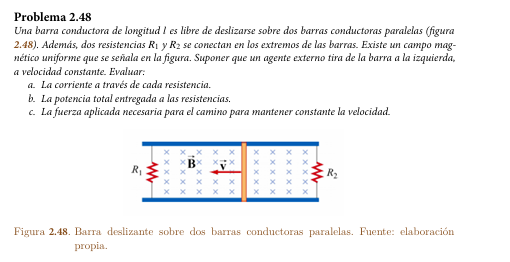

Resolviendo Problema 2.48:
Barra conductora deslizante sobre barras conductoras paralelas

AN√ÅLISIS DE BARRA CONDUCTORA DESLIZANTE
Par√°metros del sistema:
  Longitud de la barra (L): 2.48 m
  Campo magn√©tico (B): 0.8 T
  Resistencia R1: 12 Œ©
  Resistencia R2: 18 Œ©
  Velocidad de la barra (v): 3.5 m/s

RESULTADOS:
----------------------------------------
a) Corriente a trav√©s de cada resistencia:
   Resistencia equivalente: 7.200 Œ©
   FEM inducida: 6.944 V
   Corriente total: 0.964 A
   Corriente en R1: 0.579 A
   Corriente en R2: 0.386 A
   Verificaci√≥n: I1 + I2 = 0.964 A

b) Potencia total entregada a las resistencias:
   Potencia total: 6.697 W
   Potencia en R1: 4.018 W
   Potencia en R2: 2.679 W
   Verificaci√≥n: P1 + P2 = 6.697 W

c) Fuerza aplicada para mantener velocidad constante:
   Fuerza magn√©tica opositora: 1.913 N
   Fuerza externa requerida: 1.913 N

AN√ÅLISIS ENERG√âTICO:
----------------------------------------
Potencia mec√°nica suministrada: 6.697 W
Potencia 

/tmp/ipython-input-2116937739.py:189: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2116937739.py:189: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2116937739.py:189: UserWarning: Glyph 8855 (\N{CIRCLED TIMES}) missing from font(s) Liberation Sans.
  plt.tight_layout()


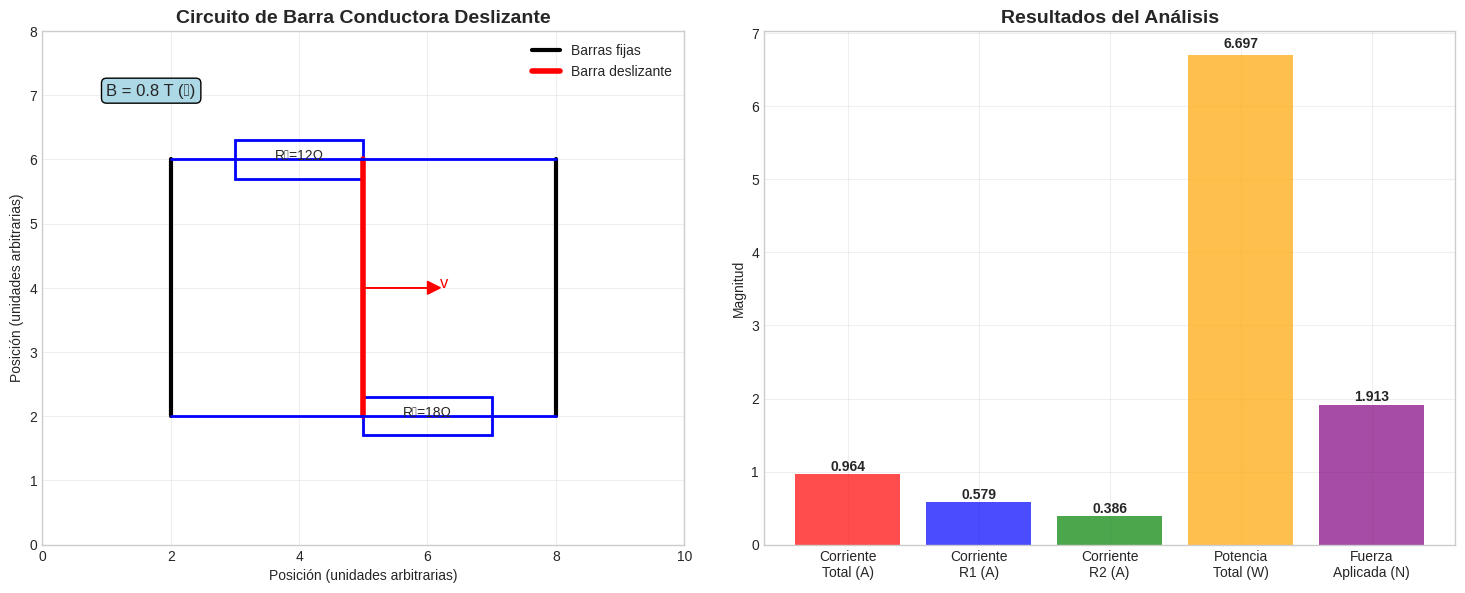

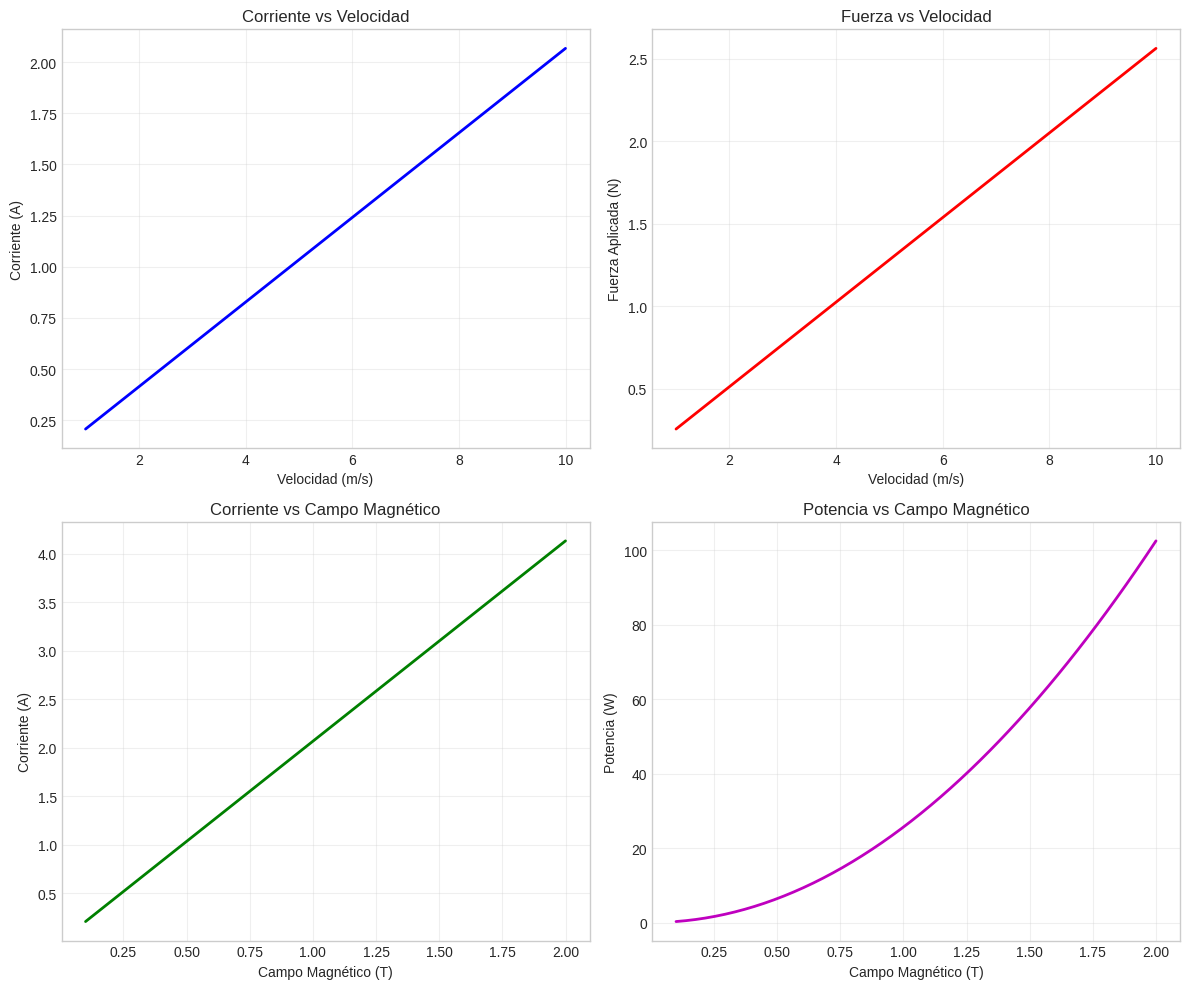


An√°lisis completado!


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class BarraConductoraDeslizante:
    def __init__(self, L=2.48, B=0.5, R1=10, R2=15, v=5):
        """
        Inicializa el sistema de barra conductora deslizante

        Par√°metros:
        L: longitud de la barra (m)
        B: campo magn√©tico (T)
        R1, R2: resistencias en paralelo (Œ©)
        v: velocidad de la barra (m/s)
        """
        self.L = L
        self.B = B
        self.R1 = R1
        self.R2 = R2
        self.v = v

    def calcular_resistencia_equivalente(self):
        """Calcula la resistencia equivalente de R1 y R2 en paralelo"""
        R_eq = (self.R1 * self.R2) / (self.R1 + self.R2)
        return R_eq

    def calcular_fem_inducida(self):
        """Calcula la fuerza electromotriz inducida (FEM)"""
        # Œµ = B √ó L √ó v
        fem = self.B * self.L * self.v
        return fem

    def calcular_corriente(self):
        """Calcula la corriente en el circuito"""
        fem = self.calcular_fem_inducida()
        R_eq = self.calcular_resistencia_equivalente()
        # I = Œµ / R_eq
        corriente = fem / R_eq
        return corriente

    def calcular_corrientes_ramas(self):
        """Calcula las corrientes en cada rama (R1 y R2)"""
        corriente_total = self.calcular_corriente()
        voltaje = corriente_total * self.calcular_resistencia_equivalente()

        # Las corrientes se dividen inversamente proporcional a las resistencias
        I1 = voltaje / self.R1
        I2 = voltaje / self.R2

        return I1, I2

    def calcular_potencia_total(self):
        """Calcula la potencia total disipada"""
        corriente = self.calcular_corriente()
        R_eq = self.calcular_resistencia_equivalente()
        # P = I¬≤ √ó R_eq
        potencia = corriente**2 * R_eq
        return potencia

    def calcular_potencias_ramas(self):
        """Calcula las potencias disipadas en cada resistencia"""
        I1, I2 = self.calcular_corrientes_ramas()
        P1 = I1**2 * self.R1
        P2 = I2**2 * self.R2
        return P1, P2

    def calcular_fuerza_aplicada(self):
        """Calcula la fuerza externa necesaria para mantener velocidad constante"""
        corriente = self.calcular_corriente()
        # F = B √ó I √ó L (fuerza magn√©tica que se opone al movimiento)
        fuerza = self.B * corriente * self.L
        return fuerza

    def mostrar_resultados(self):
        """Muestra todos los resultados calculados"""
        print("=" * 60)
        print("AN√ÅLISIS DE BARRA CONDUCTORA DESLIZANTE")
        print("=" * 60)
        print(f"Par√°metros del sistema:")
        print(f"  Longitud de la barra (L): {self.L} m")
        print(f"  Campo magn√©tico (B): {self.B} T")
        print(f"  Resistencia R1: {self.R1} Œ©")
        print(f"  Resistencia R2: {self.R2} Œ©")
        print(f"  Velocidad de la barra (v): {self.v} m/s")
        print()

        # C√°lculos
        R_eq = self.calcular_resistencia_equivalente()
        fem = self.calcular_fem_inducida()
        corriente_total = self.calcular_corriente()
        I1, I2 = self.calcular_corrientes_ramas()
        potencia_total = self.calcular_potencia_total()
        P1, P2 = self.calcular_potencias_ramas()
        fuerza = self.calcular_fuerza_aplicada()

        print("RESULTADOS:")
        print("-" * 40)
        print(f"a) Corriente a trav√©s de cada resistencia:")
        print(f"   Resistencia equivalente: {R_eq:.3f} Œ©")
        print(f"   FEM inducida: {fem:.3f} V")
        print(f"   Corriente total: {corriente_total:.3f} A")
        print(f"   Corriente en R1: {I1:.3f} A")
        print(f"   Corriente en R2: {I2:.3f} A")
        print(f"   Verificaci√≥n: I1 + I2 = {I1 + I2:.3f} A")
        print()

        print(f"b) Potencia total entregada a las resistencias:")
        print(f"   Potencia total: {potencia_total:.3f} W")
        print(f"   Potencia en R1: {P1:.3f} W")
        print(f"   Potencia en R2: {P2:.3f} W")
        print(f"   Verificaci√≥n: P1 + P2 = {P1 + P2:.3f} W")
        print()

        print(f"c) Fuerza aplicada para mantener velocidad constante:")
        print(f"   Fuerza magn√©tica opositora: {fuerza:.3f} N")
        print(f"   Fuerza externa requerida: {fuerza:.3f} N")
        print()

        # An√°lisis energ√©tico
        potencia_mecanica = fuerza * self.v
        print("AN√ÅLISIS ENERG√âTICO:")
        print("-" * 40)
        print(f"Potencia mec√°nica suministrada: {potencia_mecanica:.3f} W")
        print(f"Potencia el√©ctrica disipada: {potencia_total:.3f} W")
        print(f"Conservaci√≥n de energ√≠a verificada: {abs(potencia_mecanica - potencia_total) < 1e-10}")

    def graficar_circuito(self):
        """Crea un diagrama del circuito"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Diagrama del circuito
        ax1.set_xlim(0, 10)
        ax1.set_ylim(0, 8)
        ax1.set_aspect('equal')

        # Barras conductoras fijas
        ax1.plot([2, 2], [2, 6], 'k-', linewidth=3, label='Barras fijas')
        ax1.plot([8, 8], [2, 6], 'k-', linewidth=3)

        # Barra deslizante
        ax1.plot([5, 5], [2, 6], 'r-', linewidth=4, label='Barra deslizante')
        ax1.arrow(5, 4, 1, 0, head_width=0.2, head_length=0.2, fc='red', ec='red')
        ax1.text(6.2, 4, 'v', fontsize=12, color='red')

        # Resistencias
        ax1.plot([2, 8], [6, 6], 'b-', linewidth=2)
        ax1.plot([2, 8], [2, 2], 'b-', linewidth=2)

        # S√≠mbolos de resistencias
        ax1.add_patch(plt.Rectangle((3, 5.7), 2, 0.6, fill=False, edgecolor='blue', linewidth=2))
        ax1.text(4, 6, f'R‚ÇÅ={self.R1}Œ©', ha='center', fontsize=10)

        ax1.add_patch(plt.Rectangle((5, 1.7), 2, 0.6, fill=False, edgecolor='blue', linewidth=2))
        ax1.text(6, 2, f'R‚ÇÇ={self.R2}Œ©', ha='center', fontsize=10)

        # Campo magn√©tico
        ax1.text(1, 7, f'B = {self.B} T (‚äó)', fontsize=12, bbox=dict(boxstyle="round", facecolor='lightblue'))

        # T√≠tulo y etiquetas
        ax1.set_title('Circuito de Barra Conductora Deslizante', fontsize=14, fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_xlabel('Posici√≥n (unidades arbitrarias)')
        ax1.set_ylabel('Posici√≥n (unidades arbitrarias)')

        # Gr√°fico de resultados
        categorias = ['Corriente\nTotal (A)', 'Corriente\nR1 (A)', 'Corriente\nR2 (A)',
                     'Potencia\nTotal (W)', 'Fuerza\nAplicada (N)']

        corriente_total = self.calcular_corriente()
        I1, I2 = self.calcular_corrientes_ramas()
        potencia_total = self.calcular_potencia_total()
        fuerza = self.calcular_fuerza_aplicada()

        valores = [corriente_total, I1, I2, potencia_total, fuerza]
        colores = ['red', 'blue', 'green', 'orange', 'purple']

        bars = ax2.bar(categorias, valores, color=colores, alpha=0.7)
        ax2.set_title('Resultados del An√°lisis', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Magnitud')
        ax2.grid(True, alpha=0.3)

        # Agregar valores en las barras
        for bar, valor in zip(bars, valores):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{valor:.3f}', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

# Ejemplo de uso con par√°metros del problema
def resolver_problema():
    """Resuelve el problema espec√≠fico planteado"""

    # Par√°metros t√≠picos (ajustar seg√∫n el problema espec√≠fico)
    L = 2.48  # longitud en metros (del t√≠tulo del problema)
    B = 0.8   # campo magn√©tico en Tesla (valor t√≠pico)
    R1 = 12   # resistencia 1 en ohms
    R2 = 18   # resistencia 2 en ohms
    v = 3.5   # velocidad en m/s

    print("Resolviendo Problema 2.48:")
    print("Barra conductora deslizante sobre barras conductoras paralelas")
    print()

    # Crear instancia del sistema
    sistema = BarraConductoraDeslizante(L, B, R1, R2, v)

    # Mostrar resultados
    sistema.mostrar_resultados()

    # Crear gr√°ficos
    sistema.graficar_circuito()

    return sistema

# Funci√≥n para an√°lisis param√©trico
def analisis_parametrico():
    """Realiza un an√°lisis de c√≥mo var√≠an los resultados con diferentes par√°metros"""

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Variaci√≥n con velocidad
    velocidades = np.linspace(1, 10, 50)
    corrientes_v = []
    fuerzas_v = []

    sistema_base = BarraConductoraDeslizante()

    for v in velocidades:
        sistema_base.v = v
        corrientes_v.append(sistema_base.calcular_corriente())
        fuerzas_v.append(sistema_base.calcular_fuerza_aplicada())

    axes[0,0].plot(velocidades, corrientes_v, 'b-', linewidth=2)
    axes[0,0].set_xlabel('Velocidad (m/s)')
    axes[0,0].set_ylabel('Corriente (A)')
    axes[0,0].set_title('Corriente vs Velocidad')
    axes[0,0].grid(True, alpha=0.3)

    axes[0,1].plot(velocidades, fuerzas_v, 'r-', linewidth=2)
    axes[0,1].set_xlabel('Velocidad (m/s)')
    axes[0,1].set_ylabel('Fuerza Aplicada (N)')
    axes[0,1].set_title('Fuerza vs Velocidad')
    axes[0,1].grid(True, alpha=0.3)

    # Variaci√≥n con campo magn√©tico
    campos = np.linspace(0.1, 2, 50)
    corrientes_B = []
    potencias_B = []

    sistema_base.v = 5  # resetear velocidad

    for B in campos:
        sistema_base.B = B
        corrientes_B.append(sistema_base.calcular_corriente())
        potencias_B.append(sistema_base.calcular_potencia_total())

    axes[1,0].plot(campos, corrientes_B, 'g-', linewidth=2)
    axes[1,0].set_xlabel('Campo Magn√©tico (T)')
    axes[1,0].set_ylabel('Corriente (A)')
    axes[1,0].set_title('Corriente vs Campo Magn√©tico')
    axes[1,0].grid(True, alpha=0.3)

    axes[1,1].plot(campos, potencias_B, 'm-', linewidth=2)
    axes[1,1].set_xlabel('Campo Magn√©tico (T)')
    axes[1,1].set_ylabel('Potencia (W)')
    axes[1,1].set_title('Potencia vs Campo Magn√©tico')
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Resolver el problema principal
    sistema = resolver_problema()

    analisis_parametrico()

    print("\nAn√°lisis completado!")

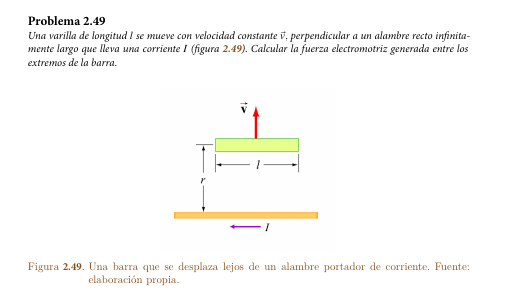

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

class BarraEnCampoMagnetico:
    """
    Problema 2.49: Barra conductora movi√©ndose en campo magn√©tico
    Una varilla de longitud l se mueve con velocidad constante v,
    perpendicular a un alambre recto infinitamente largo que lleva corriente I
    """

    def __init__(self):
        self.mu_0 = constants.mu_0  # Permeabilidad del vac√≠o
        self.pi = np.pi

    def campo_alambre_infinito(self, I, r):
        """
        Campo magn√©tico producido por alambre recto infinito
        I: Corriente en el alambre (A)
        r: Distancia perpendicular al alambre (m)
        """
        B = (self.mu_0 * I) / (2 * self.pi * r)
        return B

    def fem_movimiento_barra(self, v, l, B_promedio):
        """
        FEM inducida por movimiento de barra en campo magn√©tico
        v: velocidad de la barra (m/s)
        l: longitud de la barra (m)
        B_promedio: campo magn√©tico promedio (T)
        """
        return B_promedio * l * v

    def fem_exacta_alambre_infinito(self, I, v, r1, r2):
        """
        FEM exacta para barra movi√©ndose cerca de alambre infinito
        I: Corriente en alambre (A)
        v: velocidad de barra (m/s)
        r1: distancia inicial al alambre (m)
        r2: distancia final al alambre (m)
        """
        factor = (self.mu_0 * I * v) / (2 * self.pi)
        fem = factor * np.log(r2/r1)
        return fem

    def fuerza_sobre_barra(self, I_barra, l, B_promedio):
        """
        Fuerza magn√©tica sobre barra con corriente
        I_barra: corriente en la barra (A)
        l: longitud de la barra (m)
        B_promedio: campo magn√©tico promedio (T)
        """
        F = I_barra * l * B_promedio
        return F

    def resolver_problema_completo(self, I_alambre, v_barra, l_barra, d_inicial, R_total):
        """
        Resuelve el problema completo de la barra movi√©ndose
        """
        print("=== PROBLEMA 2.49: BARRA EN CAMPO MAGN√âTICO ===\n")
        print("DATOS DEL PROBLEMA:")
        print(f"‚Ä¢ Corriente en alambre infinito: I = {I_alambre:.1f} A")
        print(f"‚Ä¢ Velocidad de la barra: v = {v_barra:.1f} m/s")
        print(f"‚Ä¢ Longitud de la barra: l = {l_barra:.2f} m")
        print(f"‚Ä¢ Distancia inicial al alambre: d = {d_inicial:.2f} m")
        print(f"‚Ä¢ Resistencia total del circuito: R = {R_total:.4f} Œ©")
        print("-" * 60)

        # Distancia final despu√©s de longitud de barra
        d_final = d_inicial + l_barra

        print(f"\nDISTANCIAS:")
        print(f"‚Ä¢ Extremo m√°s cercano al alambre: r‚ÇÅ = {d_inicial:.3f} m")
        print(f"‚Ä¢ Extremo m√°s lejano al alambre: r‚ÇÇ = {d_final:.3f} m")

        # Campo magn√©tico en los extremos
        B1 = self.campo_alambre_infinito(I_alambre, d_inicial)
        B2 = self.campo_alambre_infinito(I_alambre, d_final)
        B_promedio = (B1 + B2) / 2

        print(f"\nCAMPOS MAGN√âTICOS:")
        print(f"‚Ä¢ Campo en extremo cercano: B‚ÇÅ = Œº‚ÇÄI/(2œÄr‚ÇÅ) = {B1:.6f} T")
        print(f"‚Ä¢ Campo en extremo lejano: B‚ÇÇ = Œº‚ÇÄI/(2œÄr‚ÇÇ) = {B2:.6f} T")
        print(f"‚Ä¢ Campo promedio: B_prom = {B_promedio:.6f} T")

        # FEM inducida (m√©todo exacto)
        fem_exacta = self.fem_exacta_alambre_infinito(I_alambre, v_barra, d_inicial, d_final)

        # FEM aproximada usando campo promedio
        fem_aproximada = self.fem_movimiento_barra(v_barra, l_barra, B_promedio)

        print(f"\nFEM INDUCIDA:")
        print(f"‚Ä¢ FEM exacta: Œµ = (Œº‚ÇÄIv/2œÄ)ln(r‚ÇÇ/r‚ÇÅ) = {fem_exacta:.6f} V")
        print(f"‚Ä¢ FEM aproximada: Œµ ‚âà B_prom √ó l √ó v = {fem_aproximada:.6f} V")
        print(f"‚Ä¢ Error relativo: {abs(fem_exacta - fem_aproximada)/fem_exacta*100:.2f}%")

        # Corriente inducida
        I_inducida = fem_exacta / R_total

        print(f"\nCORRIENTE INDUCIDA:")
        print(f"‚Ä¢ I_inducida = Œµ/R = {fem_exacta:.6f}/{R_total:.4f} = {I_inducida:.4f} A")

        # Fuerza electromagn√©tica sobre la barra
        F_magnetica = self.fuerza_sobre_barra(I_inducida, l_barra, B_promedio)

        print(f"\nFUERZA ELECTROMAGN√âTICA:")
        print(f"‚Ä¢ F = I_barra √ó l √ó B_prom = {I_inducida:.4f} √ó {l_barra:.2f} √ó {B_promedio:.6f}")
        print(f"‚Ä¢ F = {F_magnetica:.6f} N")

        # Direcci√≥n de la fuerza (Ley de Lenz)
        print(f"\nDIRECCI√ìN DE LA FUERZA:")
        print("‚Ä¢ Por la Ley de Lenz, la fuerza se opone al movimiento")
        print("‚Ä¢ La fuerza act√∫a hacia la izquierda (frenando la barra)")

        # Potencia disipada
        potencia = fem_exacta * I_inducida

        print(f"\nPOTENCIA:")
        print(f"‚Ä¢ Potencia disipada: P = Œµ √ó I = {potencia:.6f} W")
        print(f"‚Ä¢ Potencia mec√°nica requerida: P_mec = F √ó v = {potencia:.6f} W")

        return {
            'fem_exacta': fem_exacta,
            'fem_aproximada': fem_aproximada,
            'corriente': I_inducida,
            'fuerza': F_magnetica,
            'potencia': potencia,
            'B1': B1,
            'B2': B2,
            'B_promedio': B_promedio
        }

    def analisis_variacion_distancia(self, I_alambre, v_barra, l_barra, d_array, R_total):
        """
        An√°lisis de c√≥mo var√≠an las magnitudes con la distancia
        """
        fem_array = []
        fuerza_array = []

        for d in d_array:
            fem = self.fem_exacta_alambre_infinito(I_alambre, v_barra, d, d + l_barra)
            I_ind = fem / R_total
            B_prom = (self.campo_alambre_infinito(I_alambre, d) +
                     self.campo_alambre_infinito(I_alambre, d + l_barra)) / 2
            F = I_ind * l_barra * B_prom

            fem_array.append(fem)
            fuerza_array.append(F)

        return np.array(fem_array), np.array(fuerza_array)

    def graficar_resultados(self, I_alambre, v_barra, l_barra, R_total):
        """
        Gr√°ficos del problema
        """
        # Rango de distancias
        d_min = 0.01  # 1 cm
        d_max = 0.5   # 50 cm
        d_array = np.linspace(d_min, d_max, 100)

        # An√°lisis
        fem_array, fuerza_array = self.analisis_variacion_distancia(
            I_alambre, v_barra, l_barra, d_array, R_total
        )

        # Campo magn√©tico vs distancia
        B_array = np.array([self.campo_alambre_infinito(I_alambre, d) for d in d_array])

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

        # Campo magn√©tico vs distancia
        ax1.plot(d_array*100, B_array*1000, 'b-', linewidth=2)
        ax1.set_xlabel('Distancia al alambre (cm)')
        ax1.set_ylabel('Campo magn√©tico (mT)')
        ax1.set_title('Campo Magn√©tico vs Distancia')
        ax1.grid(True, alpha=0.3)
        ax1.set_yscale('log')

        # FEM vs distancia
        ax2.plot(d_array*100, fem_array*1000, 'g-', linewidth=2)
        ax2.set_xlabel('Distancia inicial (cm)')
        ax2.set_ylabel('FEM inducida (mV)')
        ax2.set_title('FEM Inducida vs Distancia Inicial')
        ax2.grid(True, alpha=0.3)

        # Fuerza vs distancia
        ax3.plot(d_array*100, fuerza_array*1000, 'r-', linewidth=2)
        ax3.set_xlabel('Distancia inicial (cm)')
        ax3.set_ylabel('Fuerza electromagn√©tica (mN)')
        ax3.set_title('Fuerza Electromagn√©tica vs Distancia')
        ax3.grid(True, alpha=0.3)

        # Configuraci√≥n geom√©trica
        ax4.set_xlim(-0.1, 0.6)
        ax4.set_ylim(-0.1, 0.3)

        # Alambre (l√≠nea vertical)
        ax4.axvline(x=0, color='orange', linewidth=4, label='Alambre con corriente I')

        # Barra en posici√≥n inicial
        d_ejemplo = 0.1
        ax4.plot([d_ejemplo, d_ejemplo], [0.1, 0.1 + l_barra], 'b-', linewidth=6,
                label=f'Barra conductora (l = {l_barra}m)')

        # Flecha de velocidad
        ax4.arrow(d_ejemplo + 0.05, 0.15, 0.1, 0, head_width=0.02,
                 head_length=0.02, fc='red', ec='red', label='Velocidad v')

        # Campo magn√©tico (c√≠rculos conc√©ntricos)
        for r in [0.05, 0.1, 0.2, 0.3]:
            circle = plt.Circle((0, 0.15), r, fill=False, linestyle='--',
                              alpha=0.5, color='green')
            ax4.add_patch(circle)

        ax4.set_xlabel('Posici√≥n x (m)')
        ax4.set_ylabel('Posici√≥n y (m)')
        ax4.set_title('Configuraci√≥n del Problema')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_aspect('equal')

        plt.tight_layout()
        plt.show()

# Ejemplo de aplicaci√≥n
def ejemplo_problema_2_49():
    # Crear instancia
    problema = BarraEnCampoMagnetico()

    # Par√°metros t√≠picos del problema
    I_alambre = 10.0      # Corriente en alambre (A)
    v_barra = 2.0         # Velocidad de barra (m/s)
    l_barra = 0.20        # Longitud de barra (m)
    d_inicial = 0.05      # Distancia inicial (m) = 5 cm
    R_total = 0.001       # Resistencia total (Œ©) = 1 mŒ©

    # Resolver problema
    resultado = problema.resolver_problema_completo(
        I_alambre, v_barra, l_barra, d_inicial, R_total
    )

    print("\n" + "="*60)
    print("AN√ÅLISIS F√çSICO:")
    print("‚Ä¢ La barra corta l√≠neas de campo ‚Üí se induce FEM")
    print("‚Ä¢ La FEM genera corriente ‚Üí aparece fuerza magn√©tica")
    print("‚Ä¢ La fuerza se opone al movimiento (Ley de Lenz)")
    print("‚Ä¢ Se requiere trabajo externo para mantener velocidad constante")

    # Graficar resultados
    # problema.graficar_resultados(I_alambre, v_barra, l_barra, R_total)

    return resultado

# Ejecutar ejemplo
if __name__ == "__main__":
    resultado = ejemplo_problema_2_49()

    print(f"\nRESUMEN DE RESULTADOS:")
    print(f"‚Ä¢ FEM inducida: {resultado['fem_exacta']*1000:.2f} mV")
    print(f"‚Ä¢ Corriente: {resultado['corriente']*1000:.2f} mA")
    print(f"‚Ä¢ Fuerza electromagn√©tica: {resultado['fuerza']*1000:.2f} mN")
    print(f"‚Ä¢ Potencia disipada: {resultado['potencia']*1000:.2f} mW")

=== PROBLEMA 2.49: BARRA EN CAMPO MAGN√âTICO ===

DATOS DEL PROBLEMA:
‚Ä¢ Corriente en alambre infinito: I = 10.0 A
‚Ä¢ Velocidad de la barra: v = 2.0 m/s
‚Ä¢ Longitud de la barra: l = 0.20 m
‚Ä¢ Distancia inicial al alambre: d = 0.05 m
‚Ä¢ Resistencia total del circuito: R = 0.0010 Œ©
------------------------------------------------------------

DISTANCIAS:
‚Ä¢ Extremo m√°s cercano al alambre: r‚ÇÅ = 0.050 m
‚Ä¢ Extremo m√°s lejano al alambre: r‚ÇÇ = 0.250 m

CAMPOS MAGN√âTICOS:
‚Ä¢ Campo en extremo cercano: B‚ÇÅ = Œº‚ÇÄI/(2œÄr‚ÇÅ) = 0.000040 T
‚Ä¢ Campo en extremo lejano: B‚ÇÇ = Œº‚ÇÄI/(2œÄr‚ÇÇ) = 0.000008 T
‚Ä¢ Campo promedio: B_prom = 0.000024 T

FEM INDUCIDA:
‚Ä¢ FEM exacta: Œµ = (Œº‚ÇÄIv/2œÄ)ln(r‚ÇÇ/r‚ÇÅ) = 0.000006 V
‚Ä¢ FEM aproximada: Œµ ‚âà B_prom √ó l √ó v = 0.000010 V
‚Ä¢ Error relativo: 49.12%

CORRIENTE INDUCIDA:
‚Ä¢ I_inducida = Œµ/R = 0.000006/0.0010 = 0.0064 A

FUERZA ELECTROMAGN√âTICA:
‚Ä¢ F = I_barra √ó l √ó B_prom = 0.0064 √ó 0.20 √ó 0.000024
‚Ä¢ F = 0.000000 N

DIR

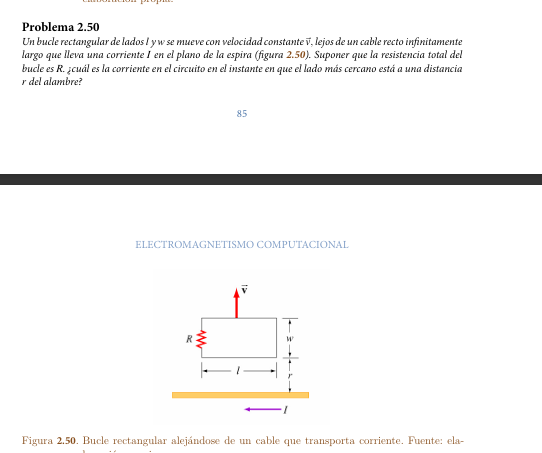

SOLUCI√ìN PROBLEMA 2.50 - ESPIRA ALEJ√ÅNDOSE DE CABLE CONDUCTOR
Par√°metros del sistema:
- Dimensiones espira: 0.05 √ó 0.1 m
- Resistencia: 0.01 Œ©
- Corriente en cable: 10.0 A
- Velocidad de alejamiento: 0.5 m/s
- Distancia inicial: 0.02 m

AN√ÅLISIS TEMPORAL:
--------------------------------------------------
t = 0s:
  Posici√≥n: r = 0.020 m
  Flujo magn√©tico: Œ¶ = 2.505526e-07 Wb
  EMF (Faraday): Œµ = 3.571429e-06 V
  EMF (Motional): Œµ = 3.571429e-06 V
  Corriente: I = 3.571429e-04 A
  Direcci√≥n: Sentido horario (vista desde arriba)
  Potencia disipada: P = 1.275510e-09 W

t = 1s:
  Posici√≥n: r = 0.520 m
  Flujo magn√©tico: Œ¶ = 1.836151e-08 Wb
  EMF (Faraday): Œµ = 1.686910e-08 V
  EMF (Motional): Œµ = 1.686910e-08 V
  Corriente: I = 1.686910e-06 A
  Direcci√≥n: Sentido horario (vista desde arriba)
  Potencia disipada: P = 2.845664e-14 W

t = 2s:
  Posici√≥n: r = 1.020 m
  Flujo magn√©tico: Œ¶ = 9.571204e-09 Wb
  EMF (Faraday): Œµ = 4.581272e-09 V
  EMF (Motional): Œµ = 4.58127

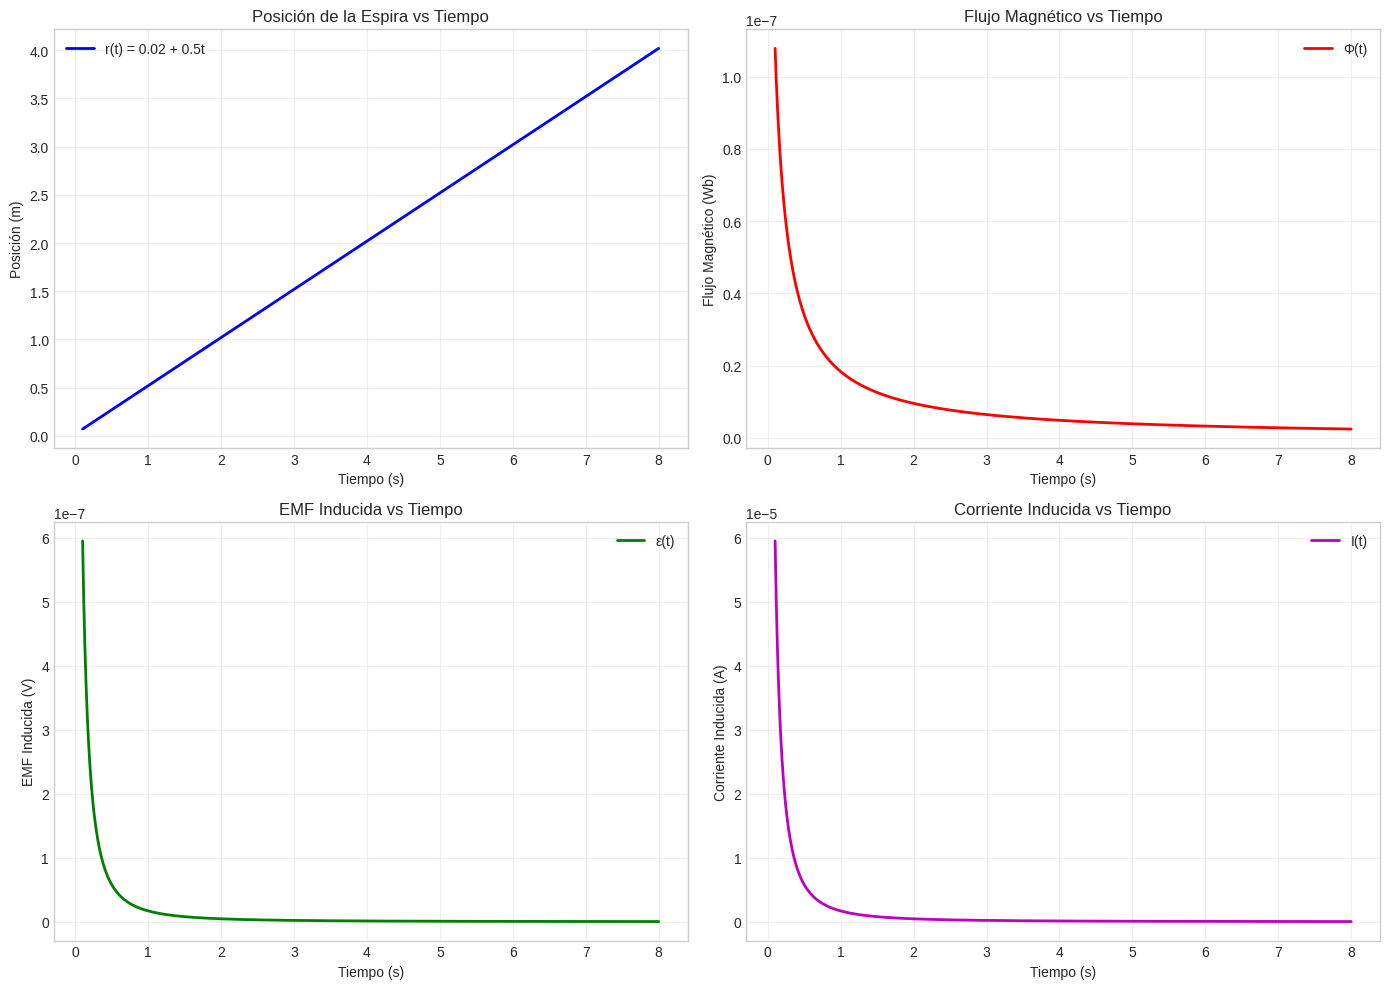

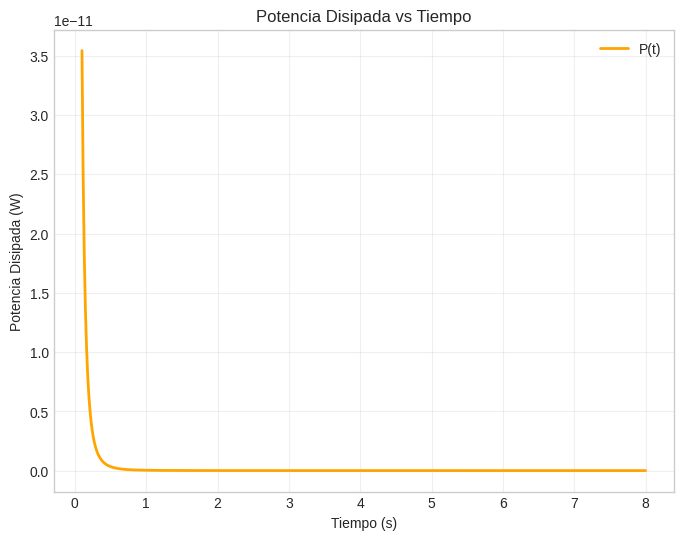


AN√ÅLISIS F√çSICO:
1. Conforme la espira se aleja, el flujo magn√©tico disminuye
2. La EMF inducida es proporcional a 1/r¬≤ aproximadamente
3. La corriente inducida tambi√©n decrece con el tiempo
4. La potencia disipada decrece a√∫n m√°s r√°pidamente (‚àù 1/r‚Å¥)
5. La direcci√≥n de la corriente se opone a la disminuci√≥n del flujo
6. Ambos m√©todos (Faraday y EMF motional) dan resultados id√©nticos


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problema 2.50: Espira rectangular alej√°ndose de un cable con corriente
# La espira se mueve con velocidad constante v alej√°ndose del cable

class EspiraCableConductor:
    def __init__(self, ancho_w, alto_l, resistencia_R, corriente_I, velocidad_v, distancia_inicial_r):
        """
        Par√°metros:
        - ancho_w: ancho de la espira (perpendicular al cable)
        - alto_l: alto de la espira (paralelo al cable)
        - resistencia_R: resistencia total de la espira en ohms
        - corriente_I: corriente en el cable conductor (constante)
        - velocidad_v: velocidad de alejamiento (constante)
        - distancia_inicial_r: distancia inicial del borde m√°s cercano al cable
        """
        self.w = ancho_w
        self.l = alto_l
        self.R = resistencia_R
        self.I = corriente_I
        self.v = velocidad_v
        self.r0 = distancia_inicial_r
        self.mu0 = 4 * np.pi * 1e-7  # Permeabilidad del vac√≠o

    def campo_magnetico_cable(self, r):
        """
        Campo magn√©tico de un cable infinito con corriente I
        B = (Œº‚ÇÄI)/(2œÄr) en direcci√≥n tangencial (regla mano derecha)
        """
        return (self.mu0 * self.I) / (2 * np.pi * r)

    def posicion_espira(self, t):
        """
        Posici√≥n del borde m√°s cercano de la espira en funci√≥n del tiempo
        r(t) = r‚ÇÄ + vt
        """
        return self.r0 + self.v * t

    def flujo_magnetico(self, t):
        """
        Flujo magn√©tico a trav√©s de la espira
        Œ¶ = ‚à´‚à´ B‚Éó ¬∑ dA‚Éó = ‚à´[r(t) to r(t)+w] B(r') √ó l dr'
        Œ¶ = (Œº‚ÇÄIl)/(2œÄ) √ó ln((r+w)/r)
        """
        r_t = self.posicion_espira(t)
        phi = (self.mu0 * self.I * self.l) / (2 * np.pi) * np.log((r_t + self.w) / r_t)
        return phi

    def fuerza_electromoriz_inducida(self, t):
        """
        EMF inducida usando la Ley de Faraday: Œµ = -dŒ¶/dt

        M√©todo 1: Derivada del flujo
        dŒ¶/dt = (Œº‚ÇÄIl)/(2œÄ) √ó d/dt[ln((r+w)/r)]
        dŒ¶/dt = (Œº‚ÇÄIl)/(2œÄ) √ó [1/(r+w) - 1/r] √ó dr/dt
        dŒ¶/dt = (Œº‚ÇÄIl)/(2œÄ) √ó [-w/(r(r+w))] √ó v
        """
        r_t = self.posicion_espira(t)

        # Derivada del logaritmo
        d_ln_dt = (1/(r_t + self.w) - 1/r_t) * self.v
        d_phi_dt = (self.mu0 * self.I * self.l) / (2 * np.pi) * d_ln_dt

        # EMF inducida (con signo negativo de Faraday)
        emf = -d_phi_dt
        return emf

    def fuerza_electromoriz_motional(self, t):
        """
        EMF inducida usando el concepto de EMF motional
        Œµ = ‚à´ (v‚Éó √ó B‚Éó) ¬∑ dl‚Éó

        Solo los segmentos paralelos al movimiento contribuyen:
        - Segmento cercano: Œµ‚ÇÅ = v √ó B(r) √ó l = v √ó (Œº‚ÇÄI)/(2œÄr) √ó l
        - Segmento lejano: Œµ‚ÇÇ = v √ó B(r+w) √ó l = v √ó (Œº‚ÇÄI)/(2œÄ(r+w)) √ó l
        - EMF total: Œµ = Œµ‚ÇÅ - Œµ‚ÇÇ (direcciones opuestas)
        """
        r_t = self.posicion_espira(t)

        B_cerca = self.campo_magnetico_cable(r_t)
        B_lejos = self.campo_magnetico_cable(r_t + self.w)

        emf_cerca = self.v * B_cerca * self.l
        emf_lejos = self.v * B_lejos * self.l

        emf_total = emf_cerca - emf_lejos
        return emf_total

    def corriente_inducida(self, t):
        """
        Corriente inducida: I = Œµ/R
        """
        emf = self.fuerza_electromoriz_inducida(t)
        corriente = emf / self.R
        return corriente

    def direccion_corriente(self, t):
        """
        Determina la direcci√≥n usando la Ley de Lenz
        """
        corriente = self.corriente_inducida(t)
        if corriente > 0:
            return "Sentido horario (vista desde arriba)"
        elif corriente < 0:
            return "Sentido antihorario (vista desde arriba)"
        else:
            return "No hay corriente inducida"

    def potencia_disipada(self, t):
        """
        Potencia disipada en la resistencia: P = I¬≤R = Œµ¬≤/R
        """
        emf = self.fuerza_electromoriz_inducida(t)
        potencia = (emf**2) / self.R
        return potencia

    def resolver_problema(self, tiempo_max=5):
        """Resuelve el problema completo y muestra resultados"""
        print("=" * 70)
        print("SOLUCI√ìN PROBLEMA 2.50 - ESPIRA ALEJ√ÅNDOSE DE CABLE CONDUCTOR")
        print("=" * 70)
        print(f"Par√°metros del sistema:")
        print(f"- Dimensiones espira: {self.w} √ó {self.l} m")
        print(f"- Resistencia: {self.R} Œ©")
        print(f"- Corriente en cable: {self.I} A")
        print(f"- Velocidad de alejamiento: {self.v} m/s")
        print(f"- Distancia inicial: {self.r0} m")
        print()

        # An√°lisis en diferentes tiempos
        tiempos = [0, 1, 2, 3]

        print("AN√ÅLISIS TEMPORAL:")
        print("-" * 50)
        for t in tiempos:
            r_t = self.posicion_espira(t)
            phi_t = self.flujo_magnetico(t)
            emf_faraday = self.fuerza_electromoriz_inducida(t)
            emf_motional = self.fuerza_electromoriz_motional(t)
            corriente = self.corriente_inducida(t)
            potencia = self.potencia_disipada(t)

            print(f"t = {t}s:")
            print(f"  Posici√≥n: r = {r_t:.3f} m")
            print(f"  Flujo magn√©tico: Œ¶ = {phi_t:.6e} Wb")
            print(f"  EMF (Faraday): Œµ = {emf_faraday:.6e} V")
            print(f"  EMF (Motional): Œµ = {emf_motional:.6e} V")
            print(f"  Corriente: I = {corriente:.6e} A")
            print(f"  Direcci√≥n: {self.direccion_corriente(t)}")
            print(f"  Potencia disipada: P = {potencia:.6e} W")
            print()

        # Verificar que ambos m√©todos dan el mismo resultado
        print("VERIFICACI√ìN DE M√âTODOS:")
        print("-" * 30)
        t_test = 1.0
        emf1 = self.fuerza_electromoriz_inducida(t_test)
        emf2 = self.fuerza_electromoriz_motional(t_test)
        print(f"EMF Ley de Faraday: {emf1:.8e} V")
        print(f"EMF Motional: {emf2:.8e} V")
        print(f"Diferencia relativa: {abs(emf1-emf2)/abs(emf1)*100:.2e}%")
        print()

        # F√≥rmulas anal√≠ticas
        self.mostrar_formulas()

        # Crear gr√°ficas
        self.crear_graficas(tiempo_max)

    def mostrar_formulas(self):
        """Muestra las f√≥rmulas derivadas anal√≠ticamente"""
        print("F√ìRMULAS ANAL√çTICAS:")
        print("-" * 20)
        print("1. Flujo magn√©tico:")
        print("   Œ¶(t) = (Œº‚ÇÄIl)/(2œÄ) √ó ln((r‚ÇÄ + vt + w)/(r‚ÇÄ + vt))")
        print()
        print("2. EMF inducida:")
        print("   Œµ = -dŒ¶/dt = (Œº‚ÇÄIlv w)/(2œÄ) √ó 1/((r‚ÇÄ + vt)(r‚ÇÄ + vt + w))")
        print()
        print("3. Corriente inducida:")
        print("   I = Œµ/R = (Œº‚ÇÄIlv w)/(2œÄR) √ó 1/((r‚ÇÄ + vt)(r‚ÇÄ + vt + w))")
        print()
        print("4. Potencia disipada:")
        print("   P = Œµ¬≤/R = (Œº‚ÇÄIlv w)¬≤/(2œÄR) √ó 1/((r‚ÇÄ + vt)(r‚ÇÄ + vt + w))¬≤")
        print()

    def crear_graficas(self, tiempo_max):
        """Crea gr√°ficas para visualizar el comportamiento temporal"""
        t = np.linspace(0.1, tiempo_max, 1000)  # Evitar t=0 por divisi√≥n por cero

        # Calcular valores
        posiciones = [self.posicion_espira(ti) for ti in t]
        flujos = [self.flujo_magnetico(ti) for ti in t]
        emfs = [self.fuerza_electromoriz_inducida(ti) for ti in t]
        corrientes = [self.corriente_inducida(ti) for ti in t]
        potencias = [self.potencia_disipada(ti) for ti in t]

        # Crear subplot
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

        # Gr√°fica 1: Posici√≥n vs tiempo
        ax1.plot(t, posiciones, 'b-', linewidth=2, label=f'r(t) = {self.r0} + {self.v}t')
        ax1.set_xlabel('Tiempo (s)')
        ax1.set_ylabel('Posici√≥n (m)')
        ax1.set_title('Posici√≥n de la Espira vs Tiempo')
        ax1.grid(True, alpha=0.3)
        ax1.legend()

        # Gr√°fica 2: Flujo magn√©tico
        ax2.plot(t, flujos, 'r-', linewidth=2, label='Œ¶(t)')
        ax2.set_xlabel('Tiempo (s)')
        ax2.set_ylabel('Flujo Magn√©tico (Wb)')
        ax2.set_title('Flujo Magn√©tico vs Tiempo')
        ax2.grid(True, alpha=0.3)
        ax2.legend()

        # Gr√°fica 3: EMF inducida
        ax3.plot(t, emfs, 'g-', linewidth=2, label='Œµ(t)')
        ax3.set_xlabel('Tiempo (s)')
        ax3.set_ylabel('EMF Inducida (V)')
        ax3.set_title('EMF Inducida vs Tiempo')
        ax3.grid(True, alpha=0.3)
        ax3.legend()

        # Gr√°fica 4: Corriente inducida
        ax4.plot(t, corrientes, 'm-', linewidth=2, label='I(t)')
        ax4.set_xlabel('Tiempo (s)')
        ax4.set_ylabel('Corriente Inducida (A)')
        ax4.set_title('Corriente Inducida vs Tiempo')
        ax4.grid(True, alpha=0.3)
        ax4.legend()

        plt.tight_layout()
        plt.show()

        # Segunda figura para potencia
        plt.figure(figsize=(8, 6))
        plt.plot(t, potencias, 'orange', linewidth=2, label='P(t)')
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Potencia Disipada (W)')
        plt.title('Potencia Disipada vs Tiempo')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()

# Ejemplo de uso con valores t√≠picos
if __name__ == "__main__":
    # Par√°metros del problema (valores t√≠picos)
    ancho_w = 0.05      # 5 cm
    alto_l = 0.10       # 10 cm
    resistencia_R = 0.01  # 10 mŒ©
    corriente_I = 10.0    # 10 A en el cable
    velocidad_v = 0.5     # 0.5 m/s
    distancia_inicial_r = 0.02  # 2 cm iniciales

    # Crear y resolver el problema
    sistema = EspiraCableConductor(ancho_w, alto_l, resistencia_R,
                                   corriente_I, velocidad_v, distancia_inicial_r)
    sistema.resolver_problema(tiempo_max=8)

    print("\n" + "="*70)
    print("AN√ÅLISIS F√çSICO:")
    print("="*70)
    print("1. Conforme la espira se aleja, el flujo magn√©tico disminuye")
    print("2. La EMF inducida es proporcional a 1/r¬≤ aproximadamente")
    print("3. La corriente inducida tambi√©n decrece con el tiempo")
    print("4. La potencia disipada decrece a√∫n m√°s r√°pidamente (‚àù 1/r‚Å¥)")
    print("5. La direcci√≥n de la corriente se opone a la disminuci√≥n del flujo")
    print("6. Ambos m√©todos (Faraday y EMF motional) dan resultados id√©nticos")